In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import skimage

# Root directory of the project
ROOT_DIR = 'Mask_RCNN-master 3'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import Cell
import cv2

Using TensorFlow backend.


In [2]:
model_dir = "../logs/cell20200529T1324/"               # 60 epochs
model_file = "mask_rcnn_cell_0050.h5"
coco_path = os.path.abspath(model_dir + model_file)

In [3]:
model_dir = "../logs/cell20200529T1324/"               # 200 epochs
model_file = "mask_rcnn_cell_0050.h5"
coco_path = os.path.abspath(model_dir + model_file)

In [4]:
model = modellib.MaskRCNN(mode="inference", config=Cell.config, model_dir=model_dir)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [5]:
model.load_weights(coco_path, by_name=True)

Re-starting from epoch 50


In [6]:
# Function taken from utils.dataset
def load_image(image_path):
    """Load the specified image and return a [H,W,3] Numpy array.
    """
    # Load image
    image = skimage.io.imread(image_path)
    # If grayscale. Convert to RGB for consistency.
    if image.ndim != 3:
        image = skimage.color.gray2rgb(image)
    # If has an alpha channel, remove it for consistency
    if image.shape[-1] == 4:
        image = image[..., :3]
    return image

In [7]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

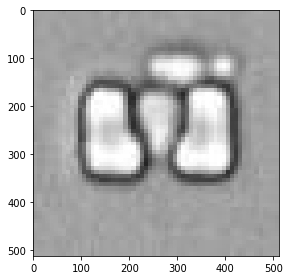

Processing 1 images
image                    shape: (512, 512, 3)         min:   32.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -89.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


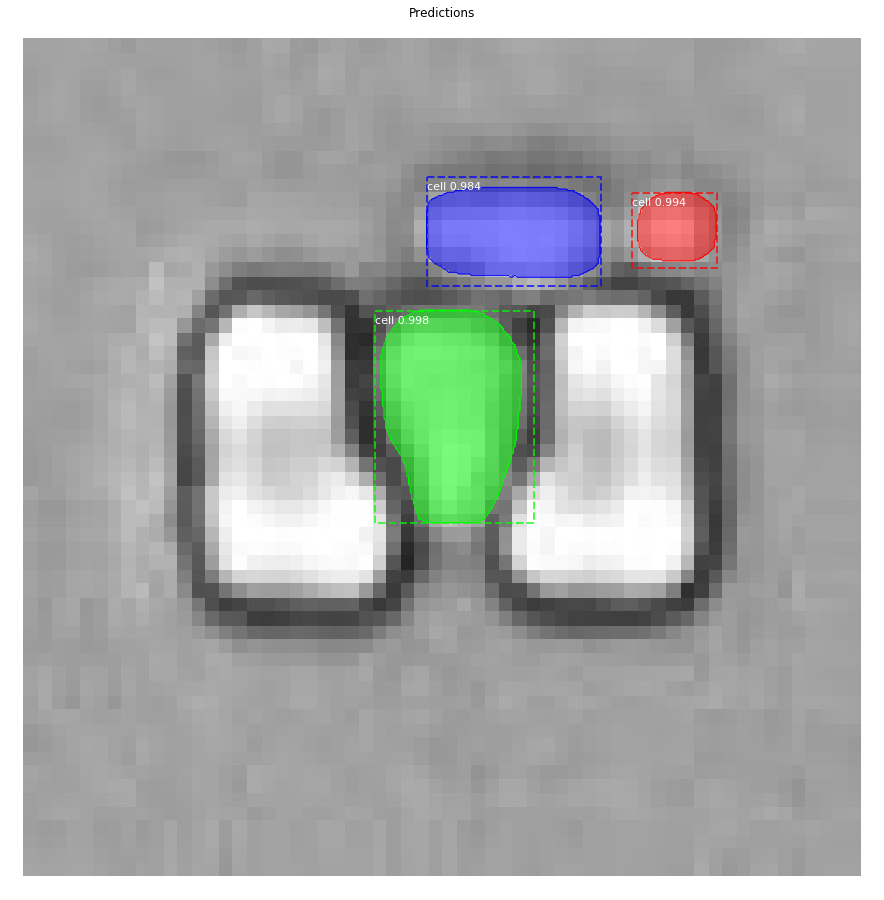

In [8]:
img_path = "/home/ubuntu/Desktop/test2.jpg"
image = load_image(img_path)
skimage.io.imshow(image)
plt.show()

dataset = Cell.HSYAADataset()
dataset.load_data("dataset/", "train")
dataset.prepare()

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
a = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

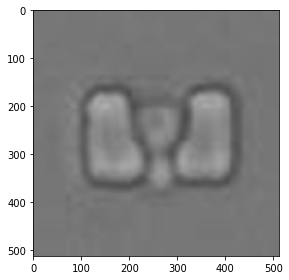

Processing 1 images
image                    shape: (512, 512, 3)         min:   78.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -45.70000  max:   67.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


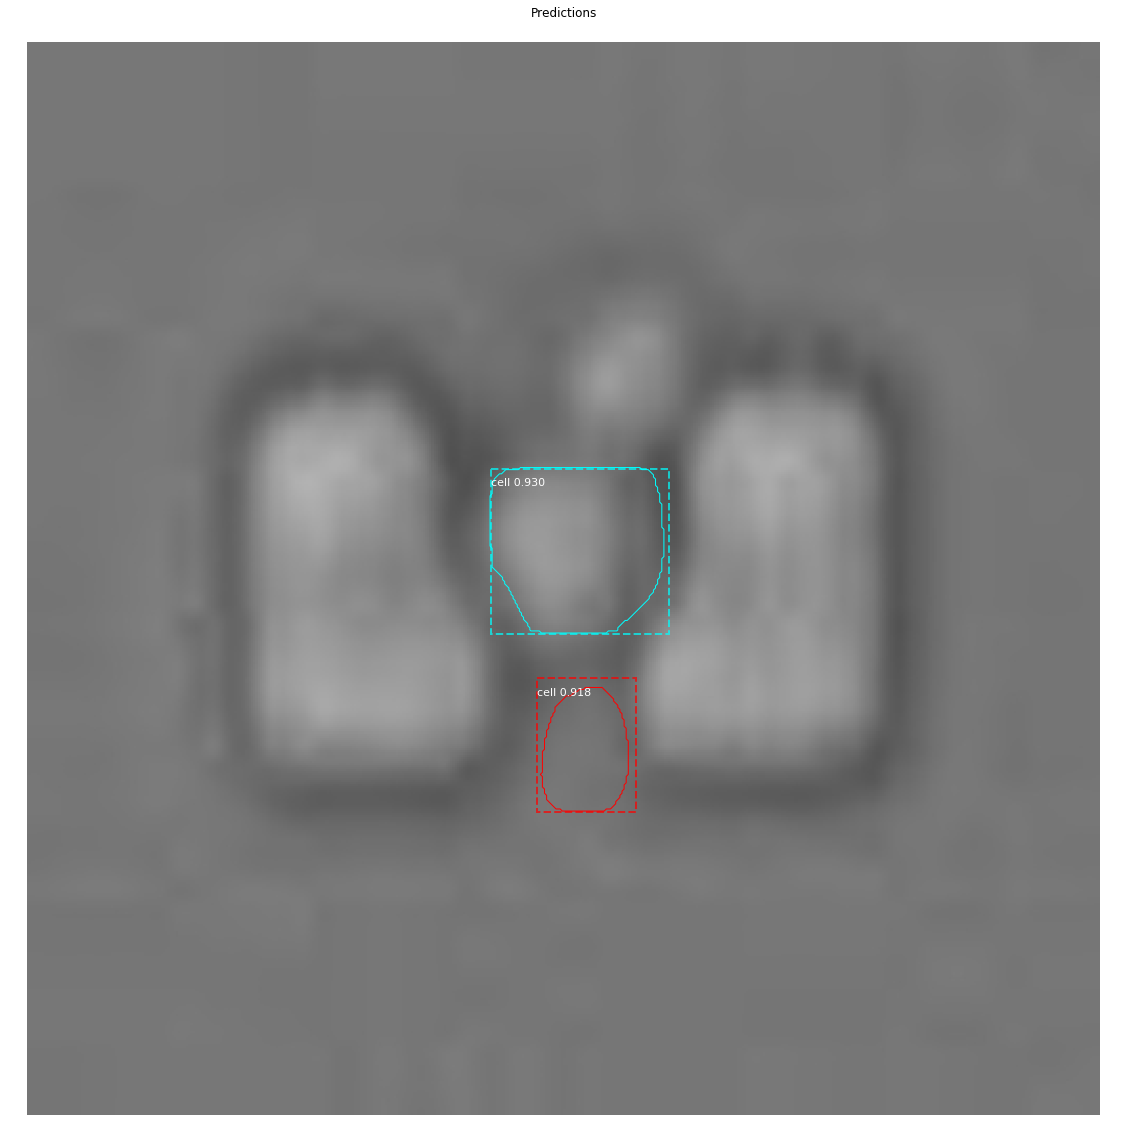

Processing 1 images
image                    shape: (512, 512, 3)         min:   79.00000  max:  178.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -44.70000  max:   72.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


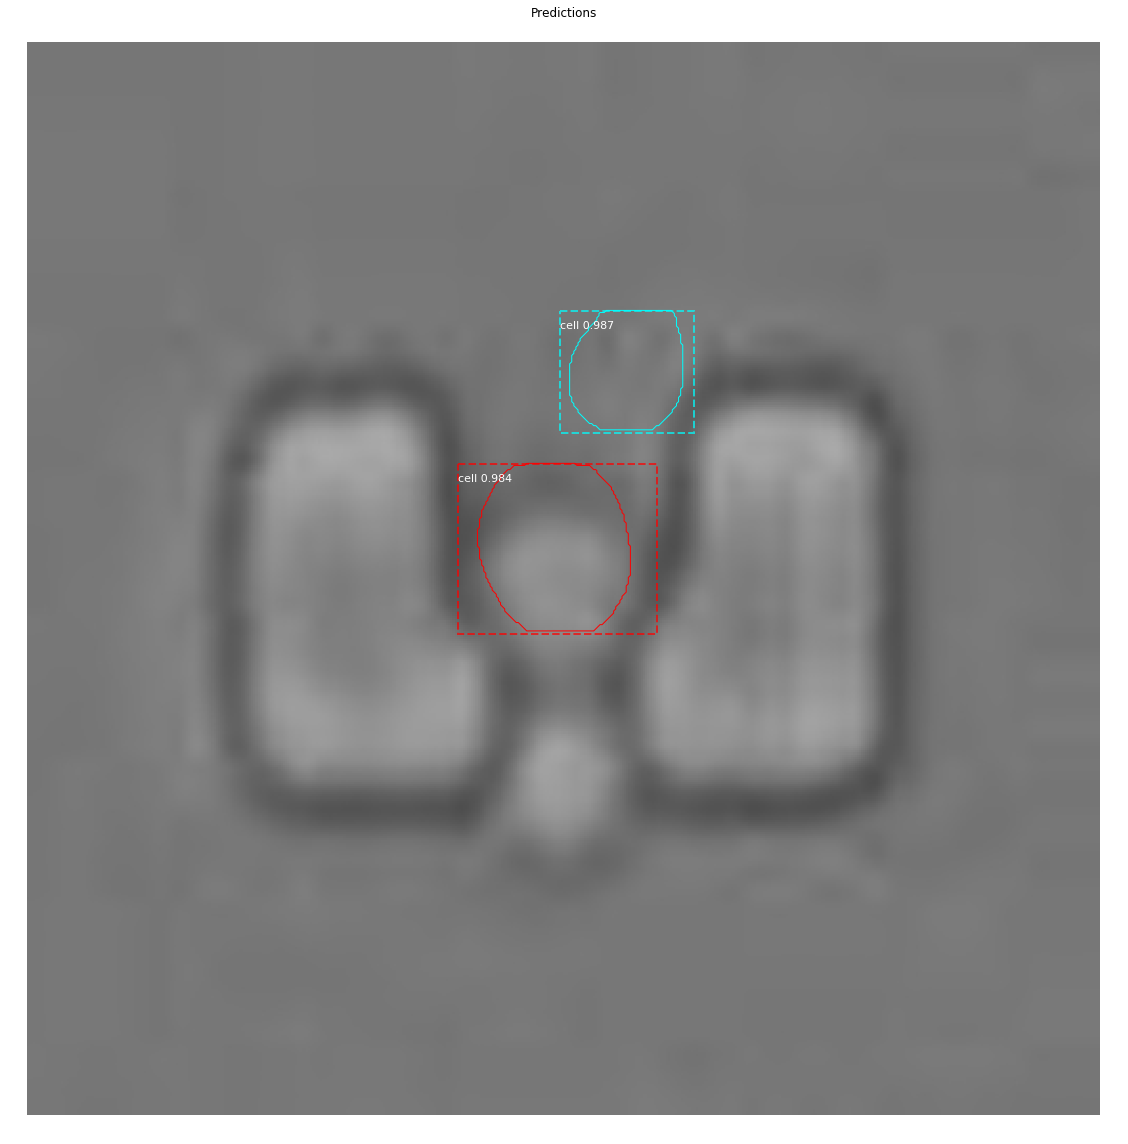

Processing 1 images
image                    shape: (512, 512, 3)         min:   78.00000  max:  169.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -45.70000  max:   63.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


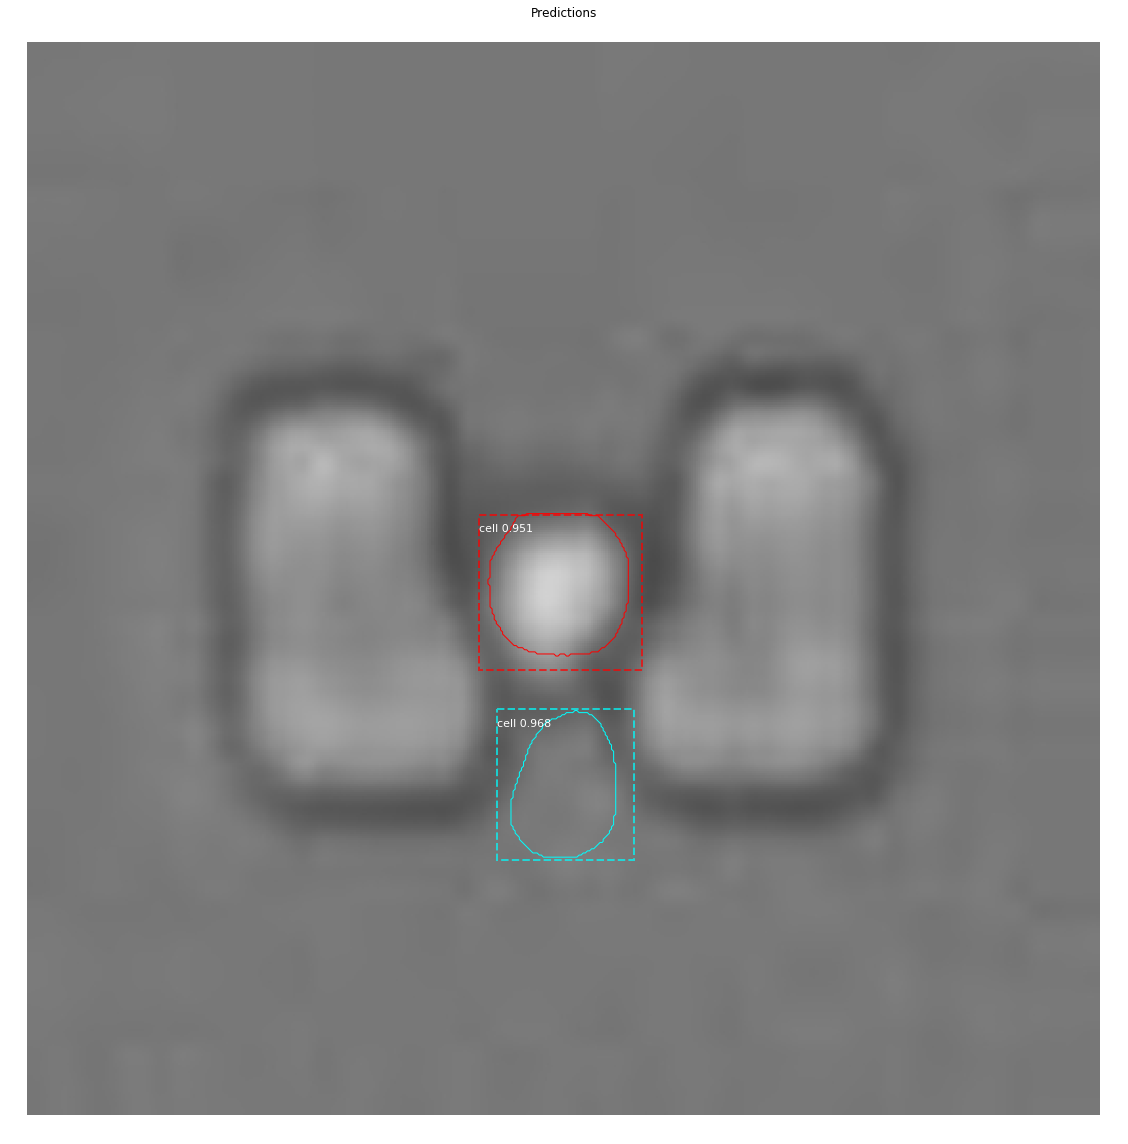

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  210.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:  104.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


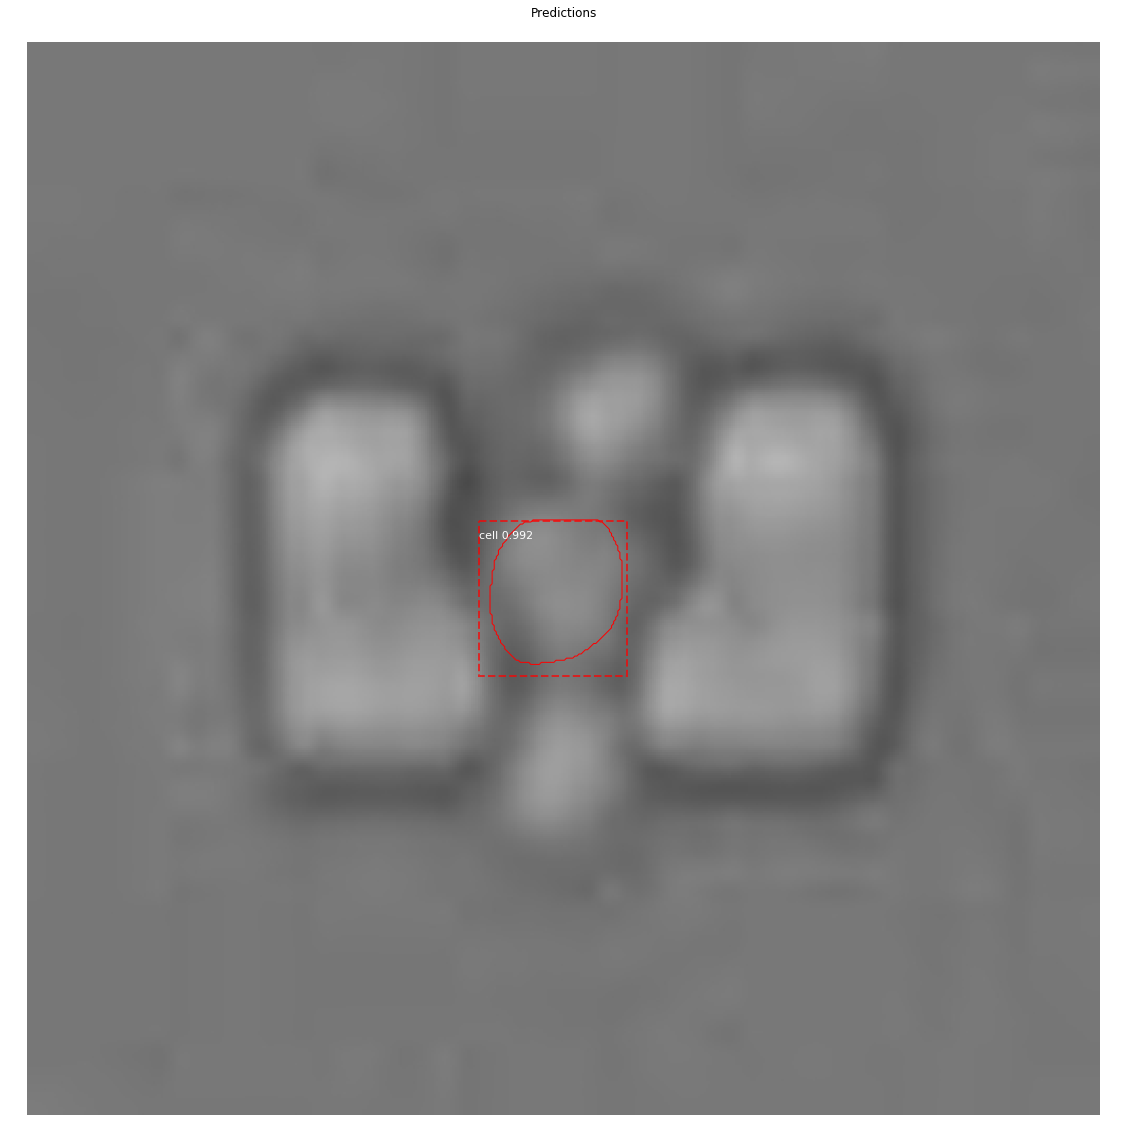

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  181.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   75.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


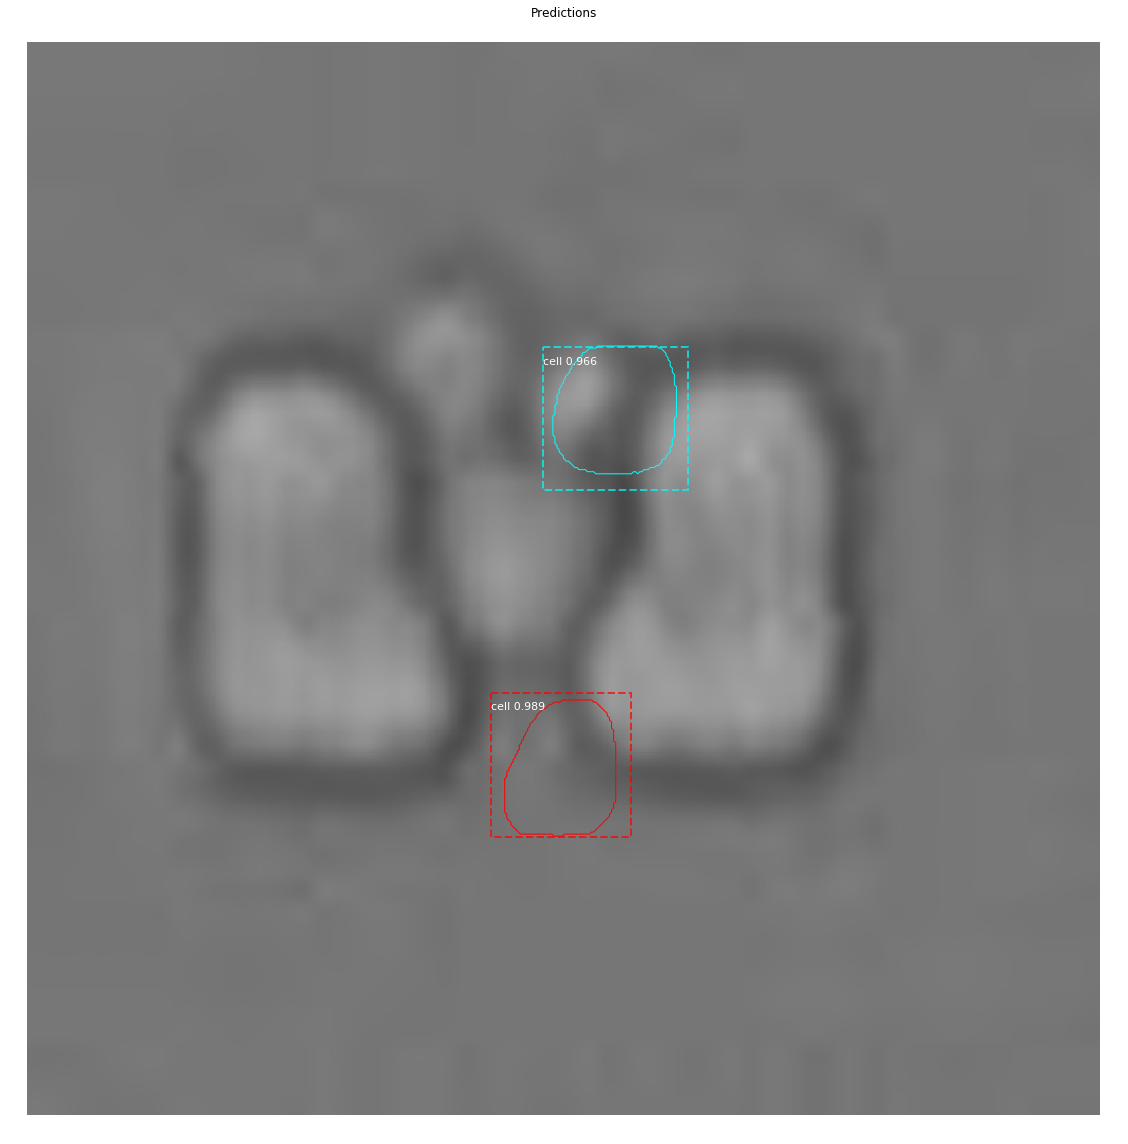

Processing 1 images
image                    shape: (512, 512, 3)         min:   72.00000  max:  168.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -51.70000  max:   62.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


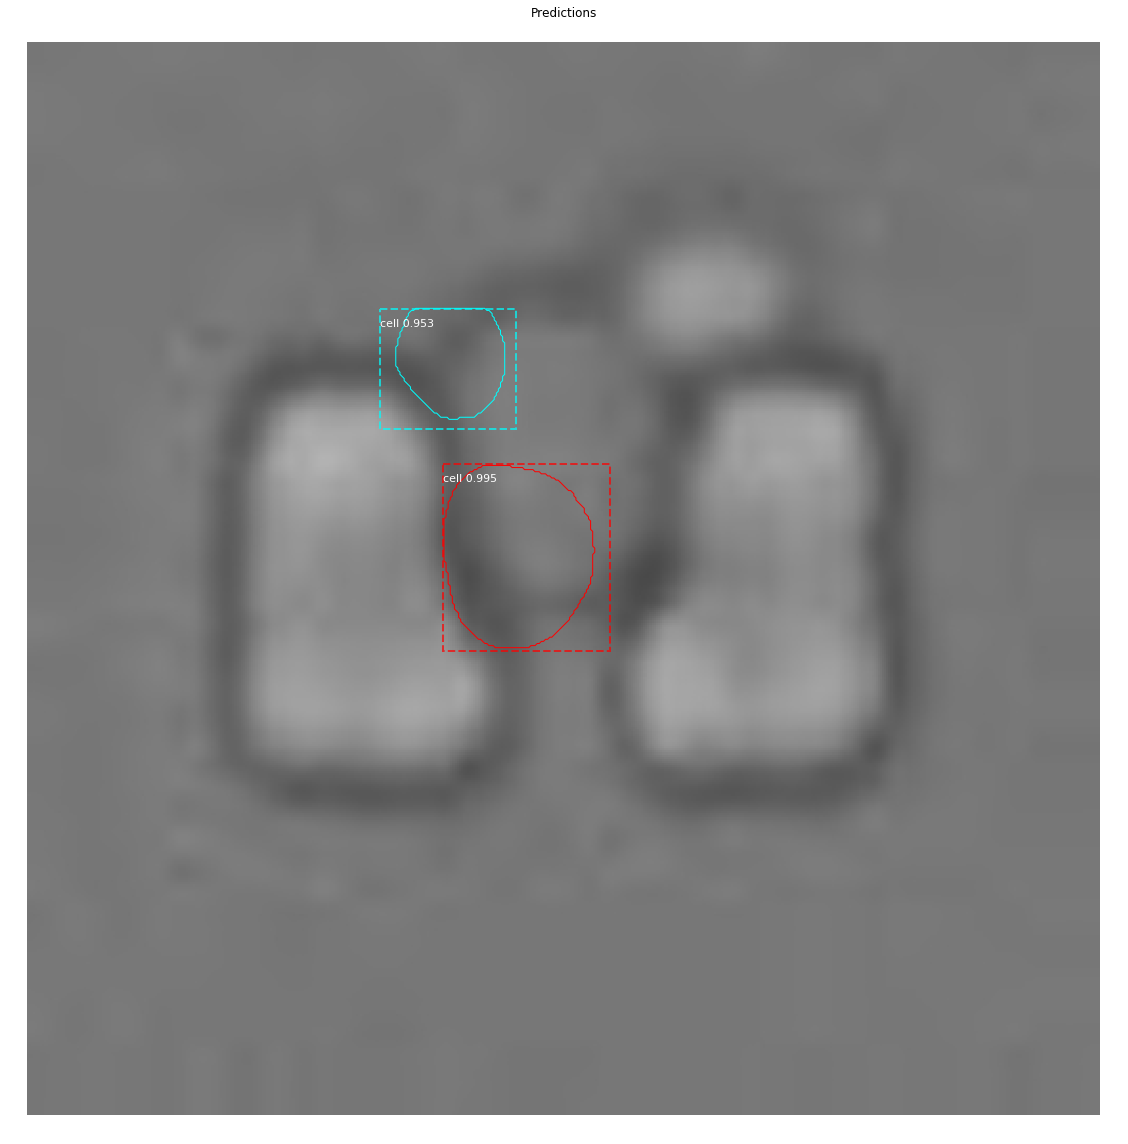

Processing 1 images
image                    shape: (512, 512, 3)         min:   73.00000  max:  179.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -50.70000  max:   73.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


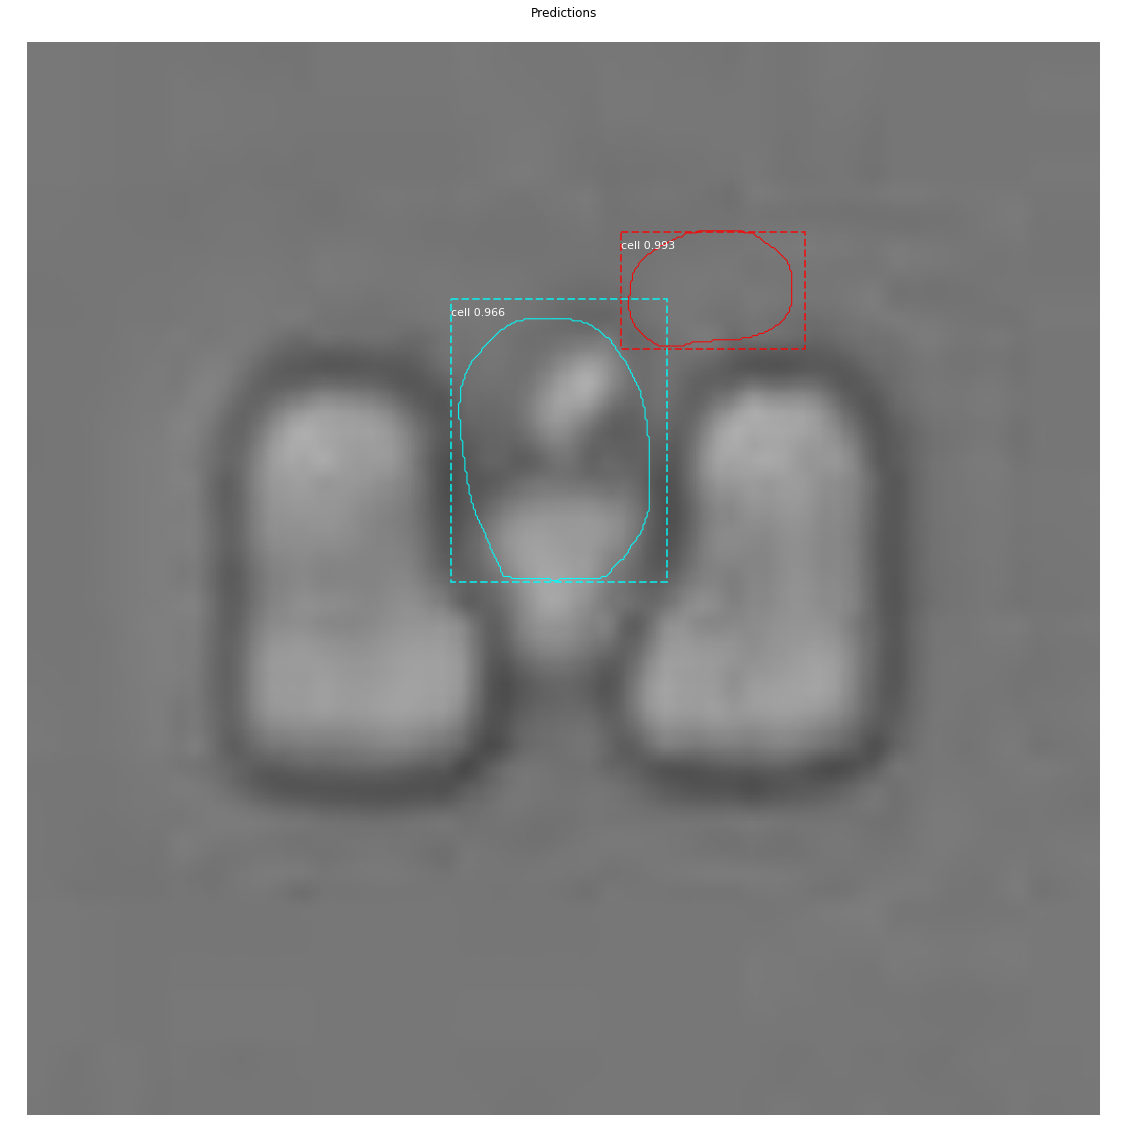

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  173.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   67.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


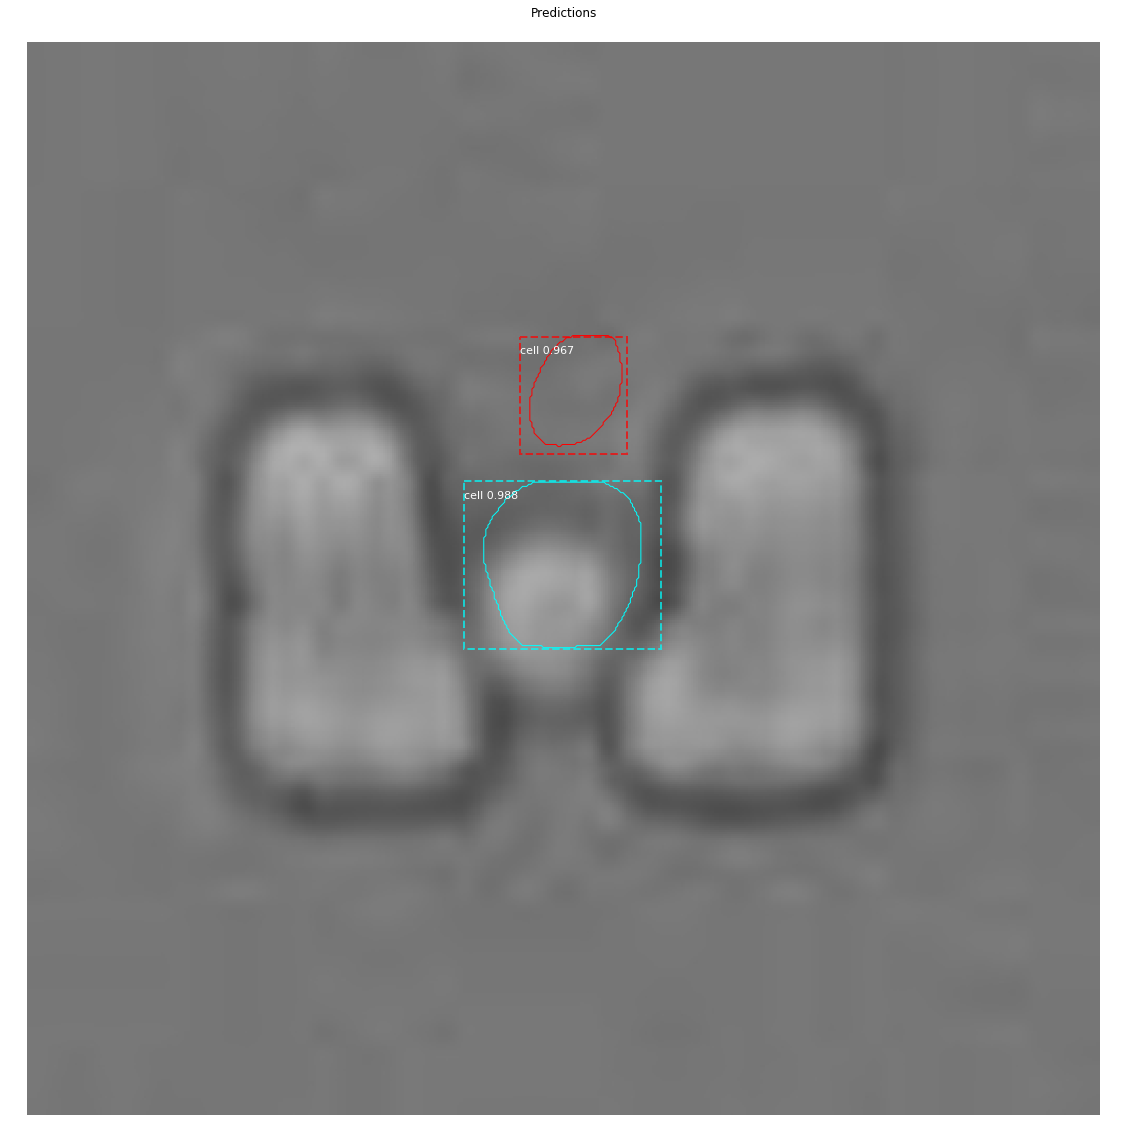

Processing 1 images
image                    shape: (512, 512, 3)         min:   73.00000  max:  175.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -51.70000  max:   69.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


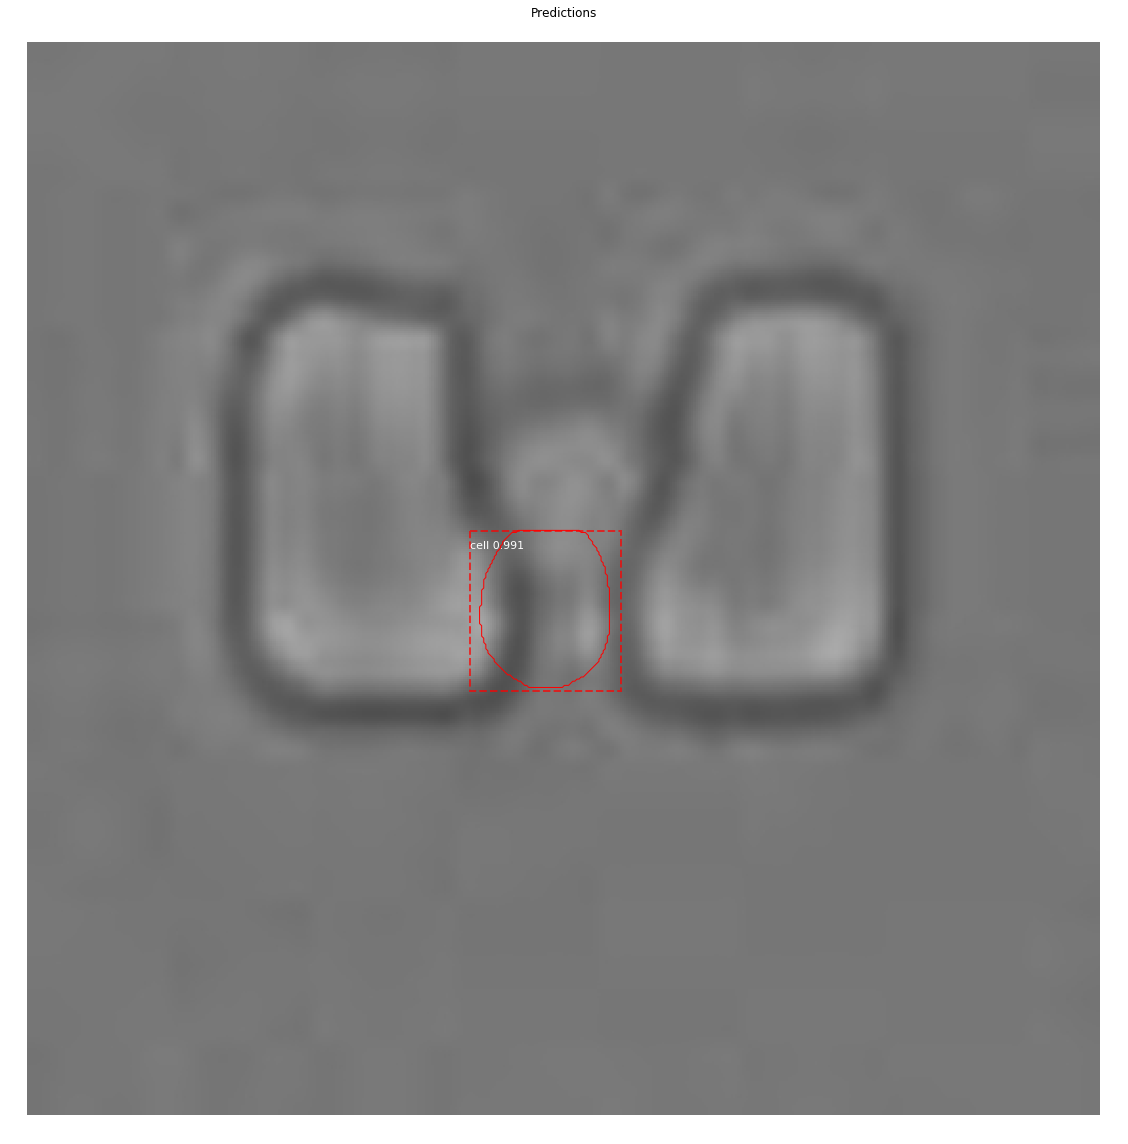

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  170.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


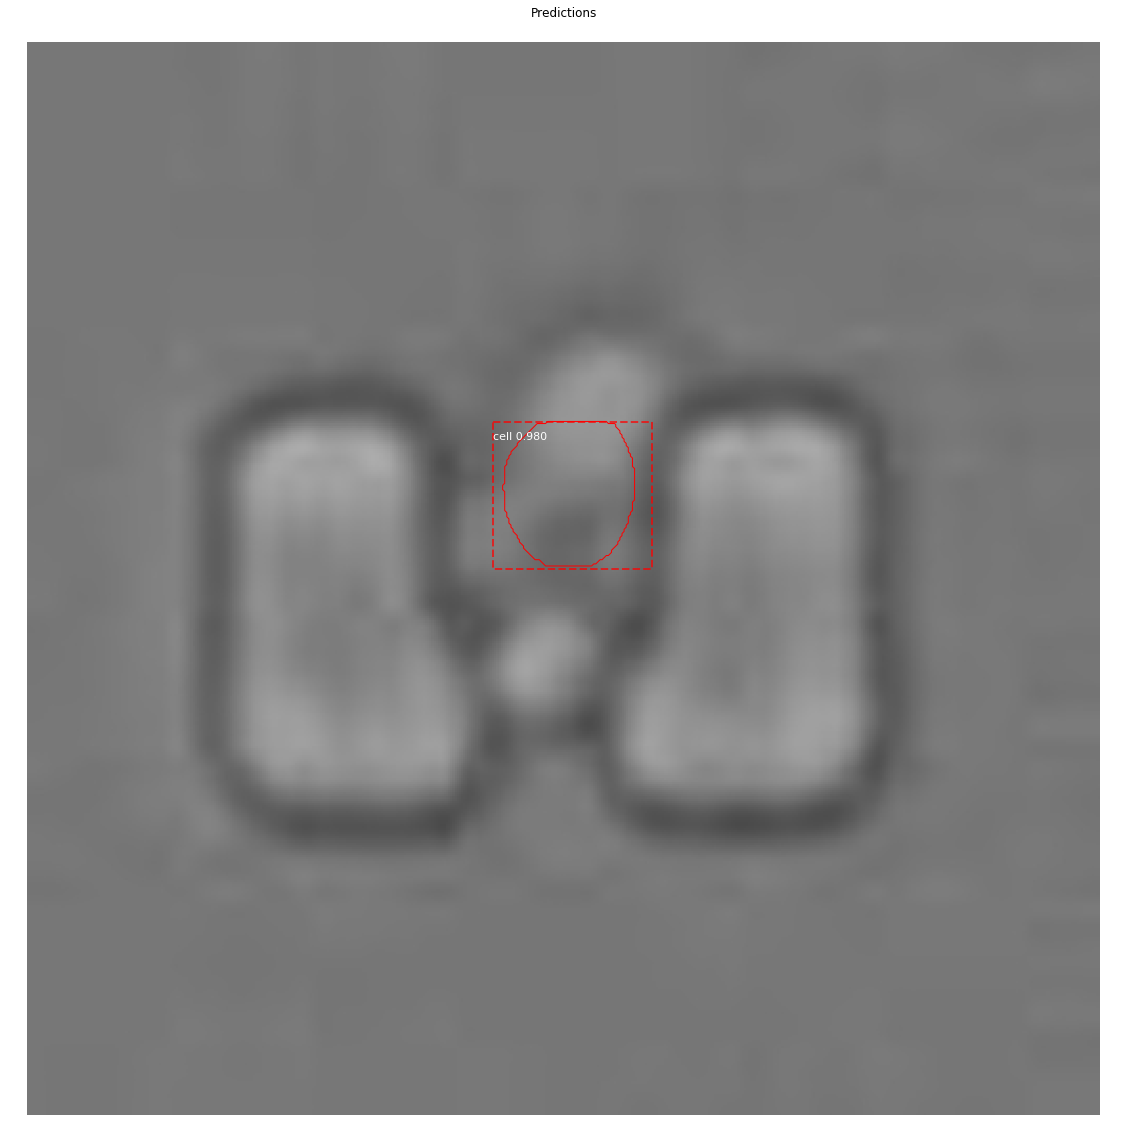

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  172.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   66.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


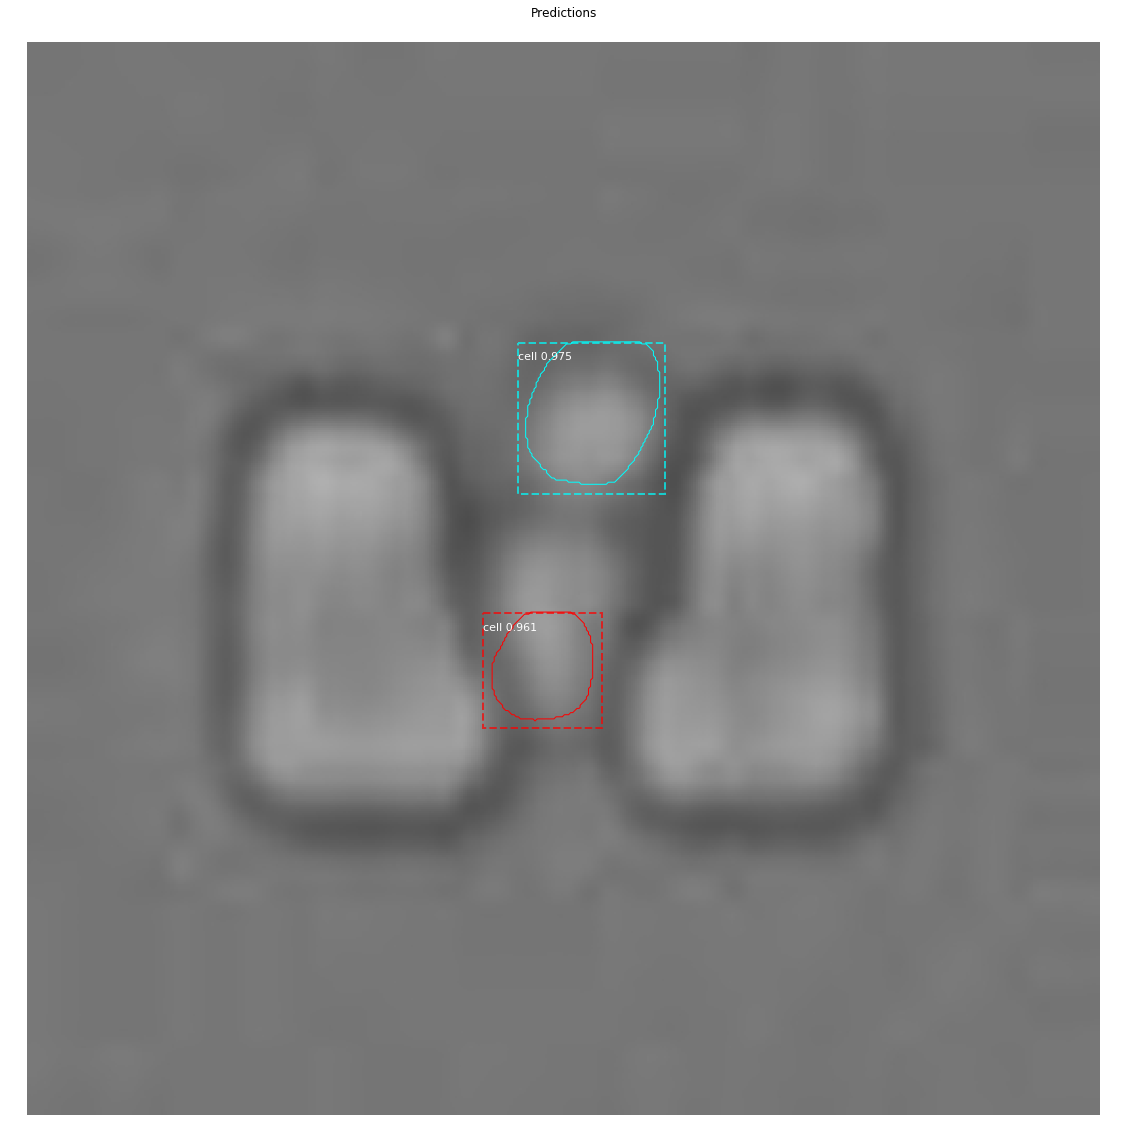

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  175.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   69.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


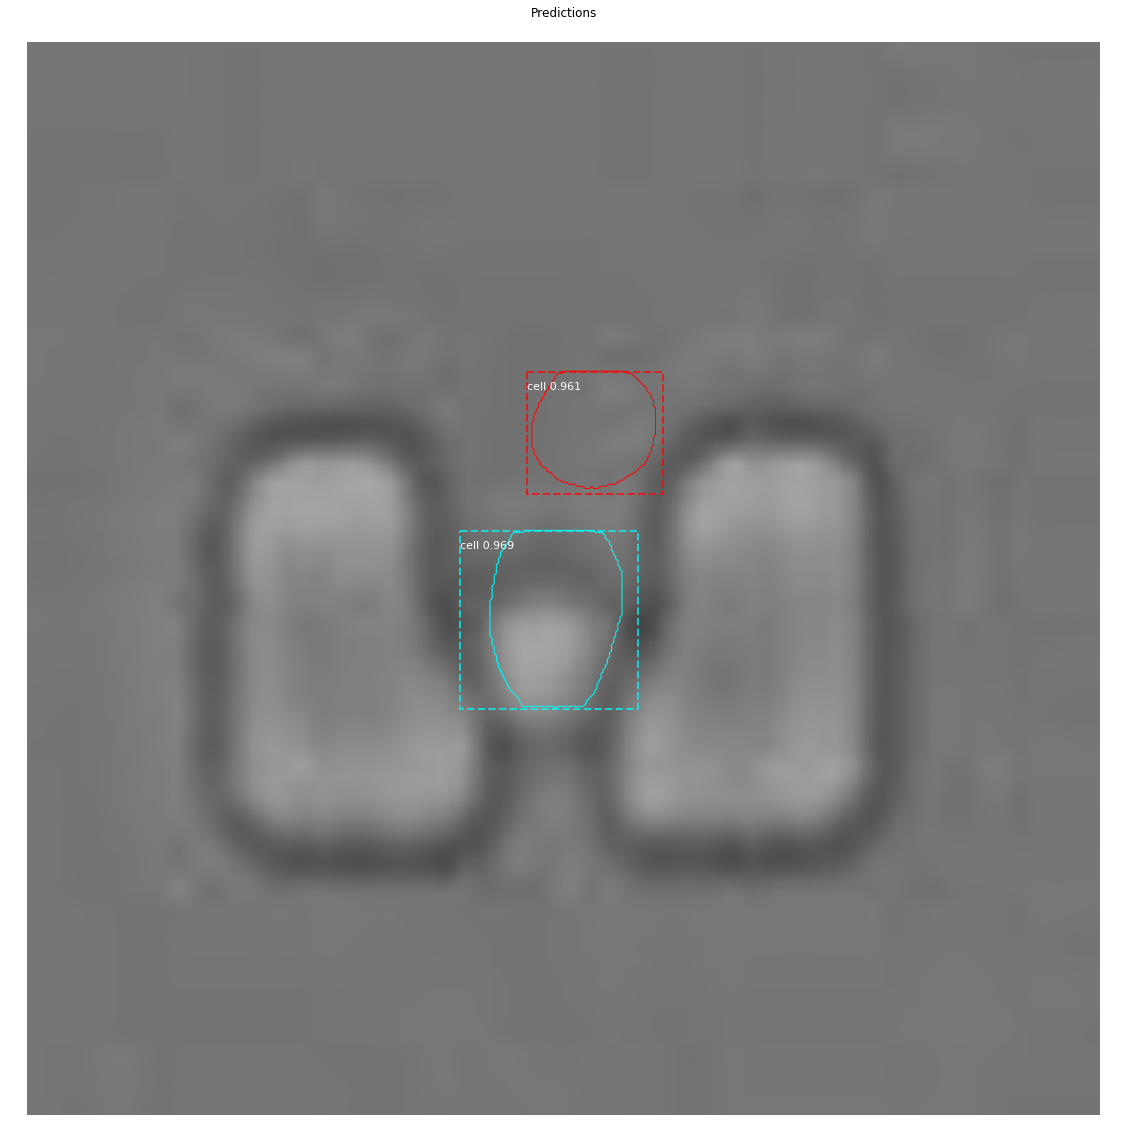

Processing 1 images
image                    shape: (512, 512, 3)         min:   69.00000  max:  167.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -54.70000  max:   61.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


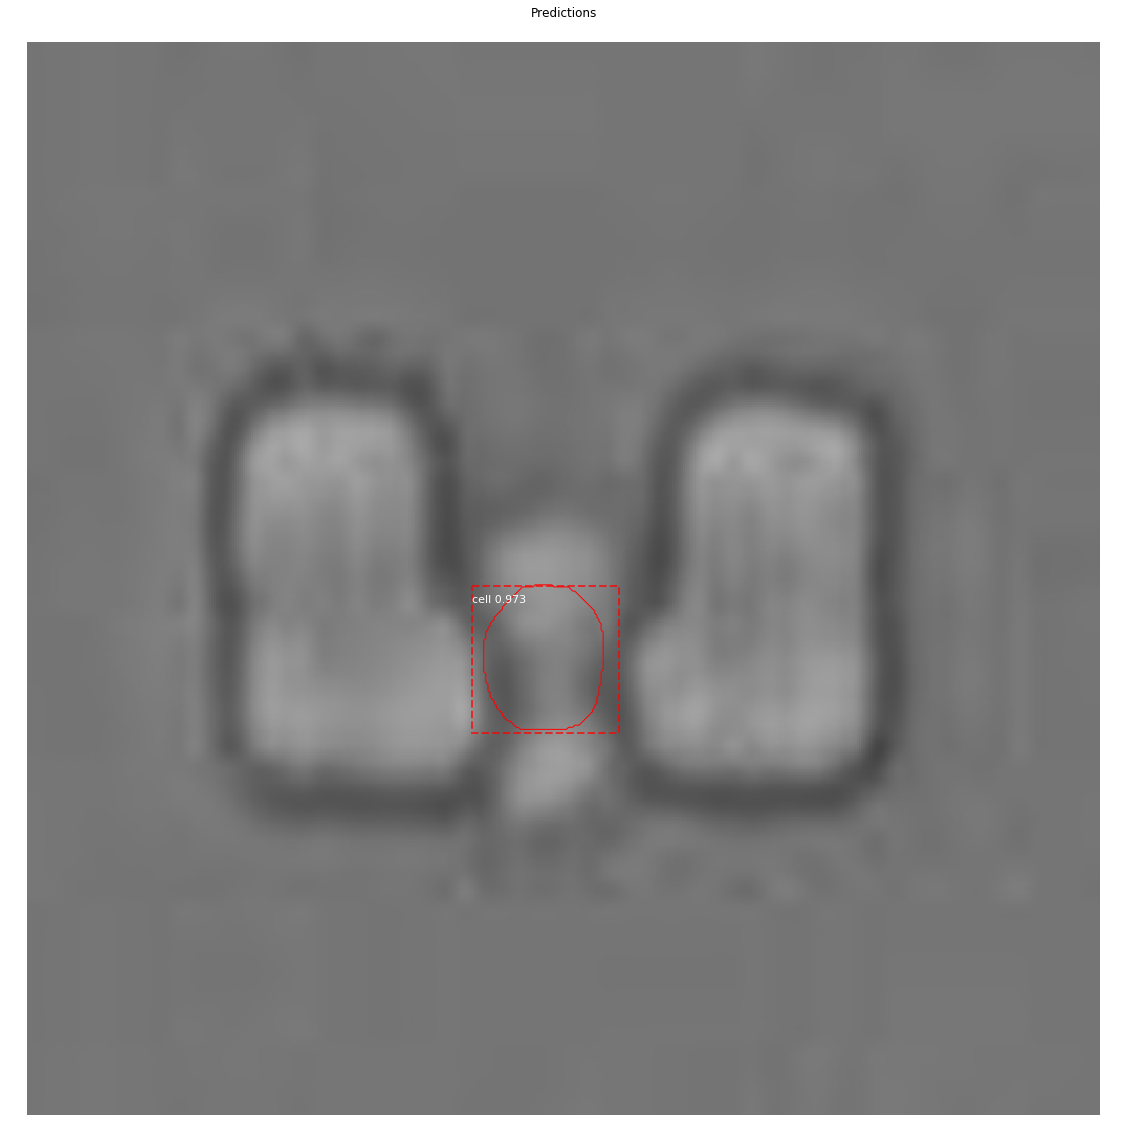

Processing 1 images
image                    shape: (512, 512, 3)         min:   69.00000  max:  168.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -54.70000  max:   63.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



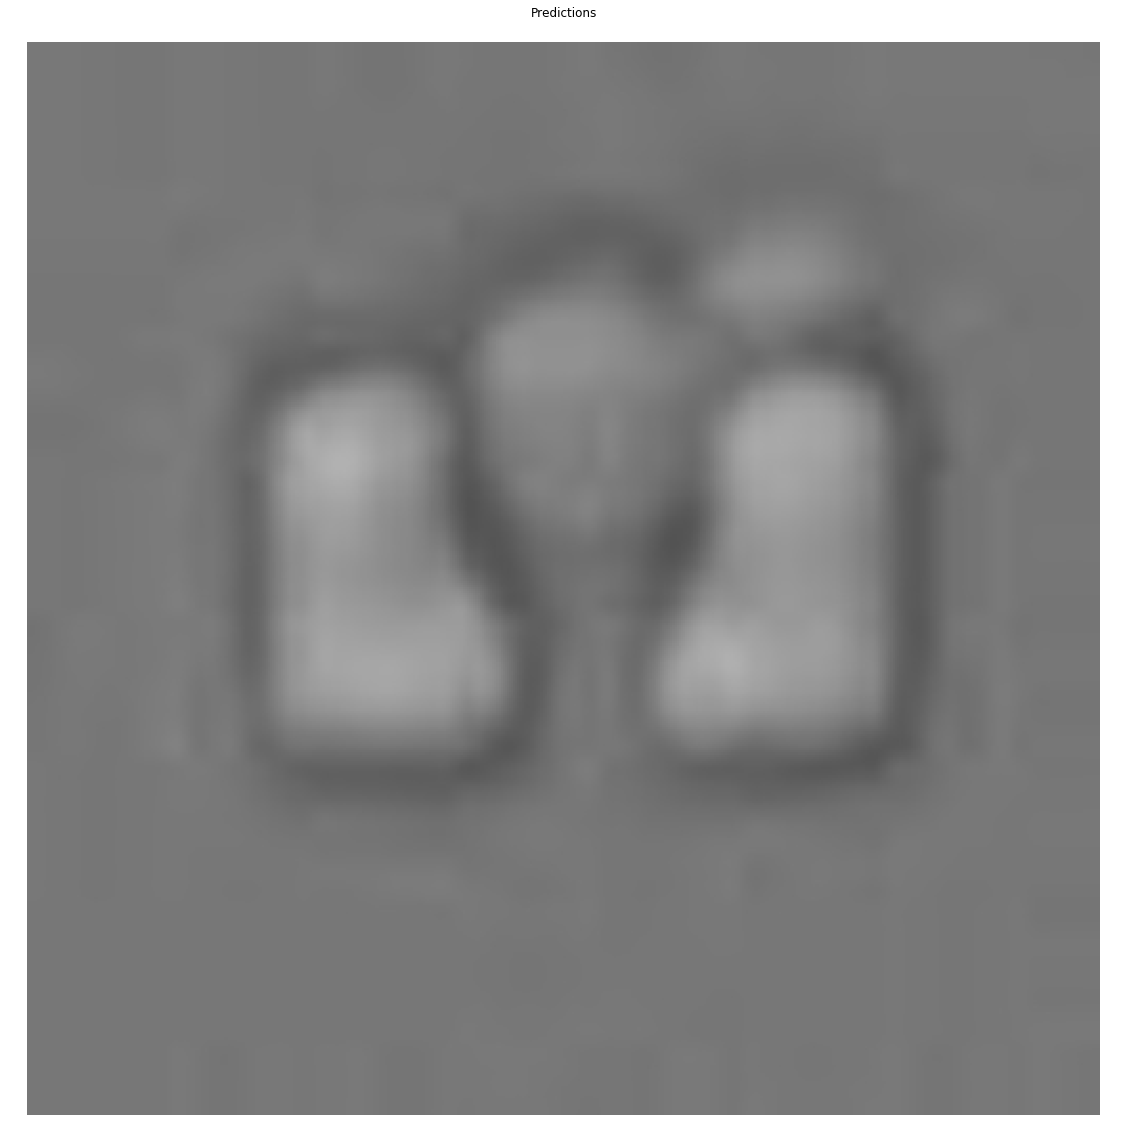

Processing 1 images
image                    shape: (512, 512, 3)         min:   83.00000  max:  177.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -41.70000  max:   72.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


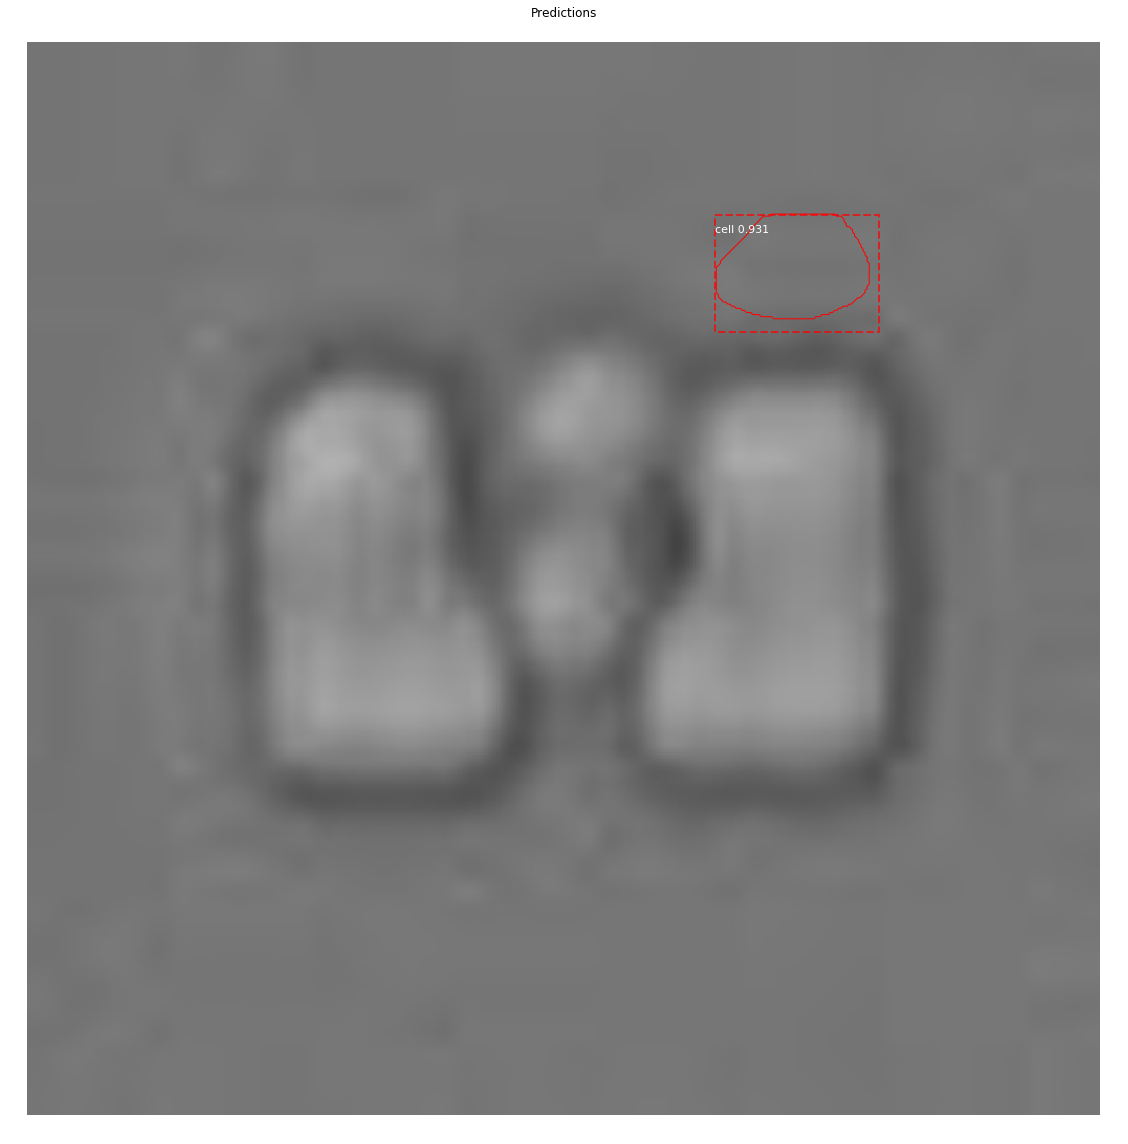

Processing 1 images
image                    shape: (512, 512, 3)         min:   67.00000  max:  177.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -56.70000  max:   71.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


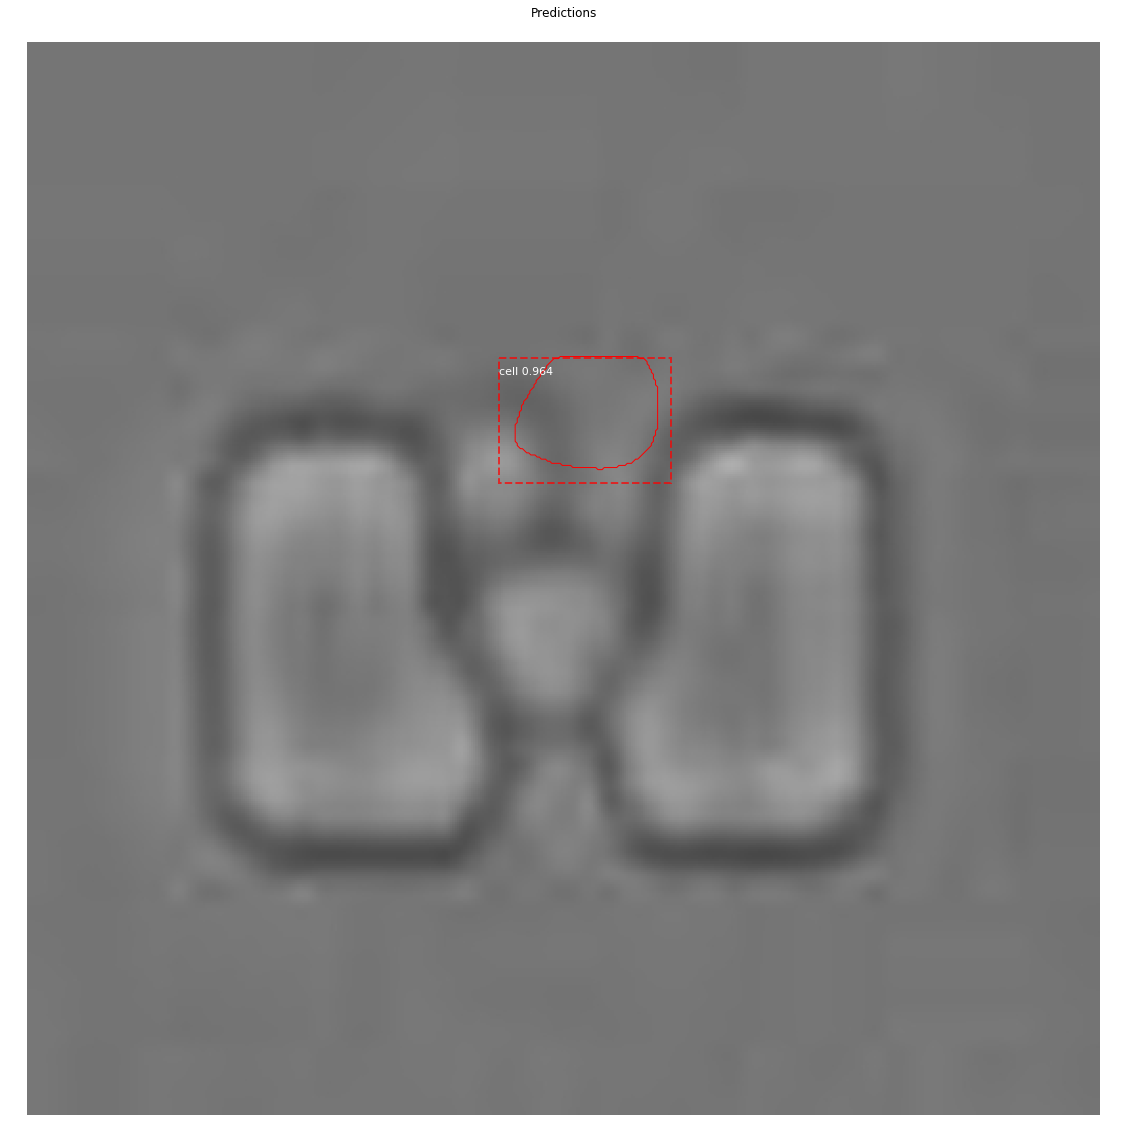

Processing 1 images
image                    shape: (512, 512, 3)         min:   72.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -51.70000  max:   66.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


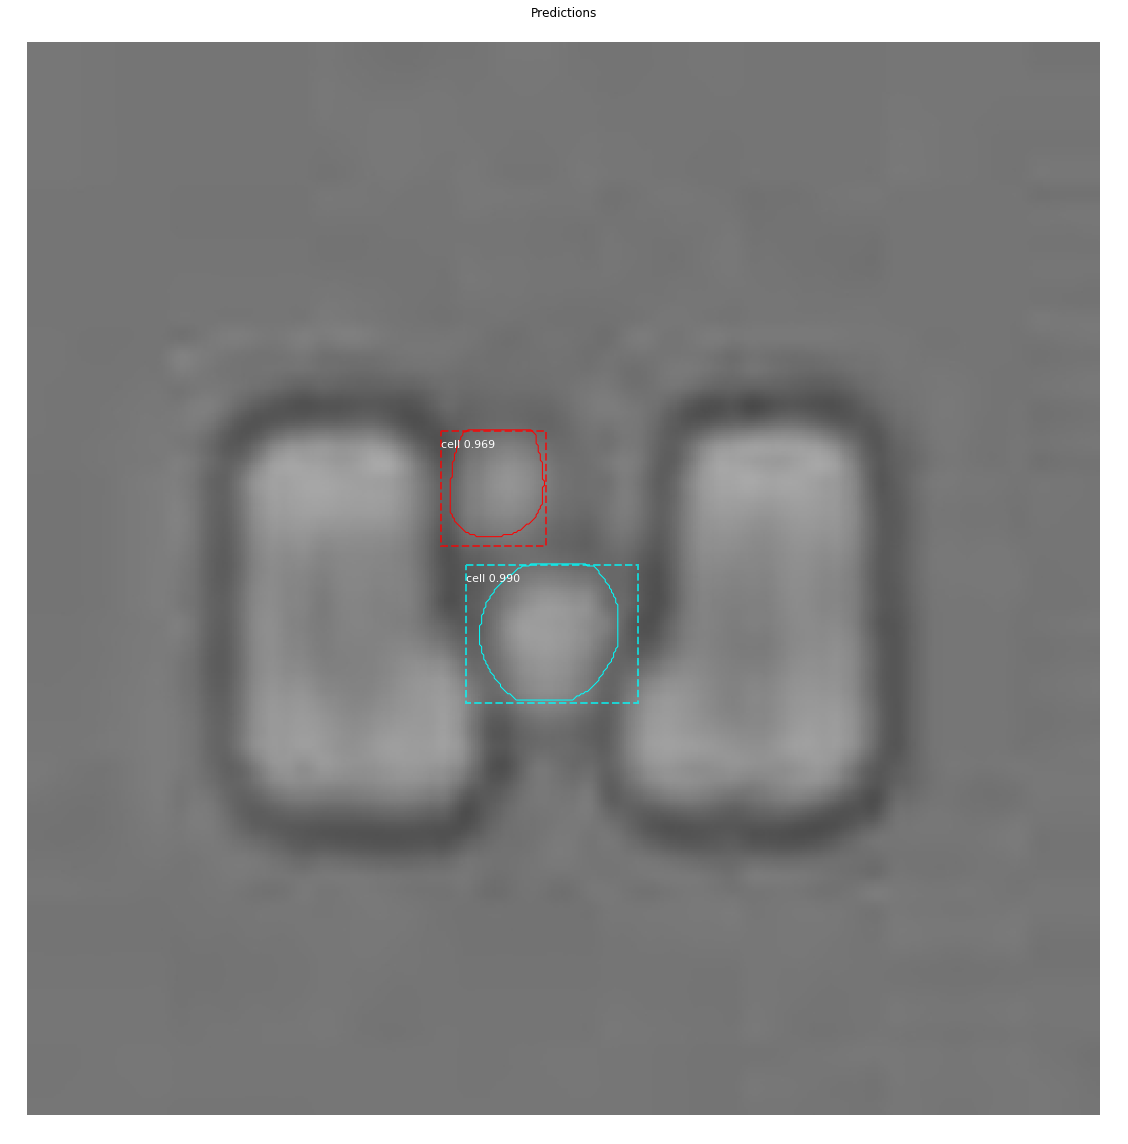

Processing 1 images
image                    shape: (512, 512, 3)         min:   73.00000  max:  169.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -50.70000  max:   63.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


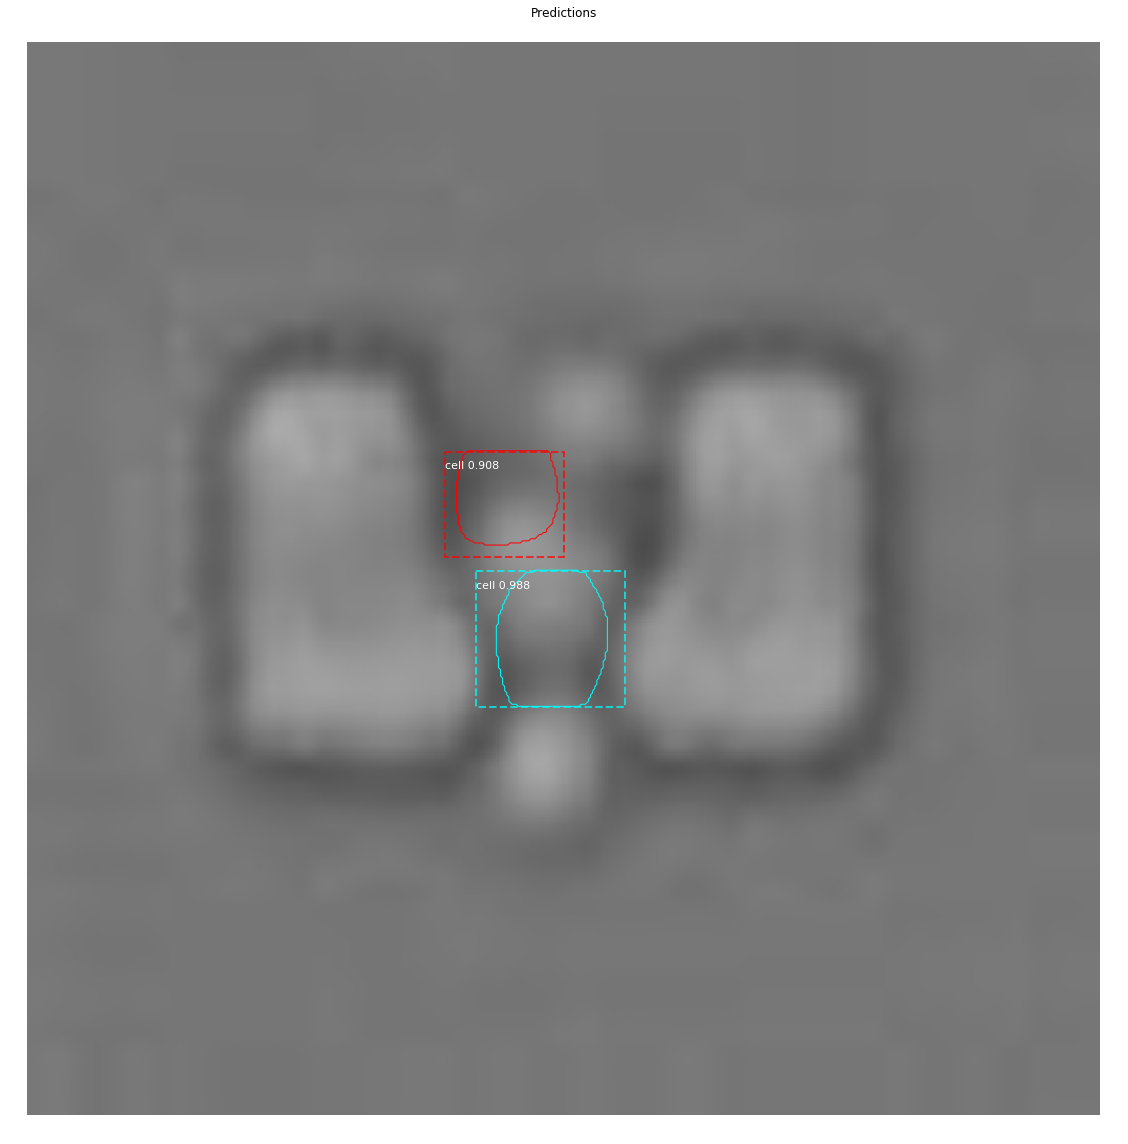

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  170.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


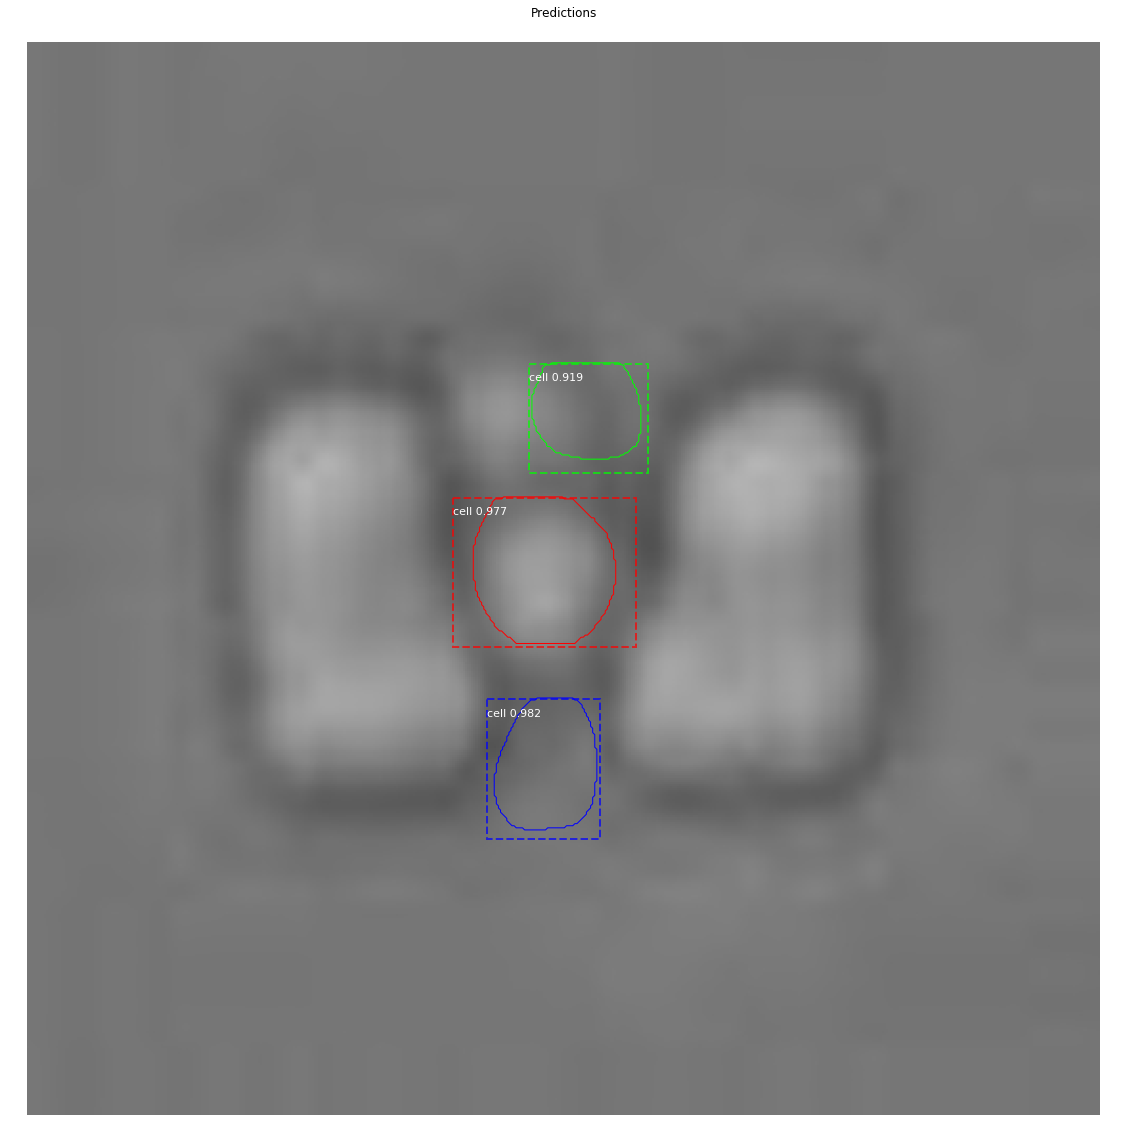

Processing 1 images
image                    shape: (512, 512, 3)         min:   81.00000  max:  181.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -42.70000  max:   75.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


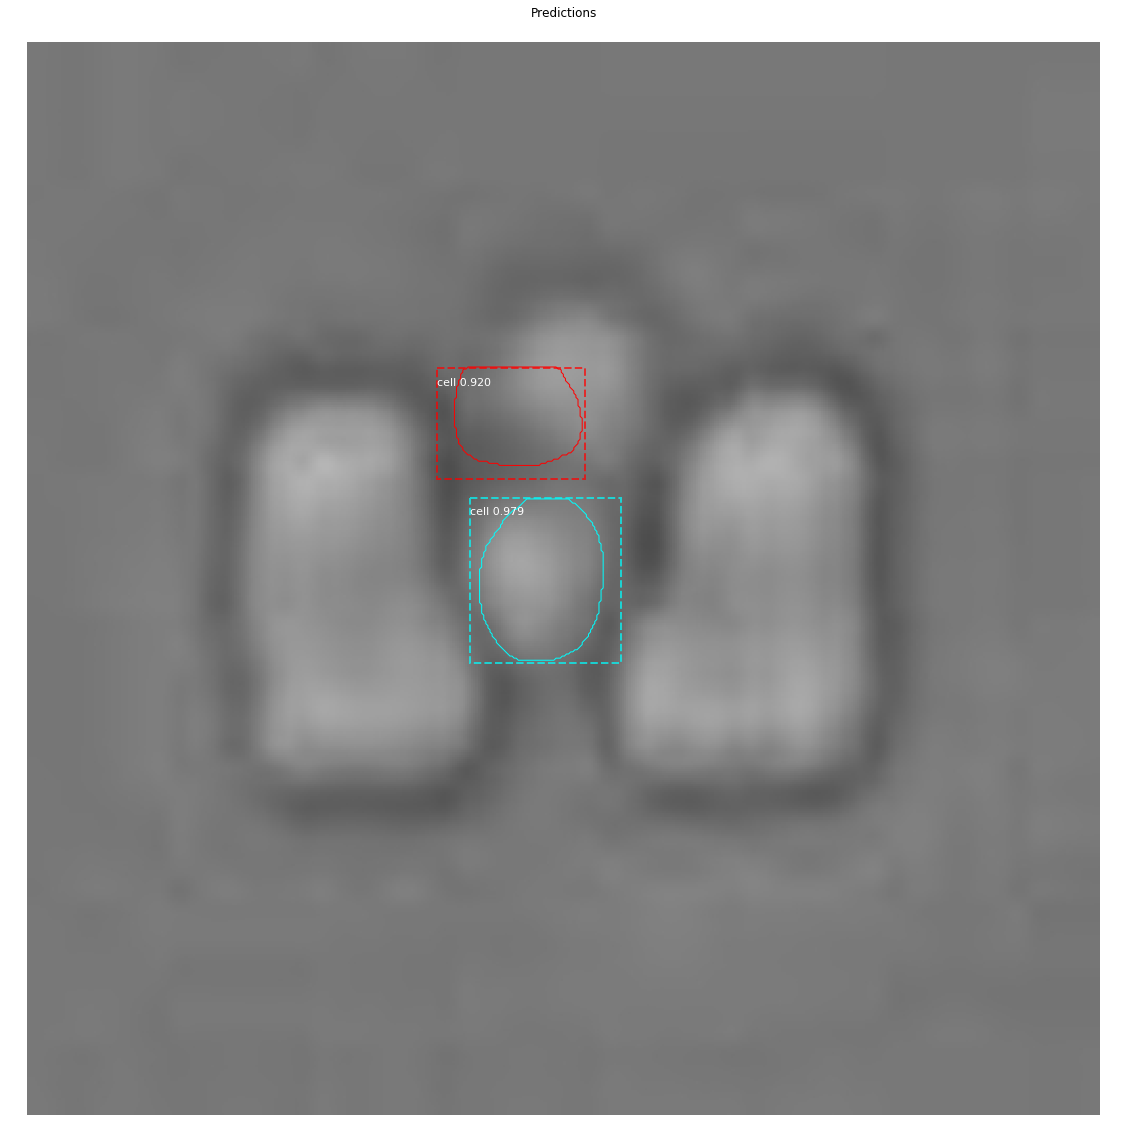

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  181.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   75.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


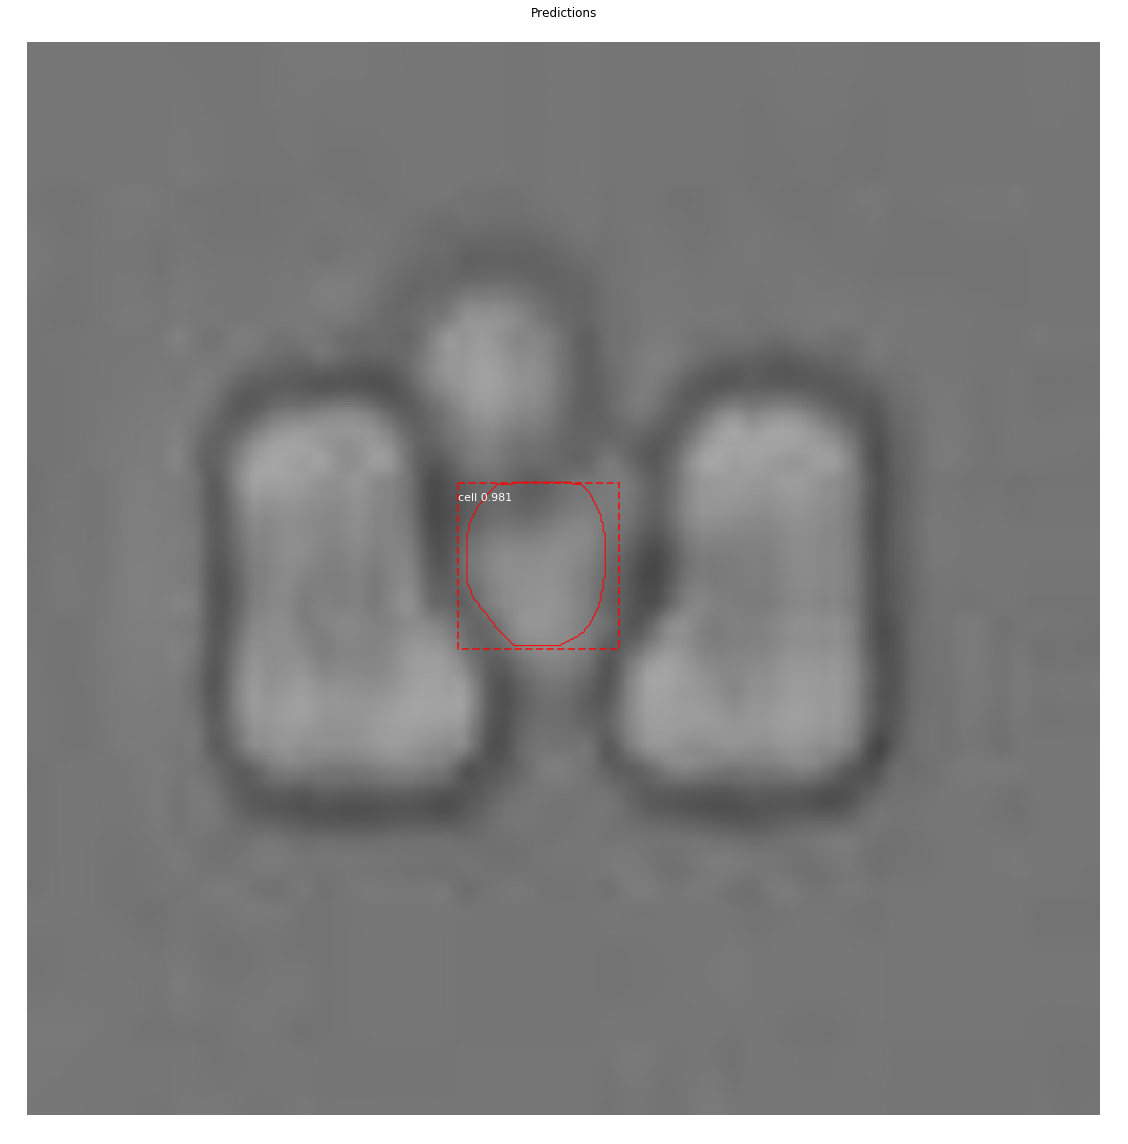

Processing 1 images
image                    shape: (512, 512, 3)         min:   70.00000  max:  166.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -53.70000  max:   60.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


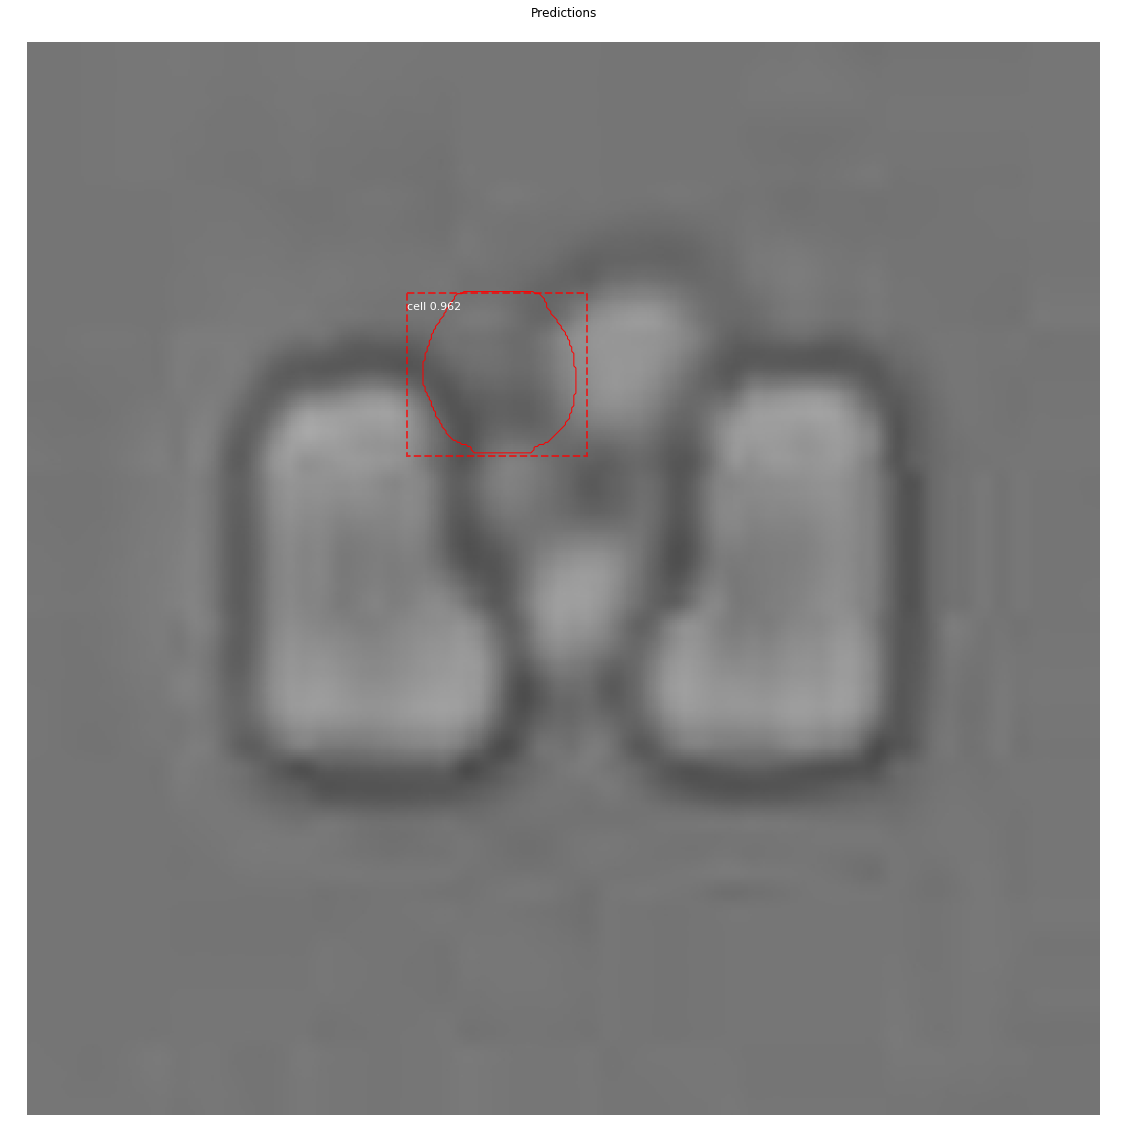

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  168.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   62.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


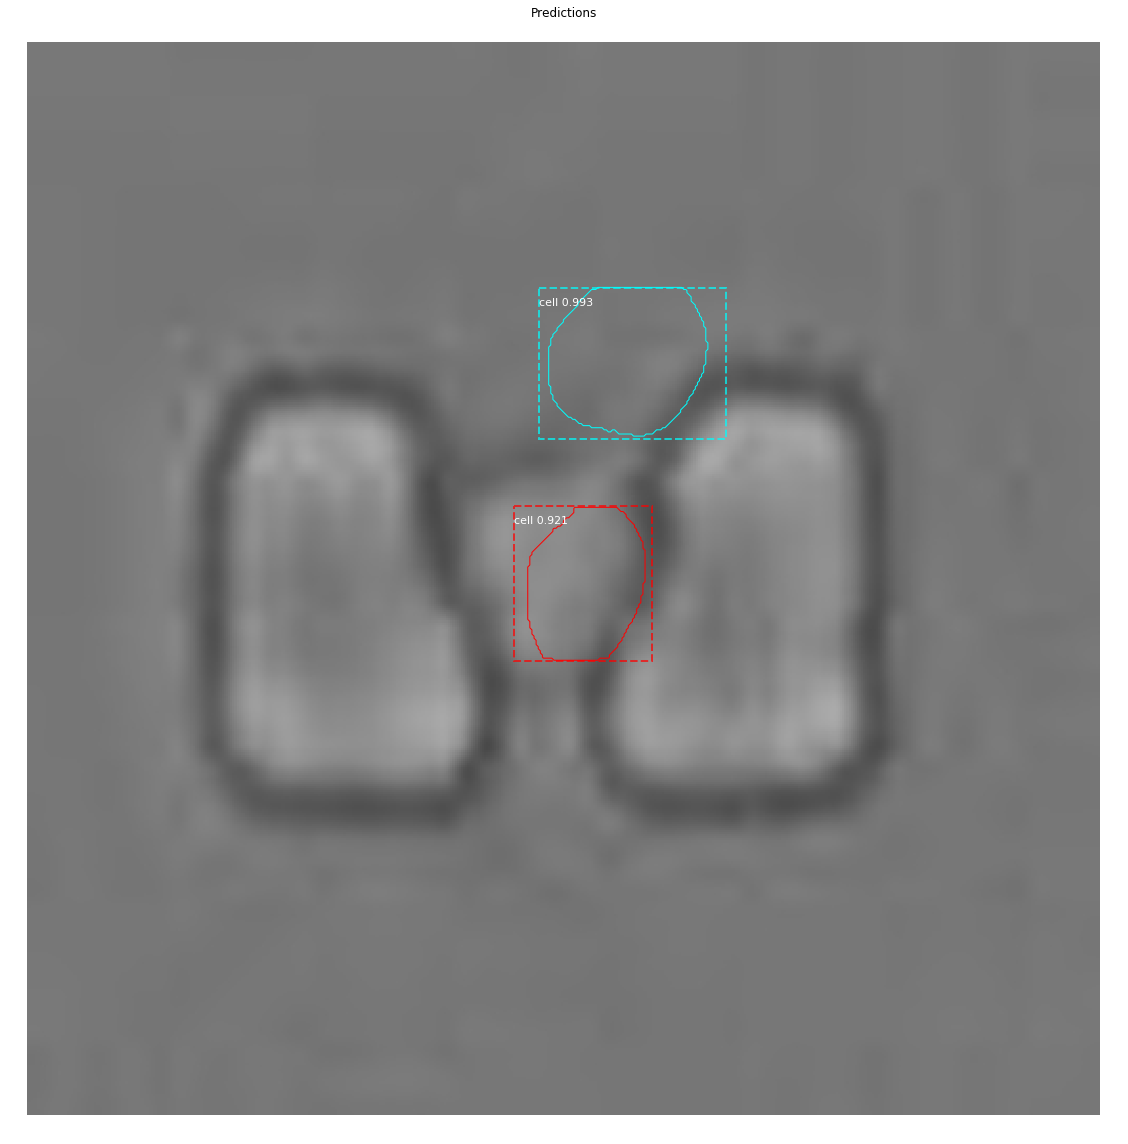

Processing 1 images
image                    shape: (512, 512, 3)         min:   73.00000  max:  170.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -50.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


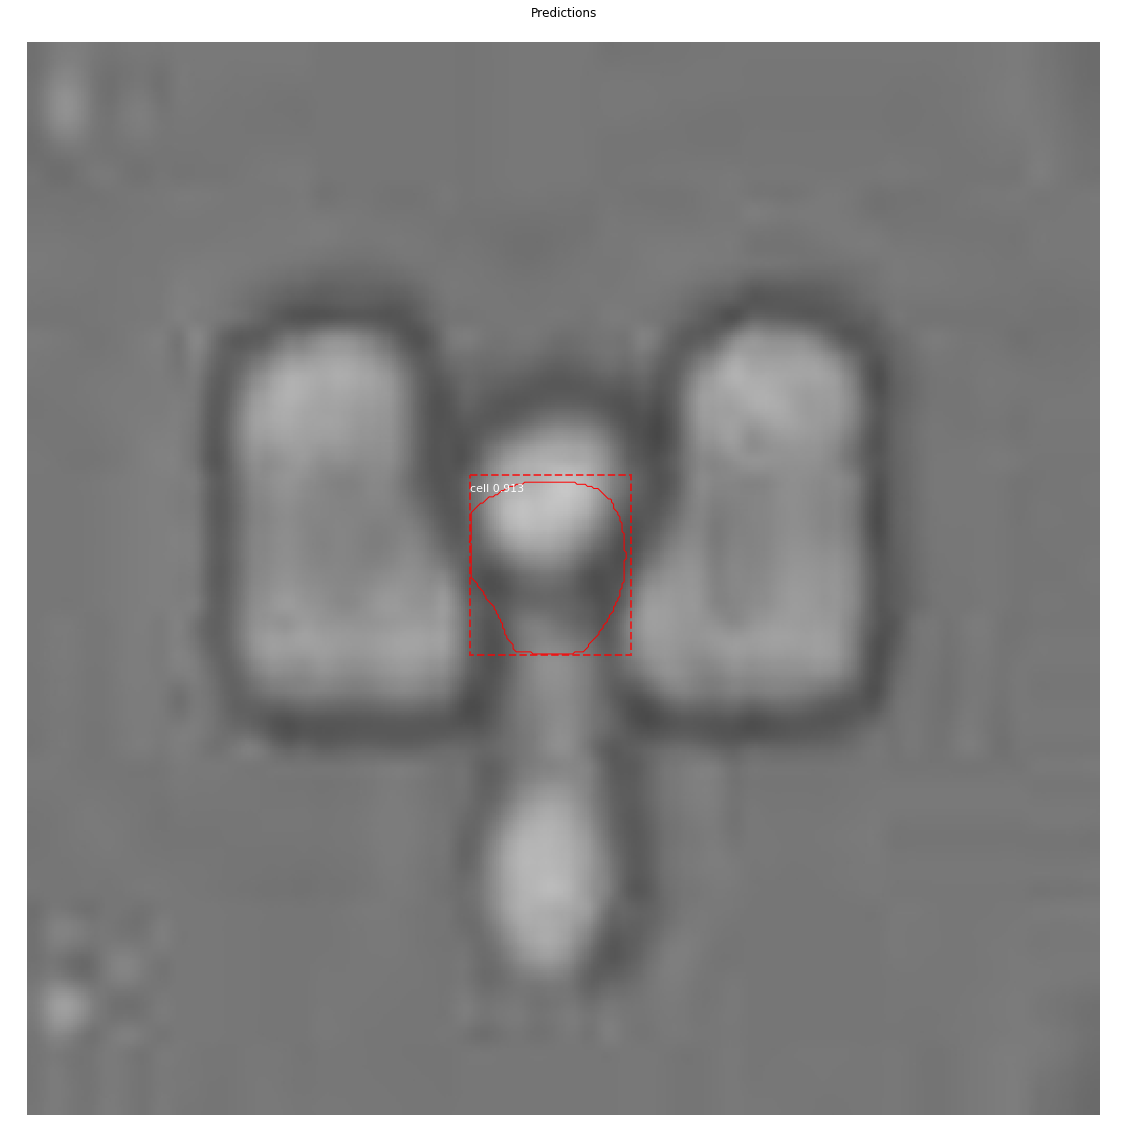

Processing 1 images
image                    shape: (512, 512, 3)         min:   71.00000  max:  200.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -52.70000  max:   94.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


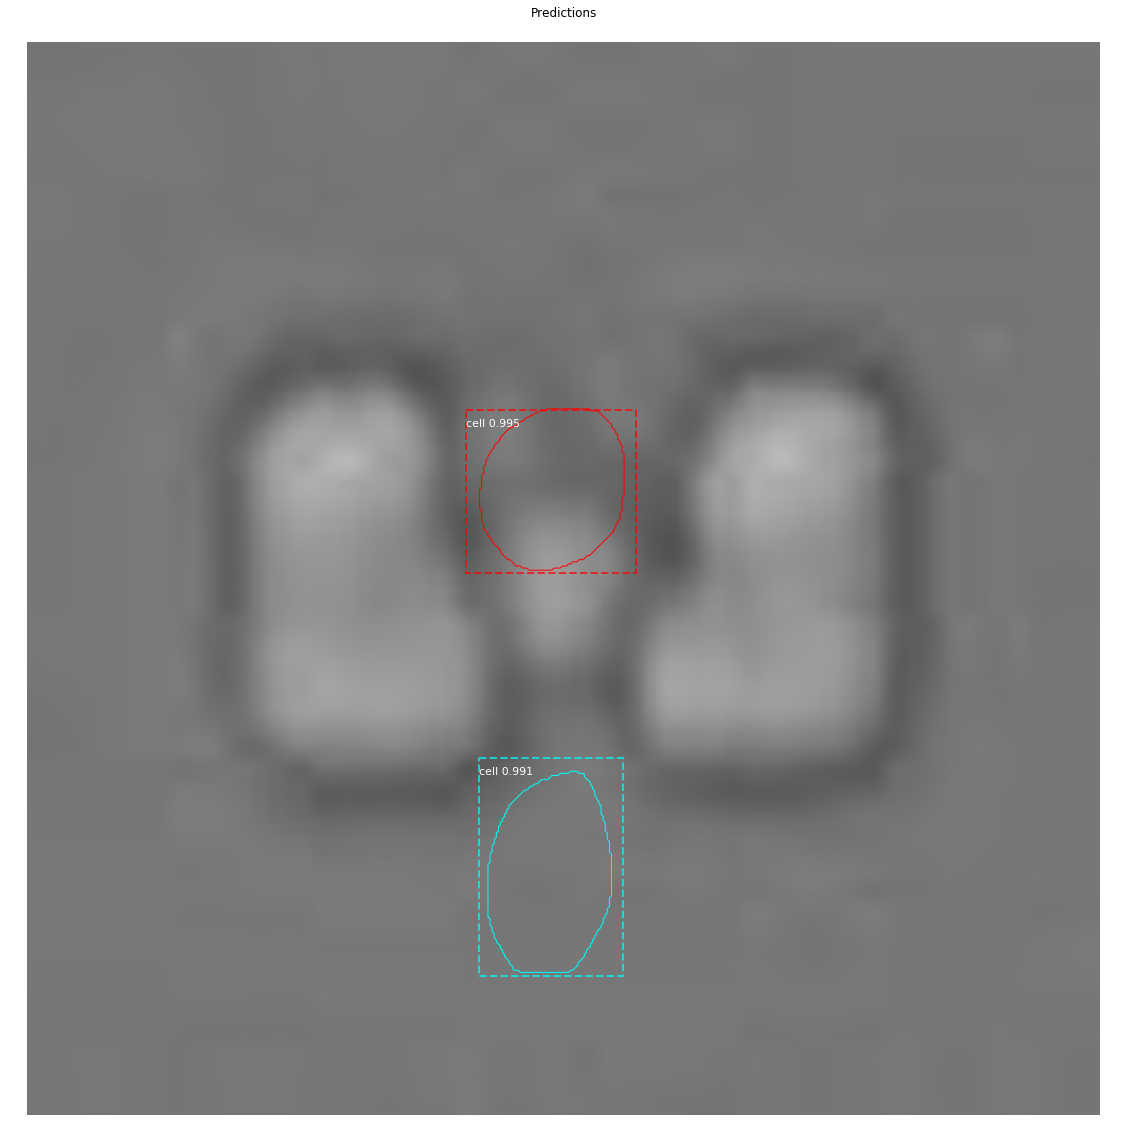

Processing 1 images
image                    shape: (512, 512, 3)         min:   82.00000  max:  185.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -42.70000  max:   79.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


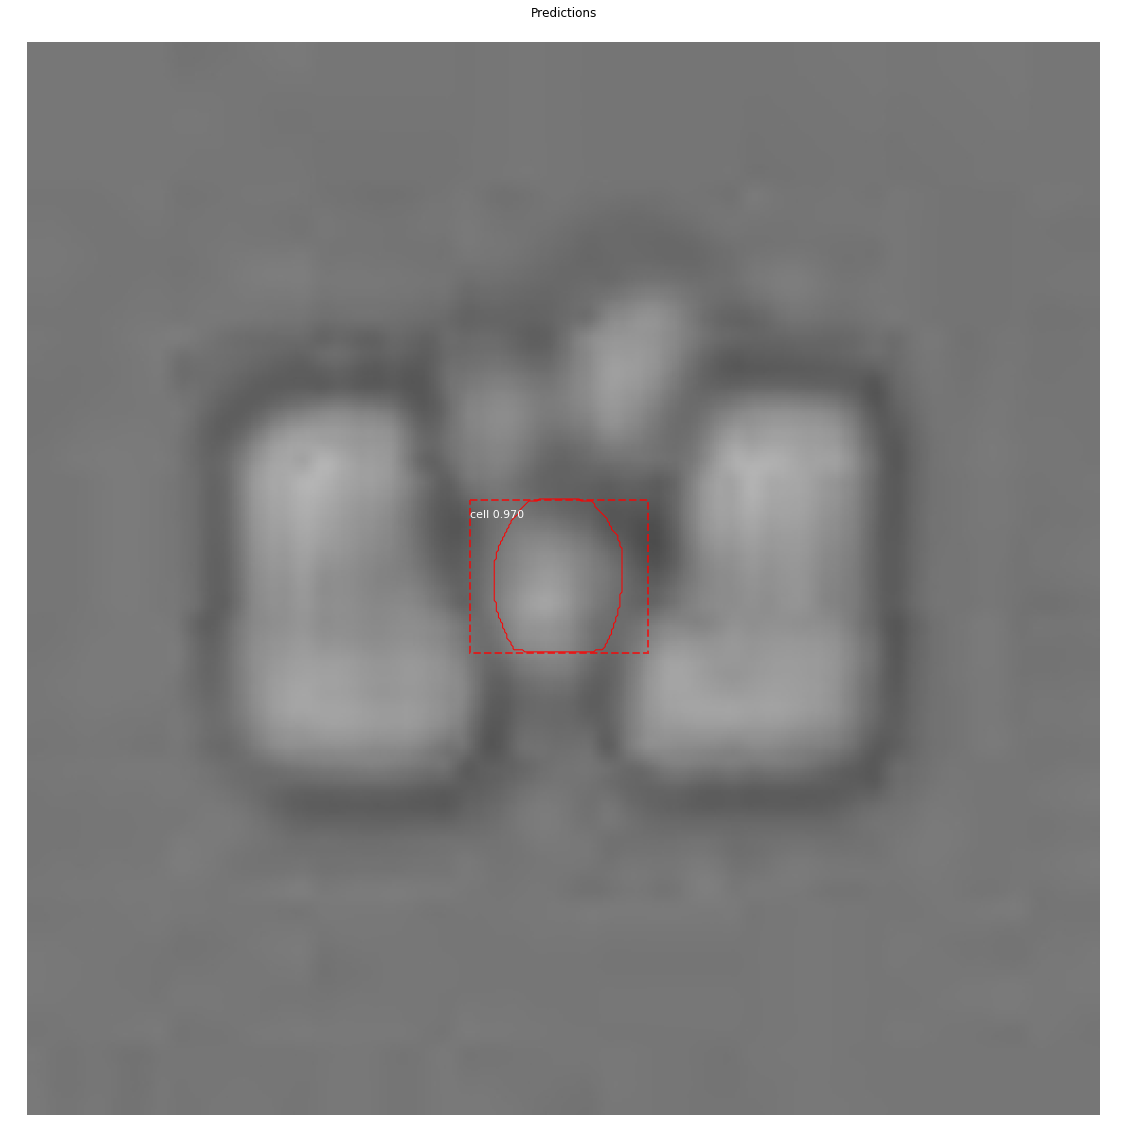

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  180.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   74.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


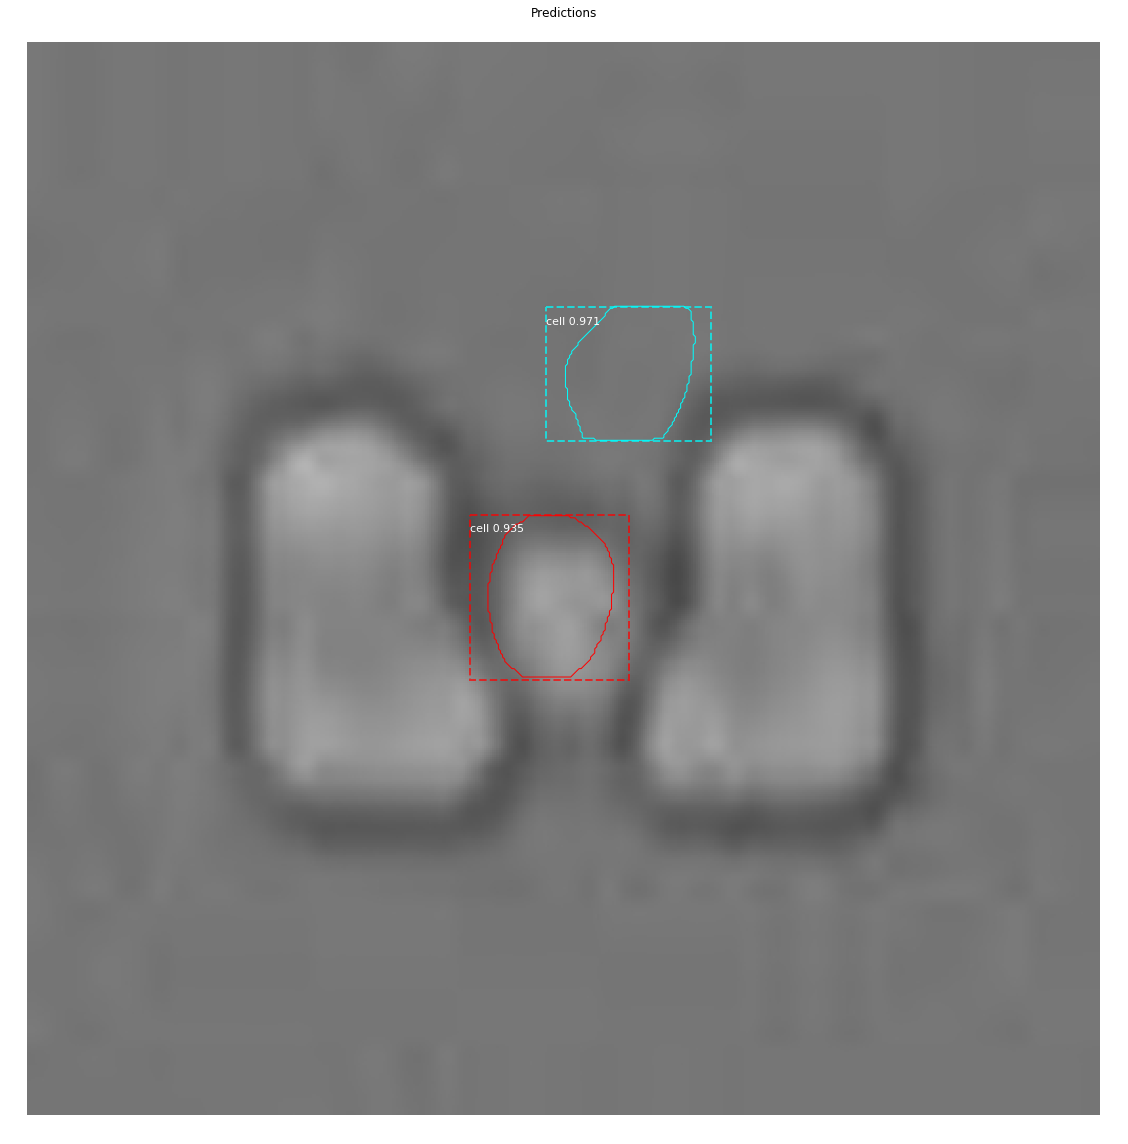

Processing 1 images
image                    shape: (512, 512, 3)         min:   72.00000  max:  179.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -51.70000  max:   73.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


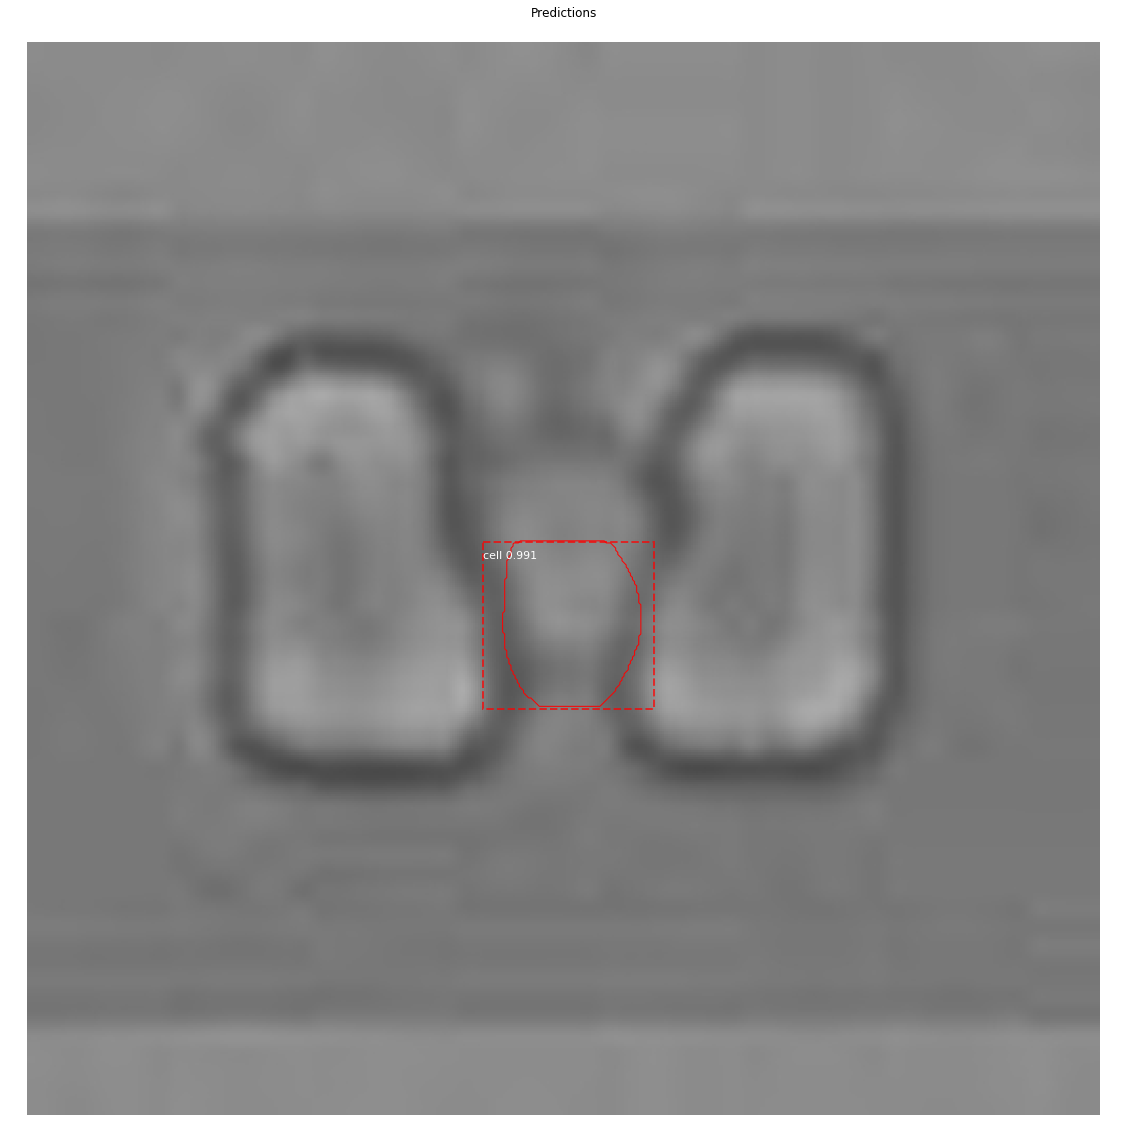

Processing 1 images
image                    shape: (512, 512, 3)         min:   73.00000  max:  171.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -50.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


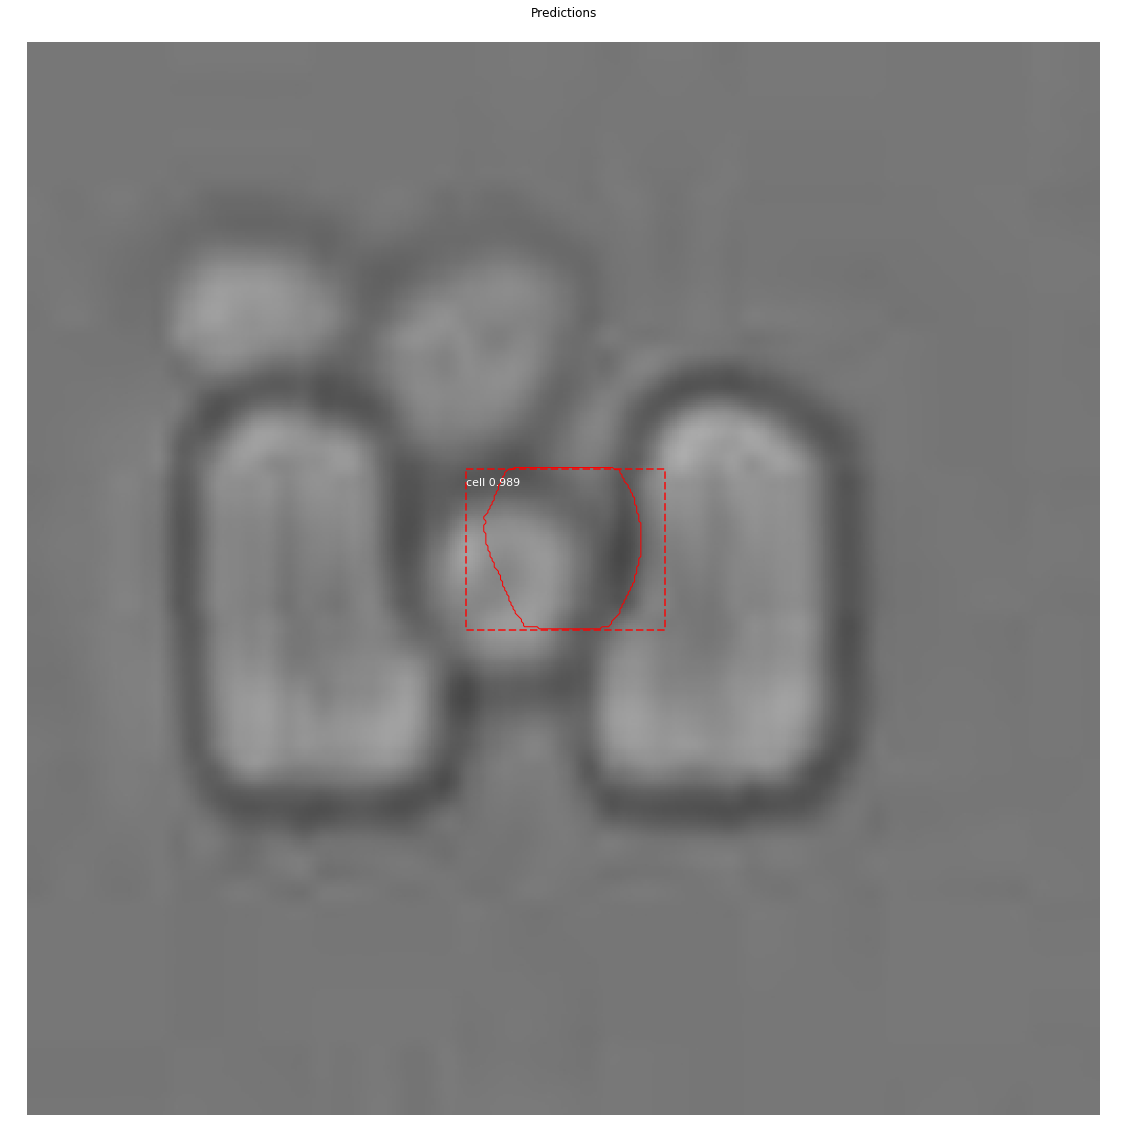

Processing 1 images
image                    shape: (512, 512, 3)         min:   71.00000  max:  172.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -52.70000  max:   66.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


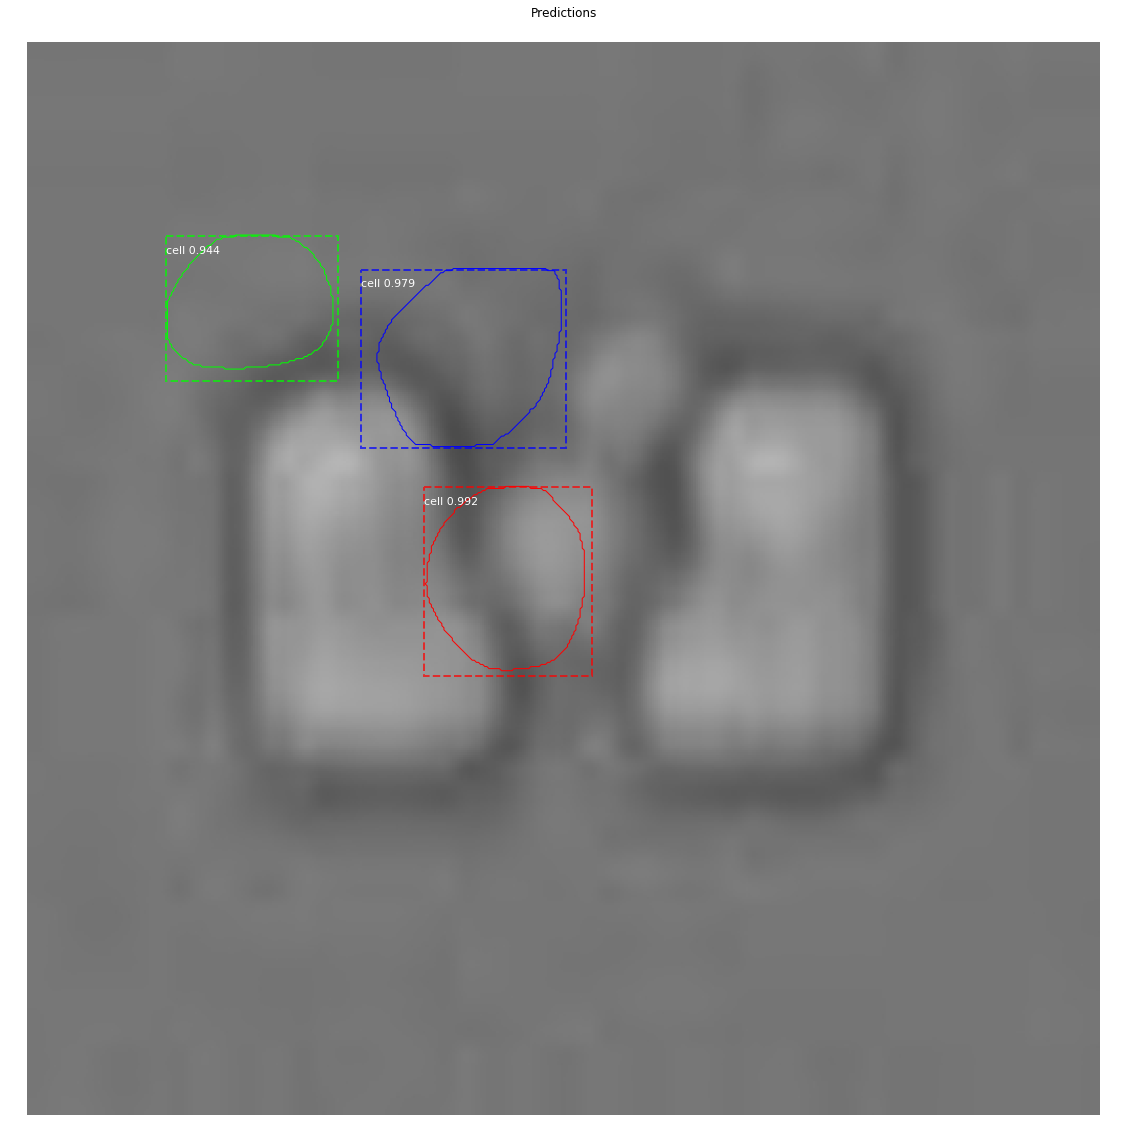

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  181.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   75.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


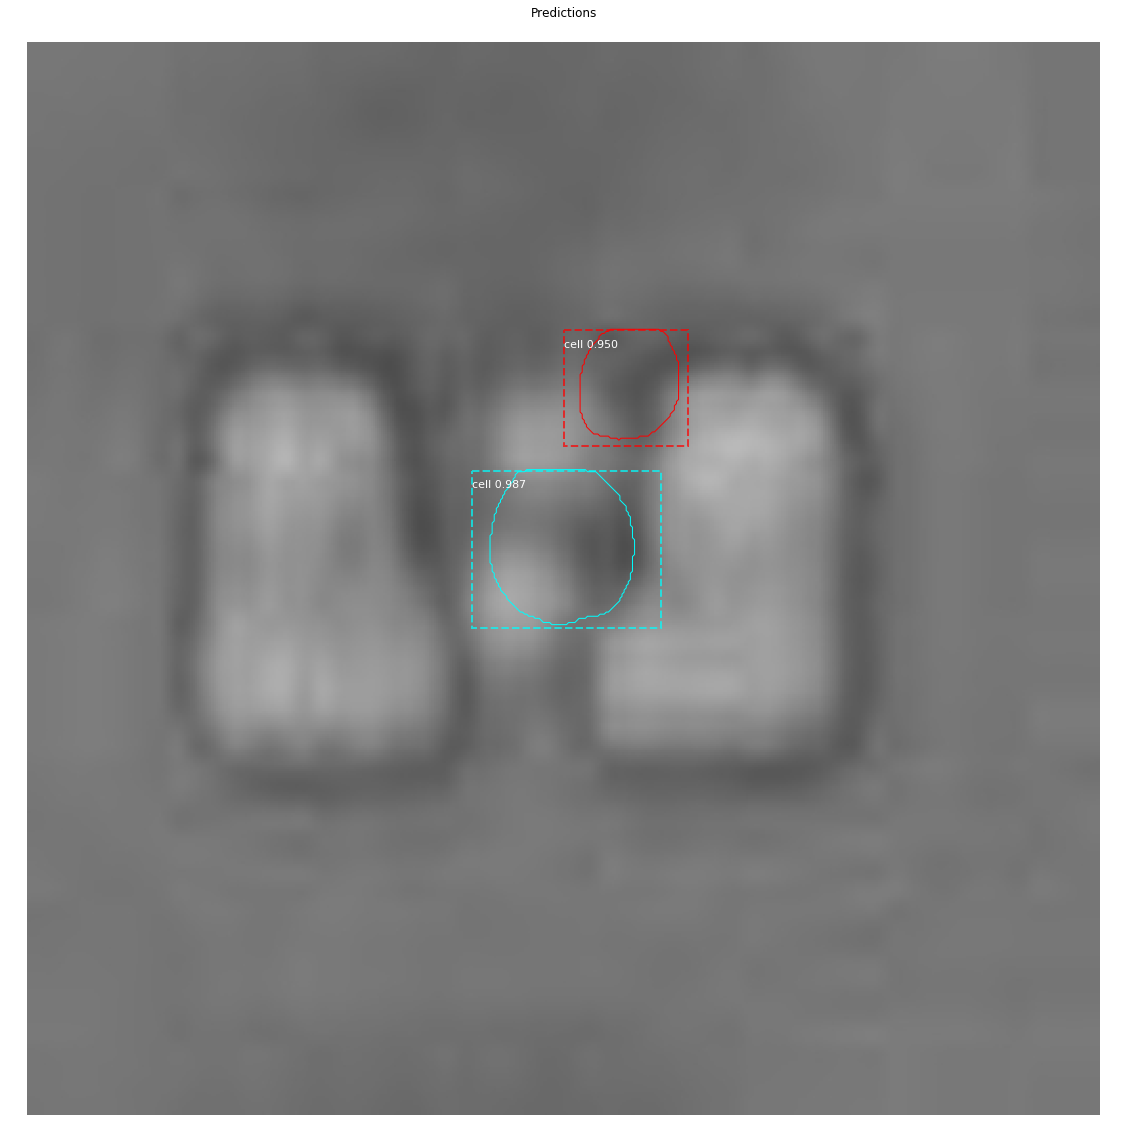

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  185.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   80.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



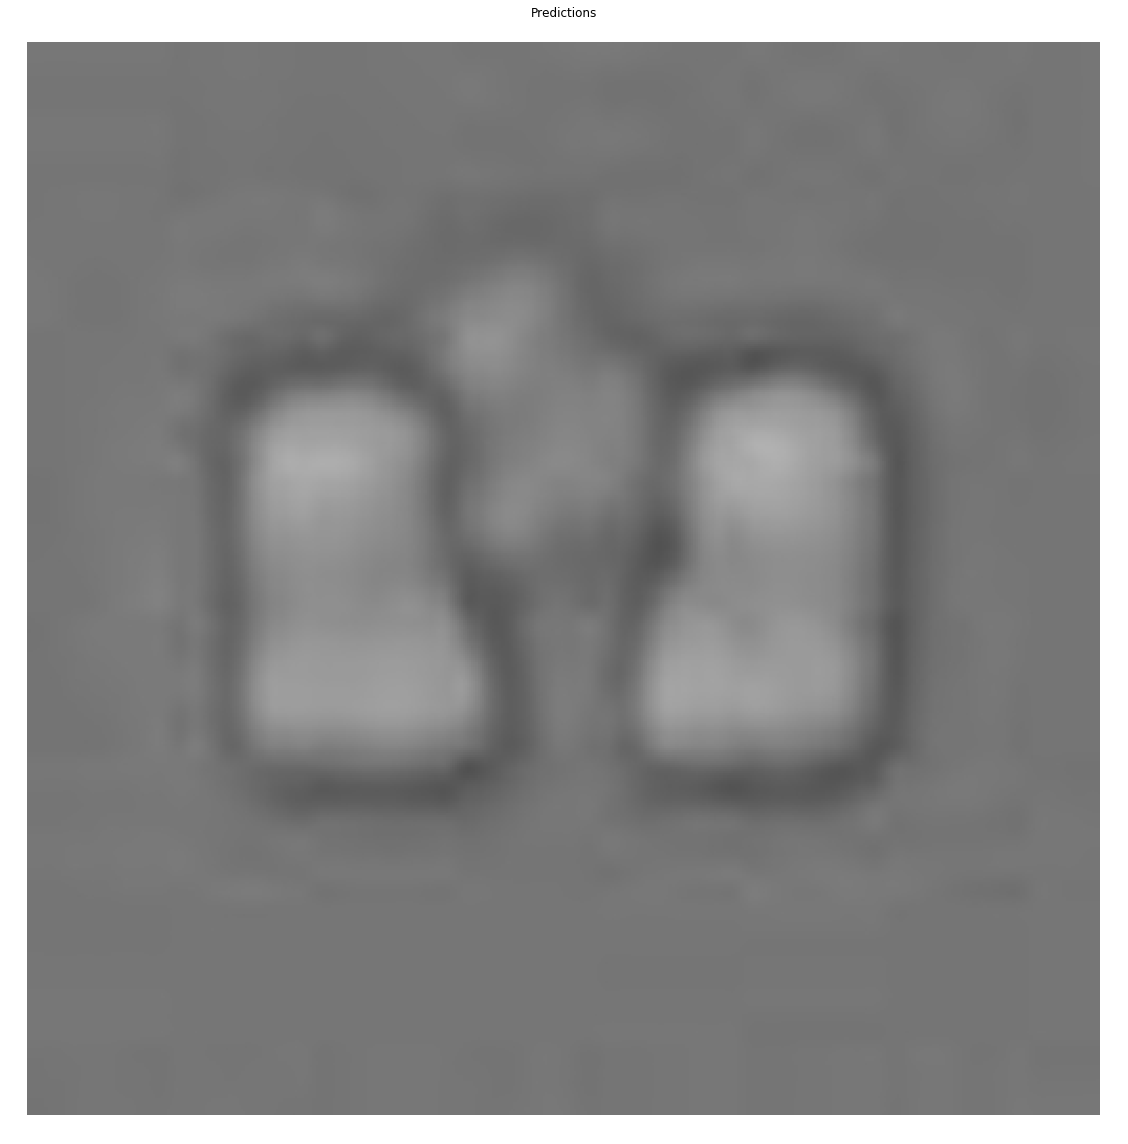

Processing 1 images
image                    shape: (512, 512, 3)         min:   81.00000  max:  177.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -42.70000  max:   72.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



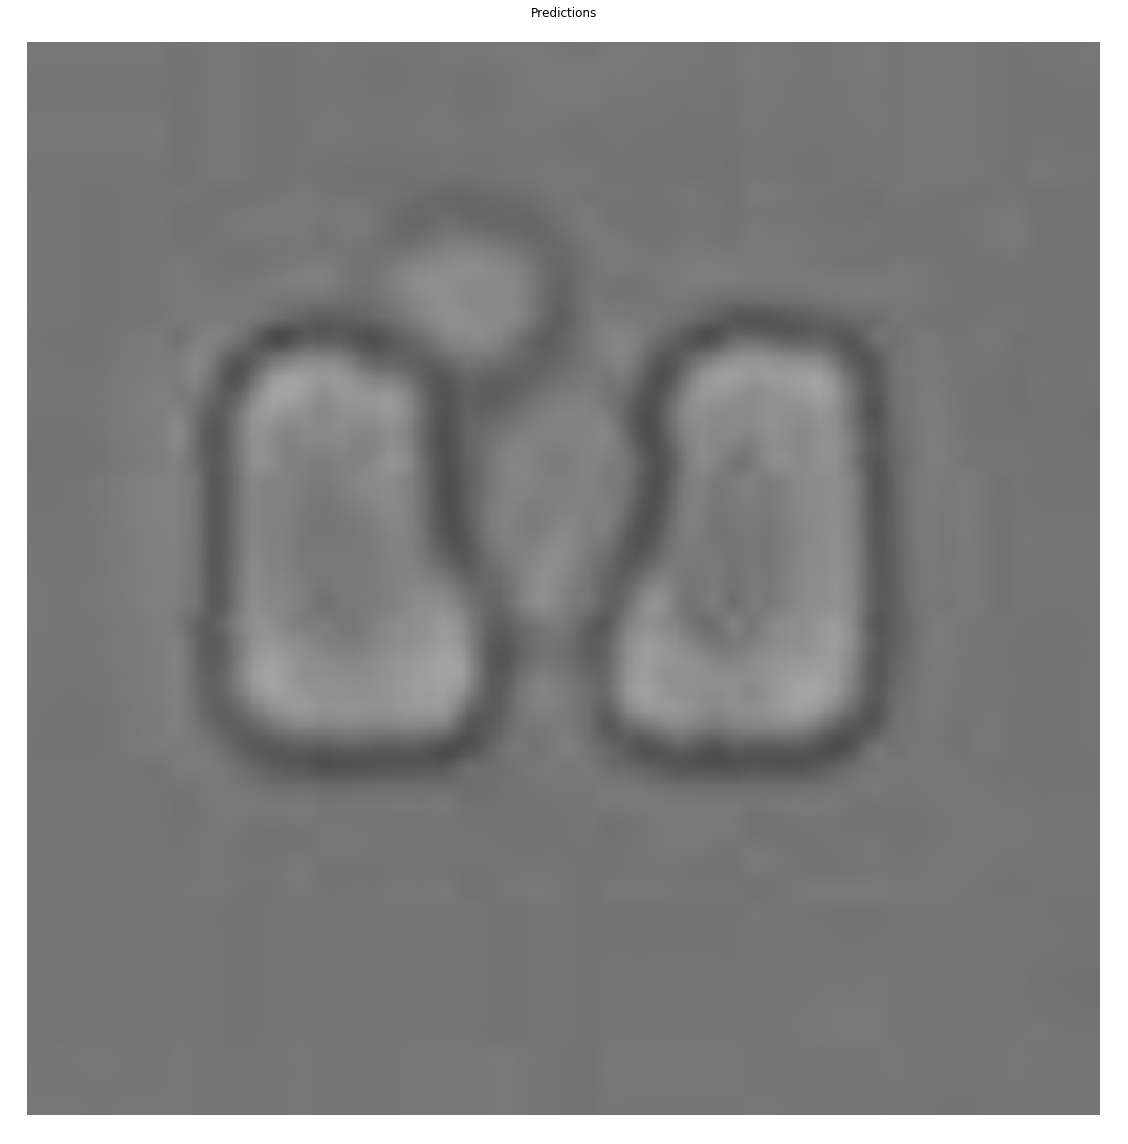

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  165.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   59.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


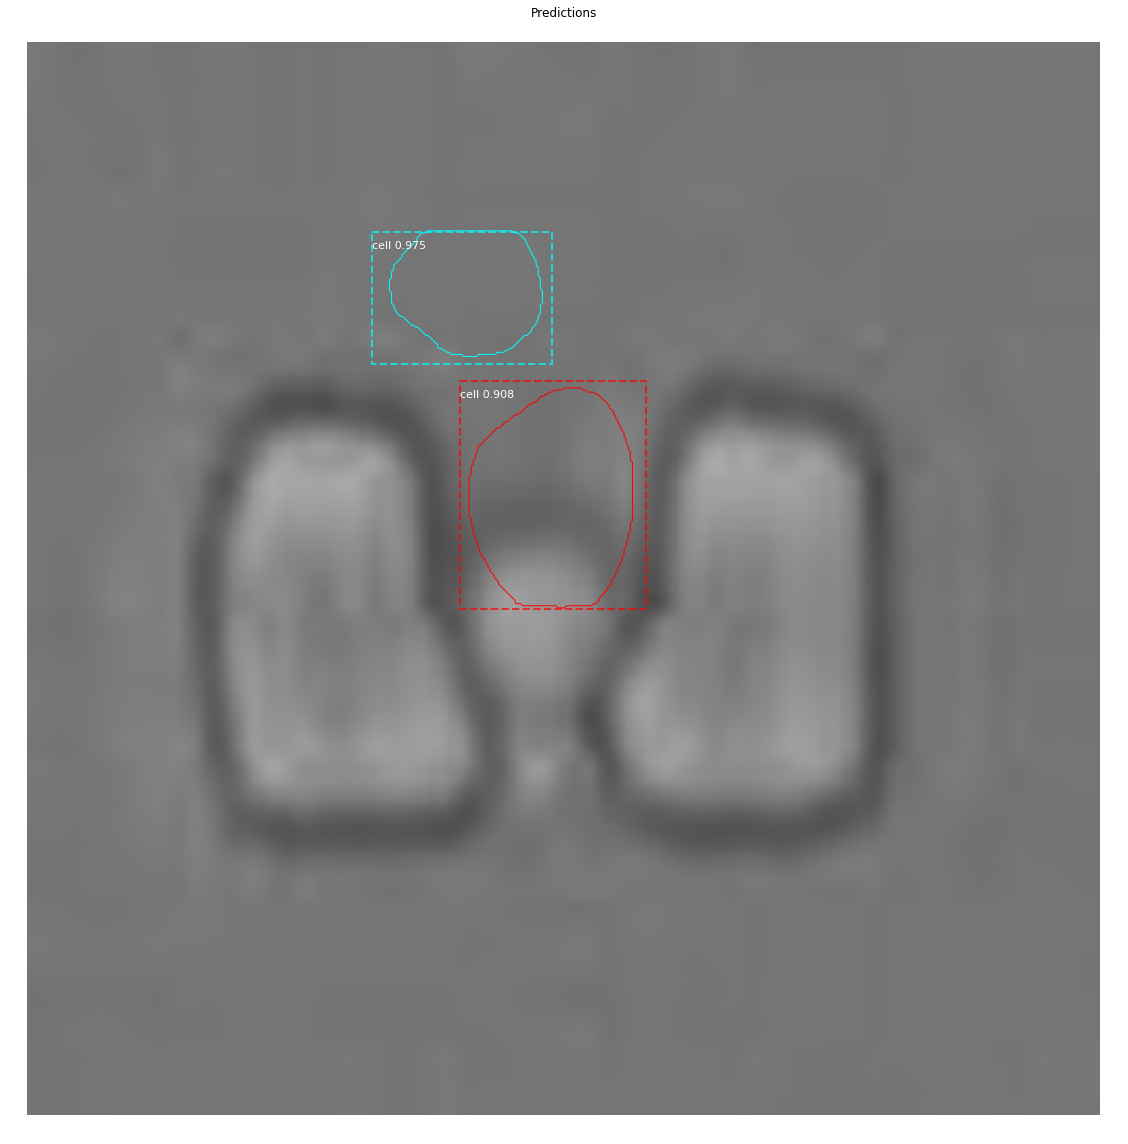

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  170.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


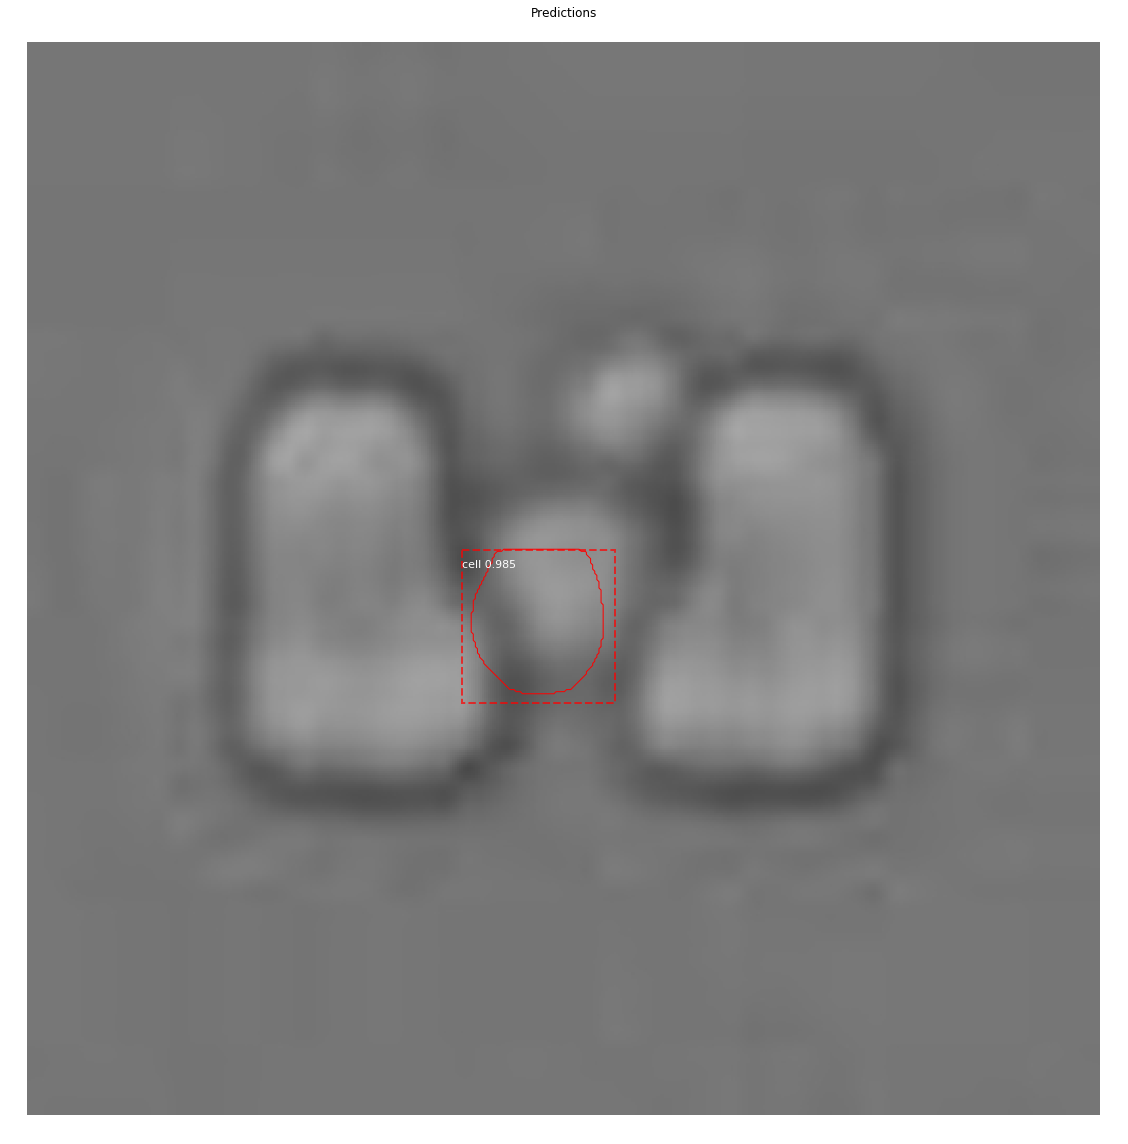

Processing 1 images
image                    shape: (512, 512, 3)         min:   73.00000  max:  166.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -50.70000  max:   60.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


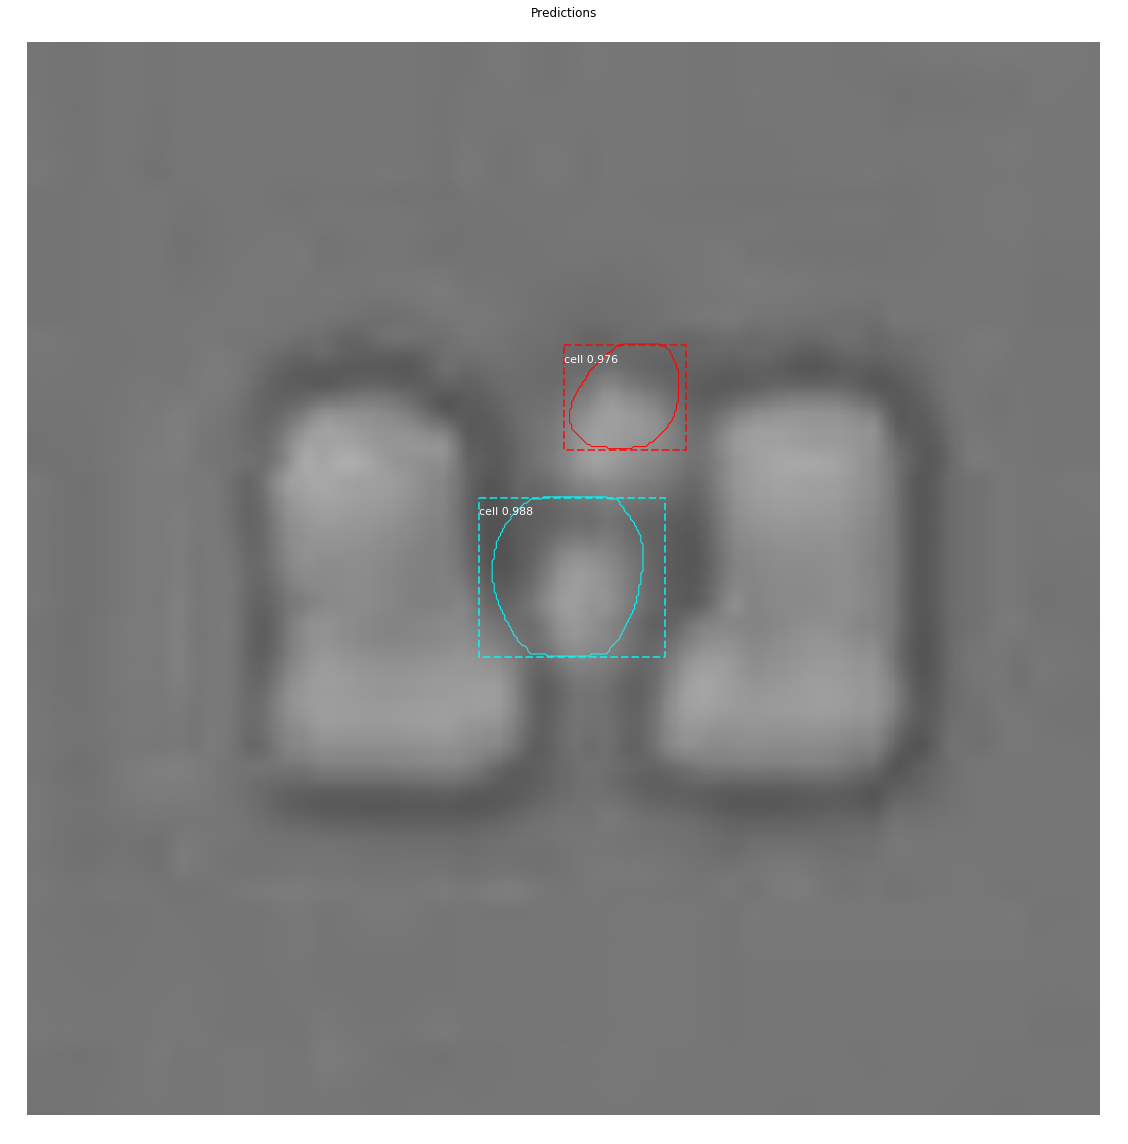

Processing 1 images
image                    shape: (512, 512, 3)         min:   82.00000  max:  173.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -42.70000  max:   67.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



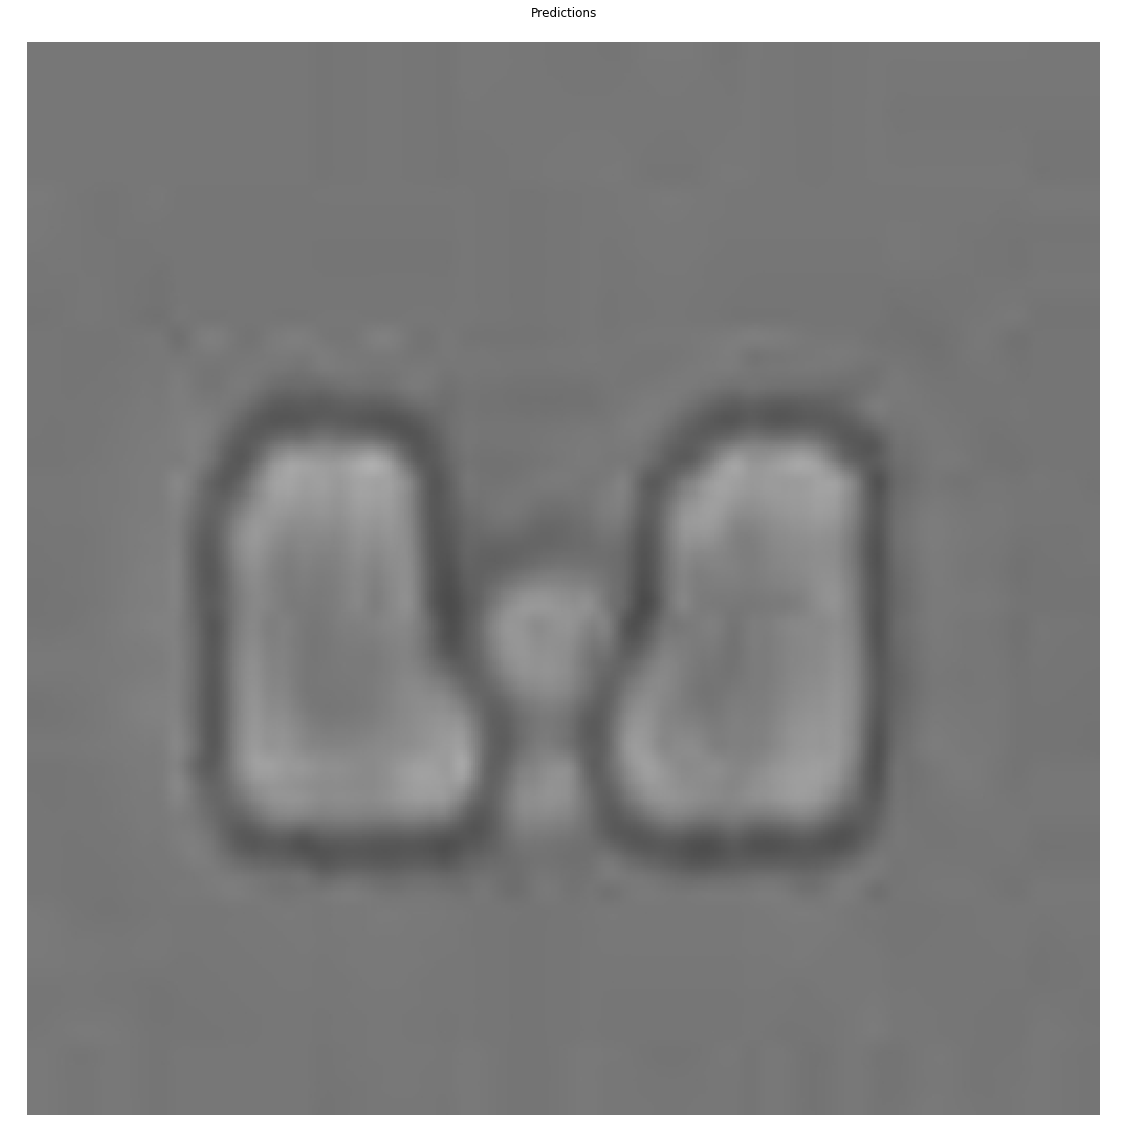

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  175.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   68.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



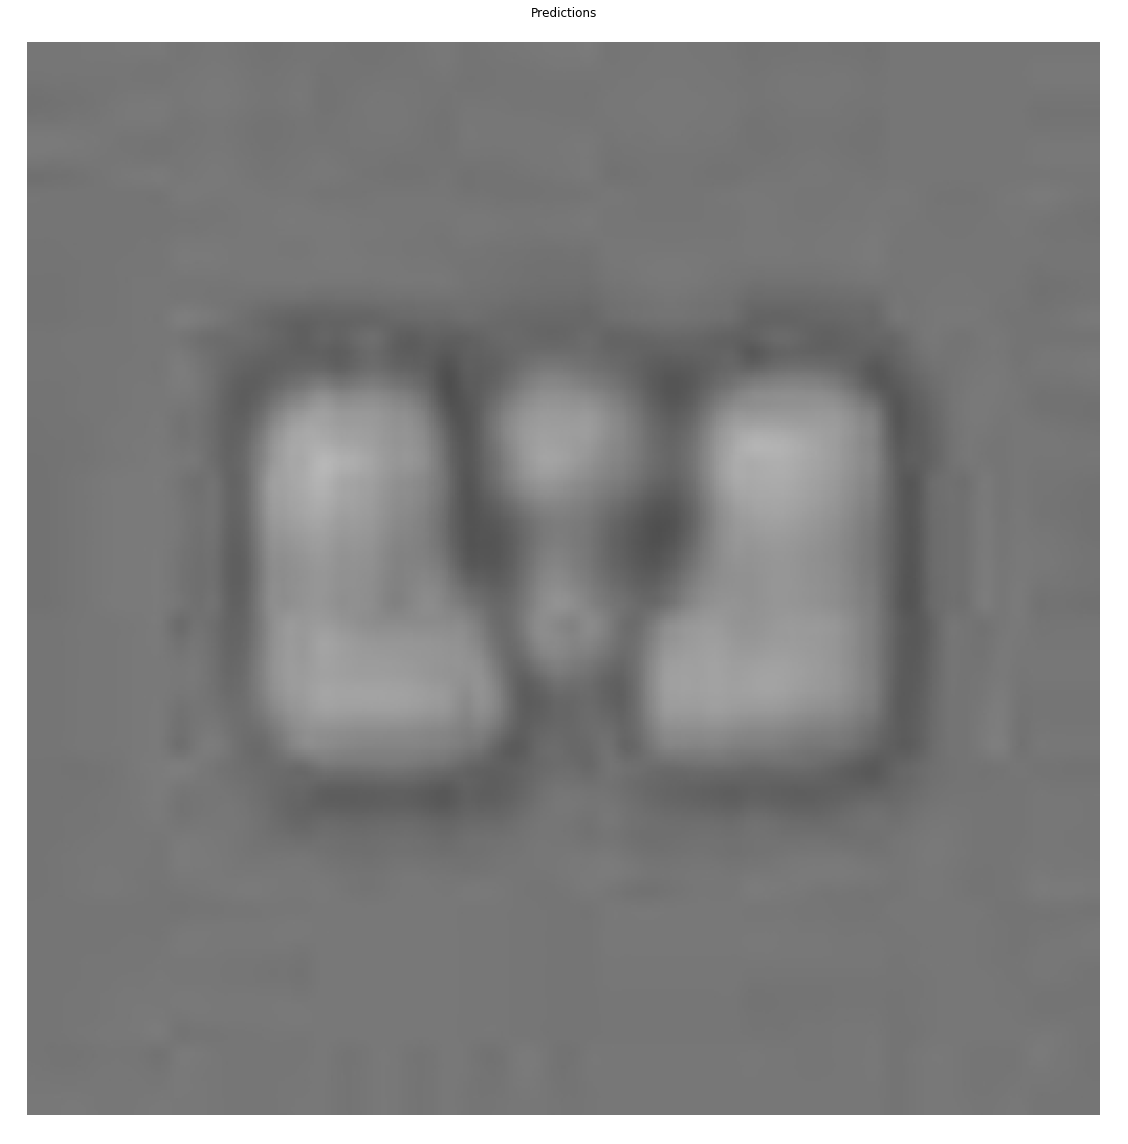

Processing 1 images
image                    shape: (512, 512, 3)         min:   78.00000  max:  183.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -45.70000  max:   77.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



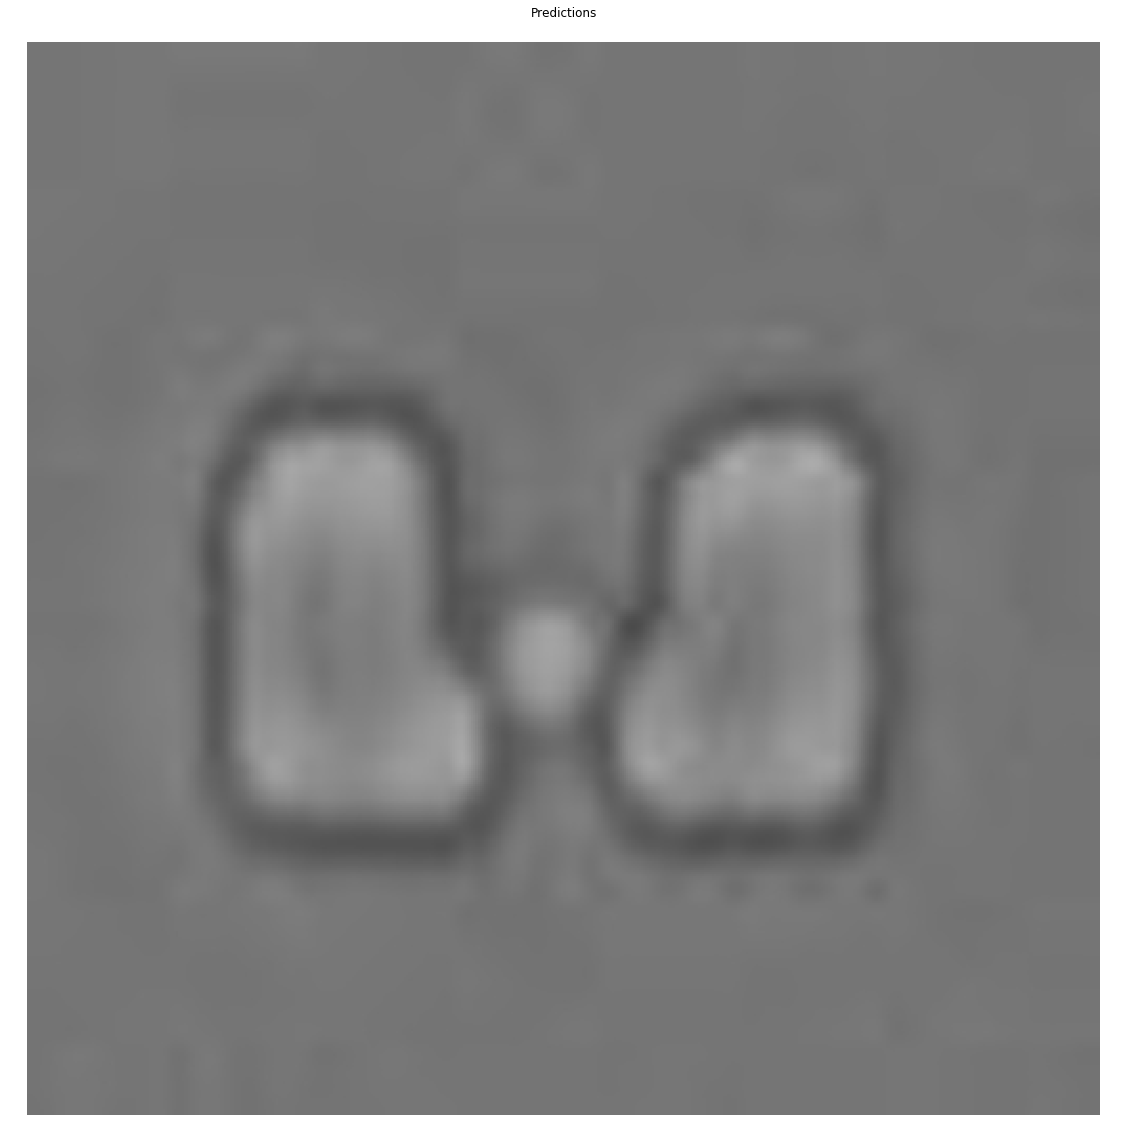

Processing 1 images
image                    shape: (512, 512, 3)         min:   75.00000  max:  171.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -48.70000  max:   65.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


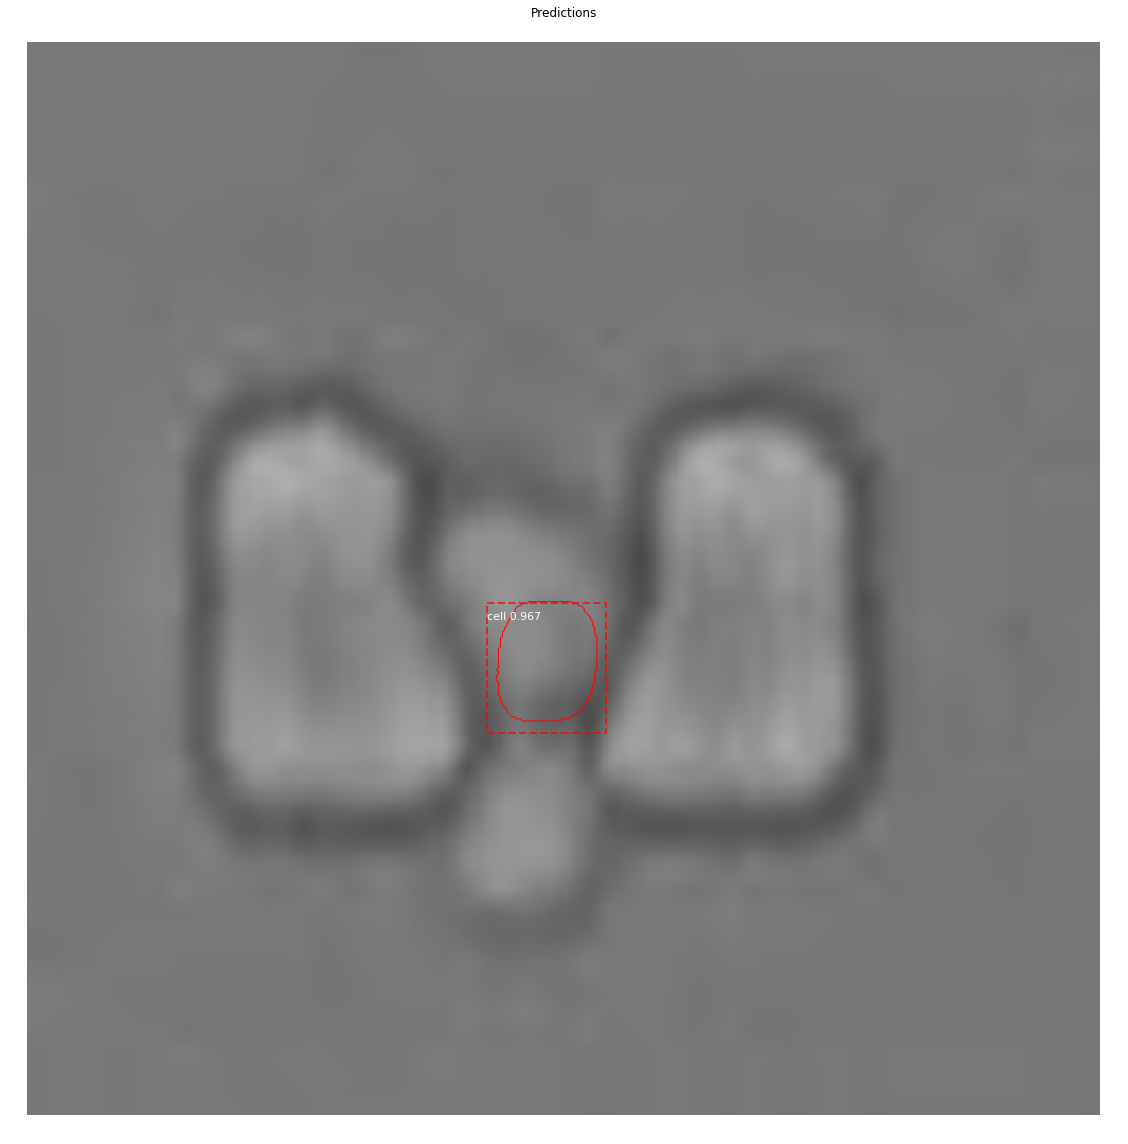

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   68.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


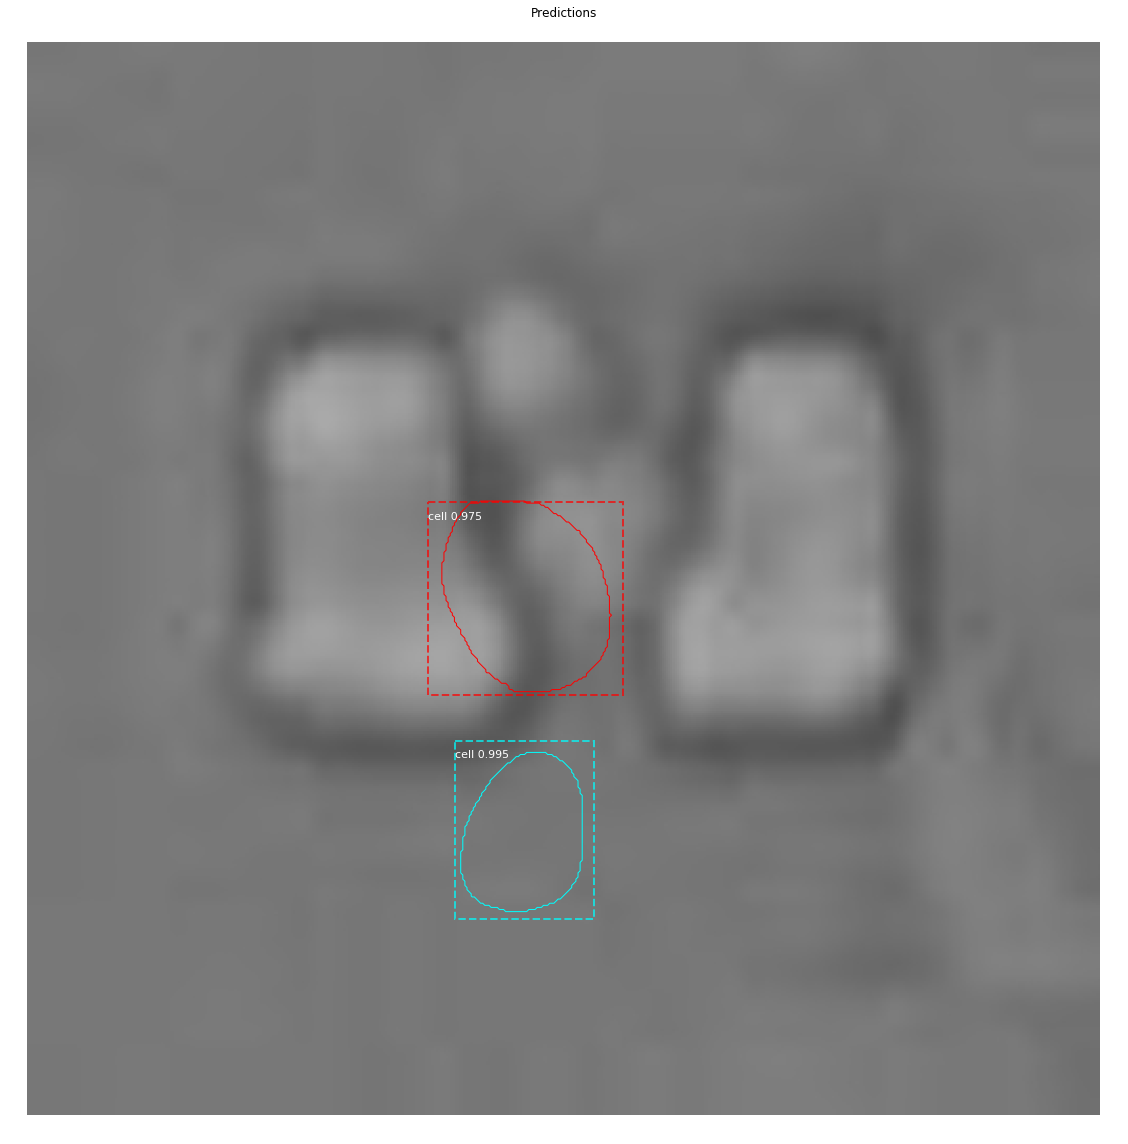

Processing 1 images
image                    shape: (512, 512, 3)         min:   78.00000  max:  169.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -45.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


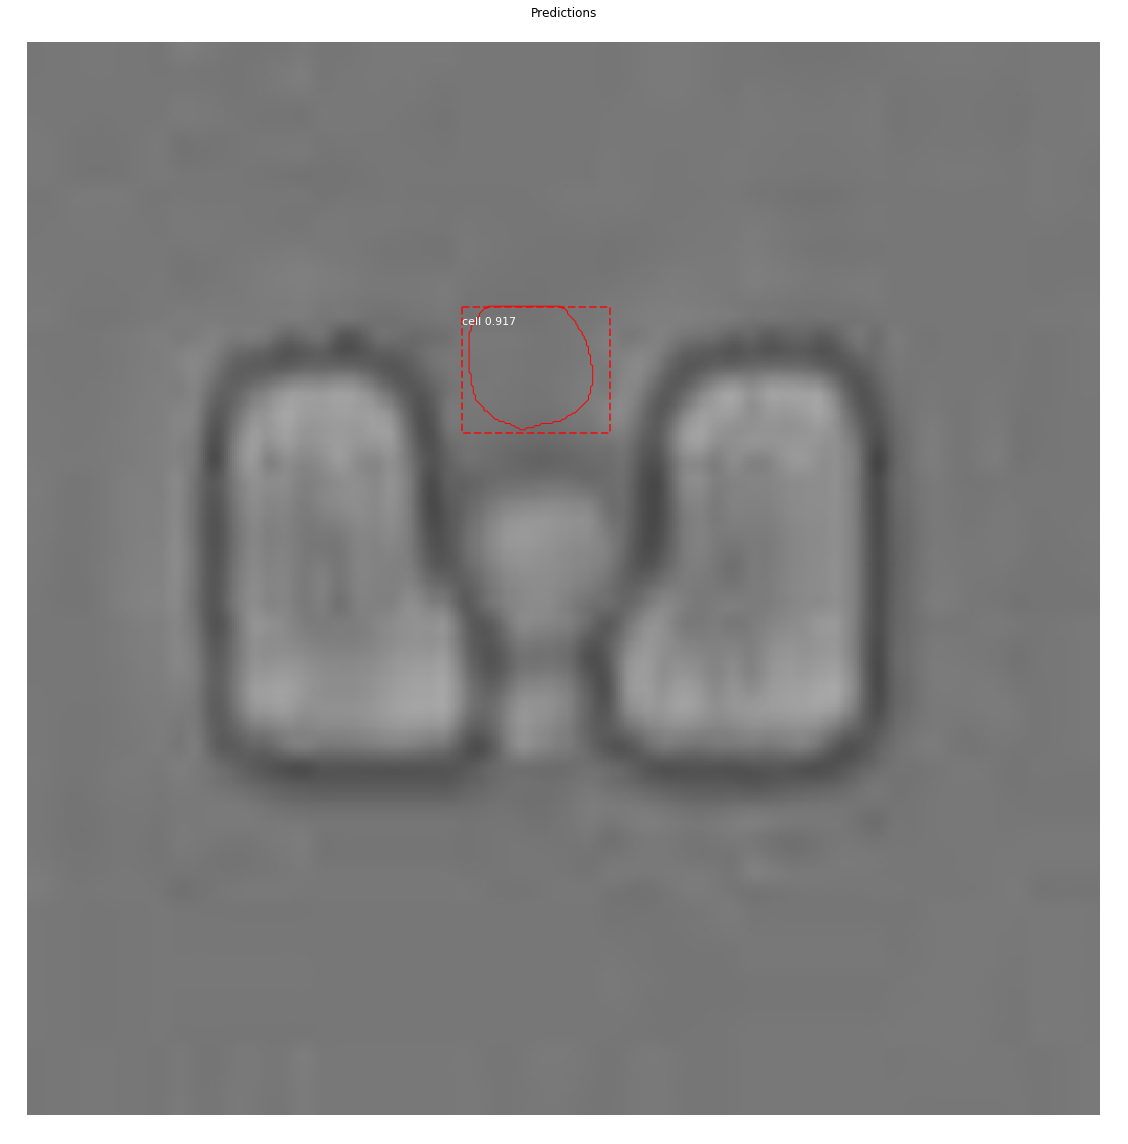

Processing 1 images
image                    shape: (512, 512, 3)         min:   69.00000  max:  168.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -54.70000  max:   61.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


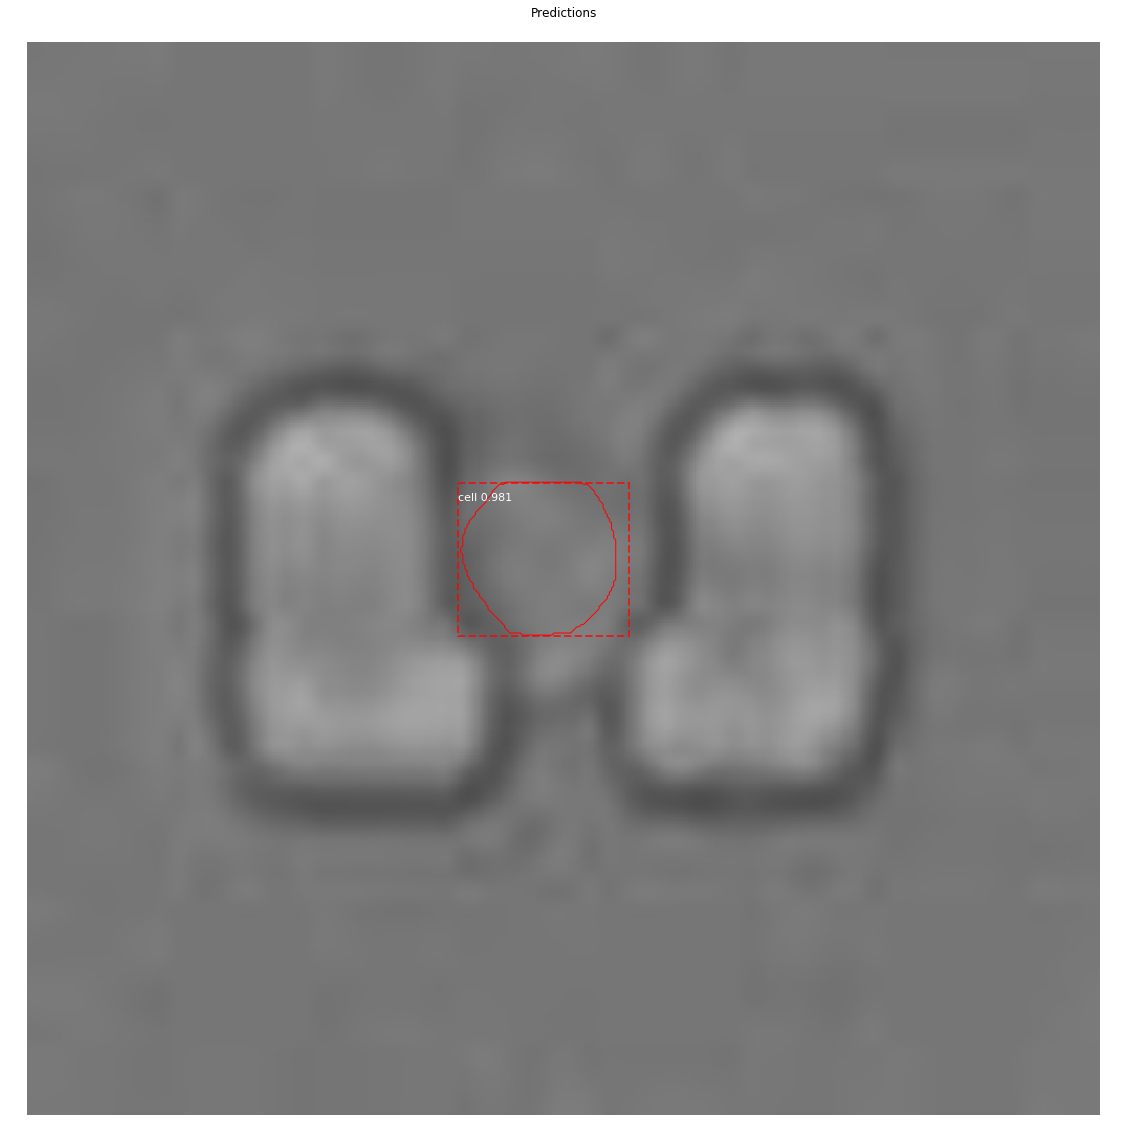

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  175.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   69.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



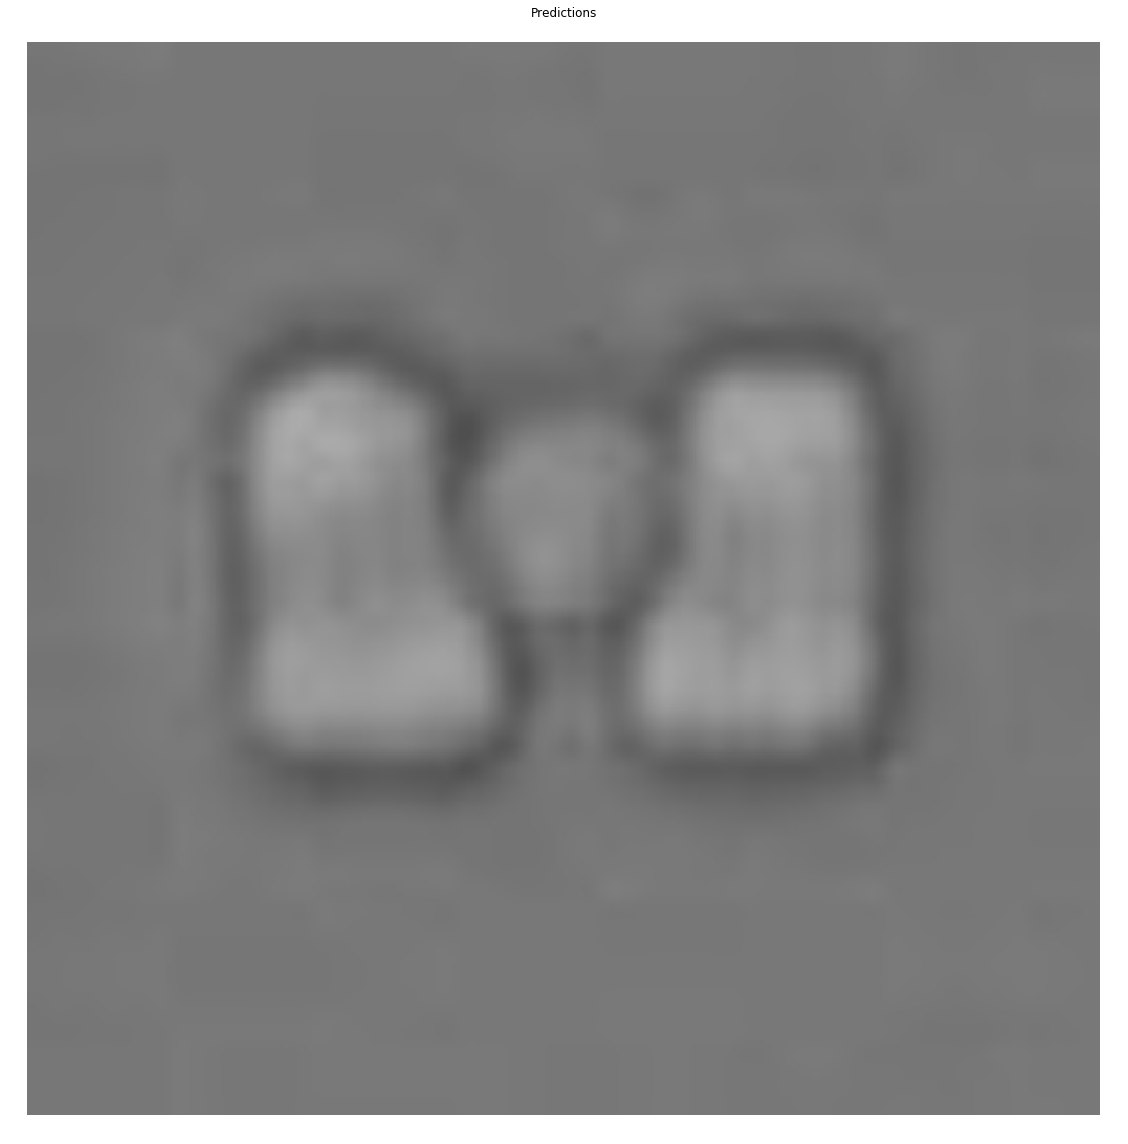

Processing 1 images
image                    shape: (512, 512, 3)         min:   79.00000  max:  171.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -44.70000  max:   65.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


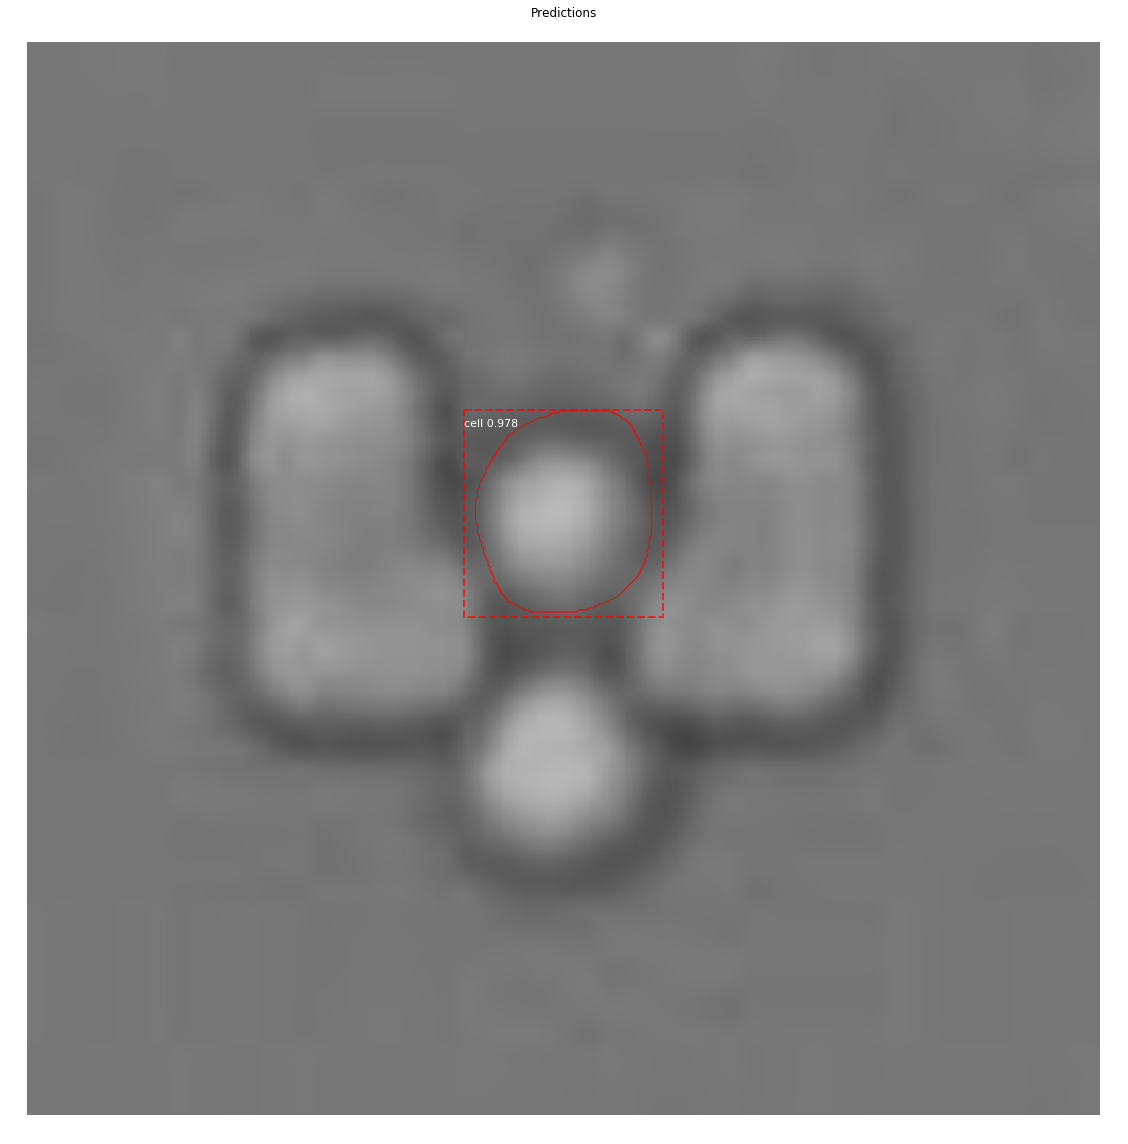

Processing 1 images
image                    shape: (512, 512, 3)         min:   67.00000  max:  186.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -56.70000  max:   80.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


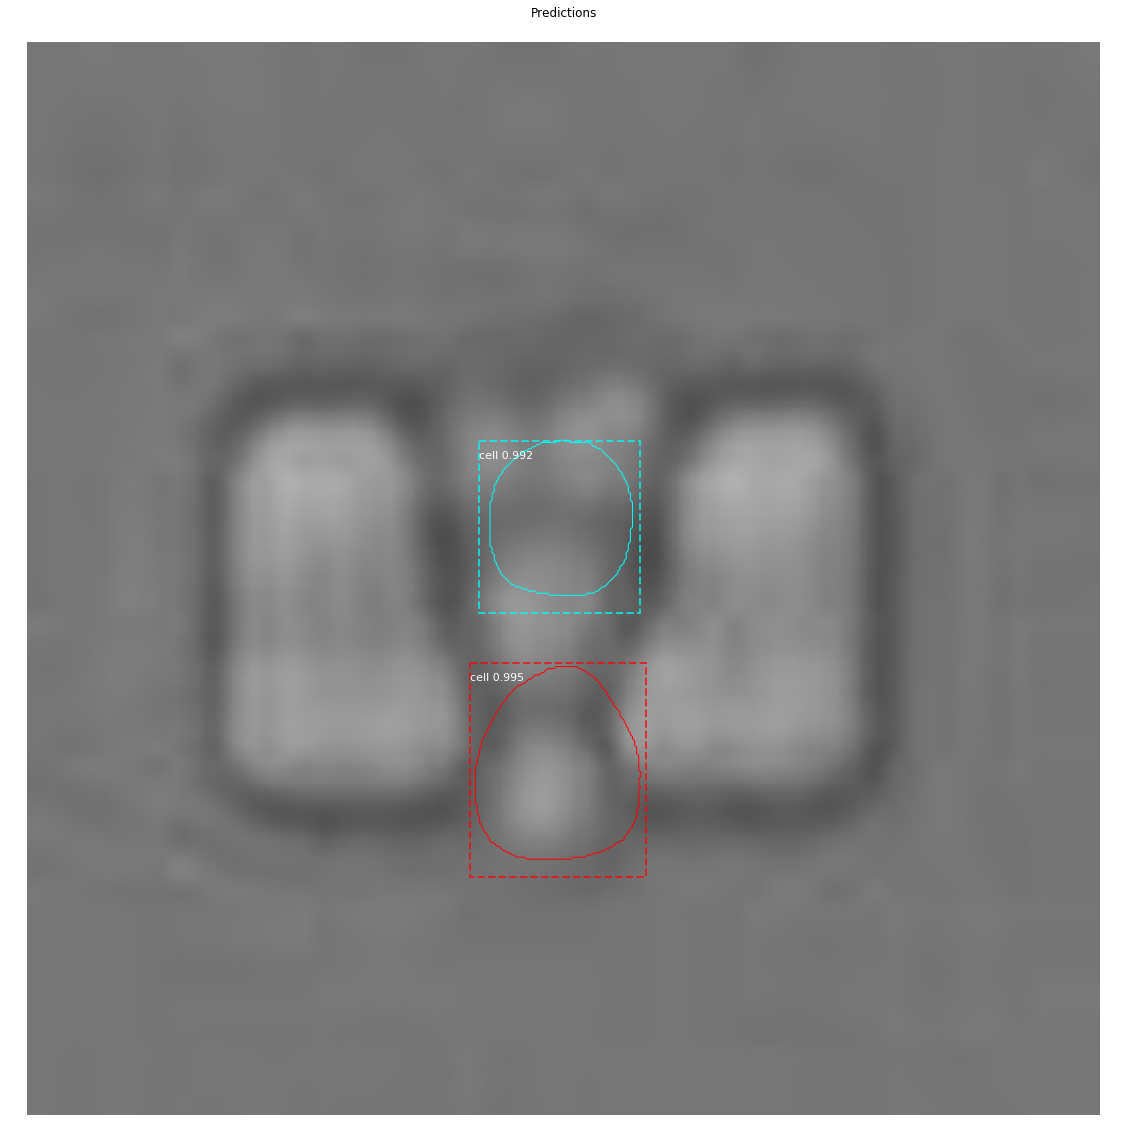

Processing 1 images
image                    shape: (512, 512, 3)         min:   75.00000  max:  176.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -48.70000  max:   70.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


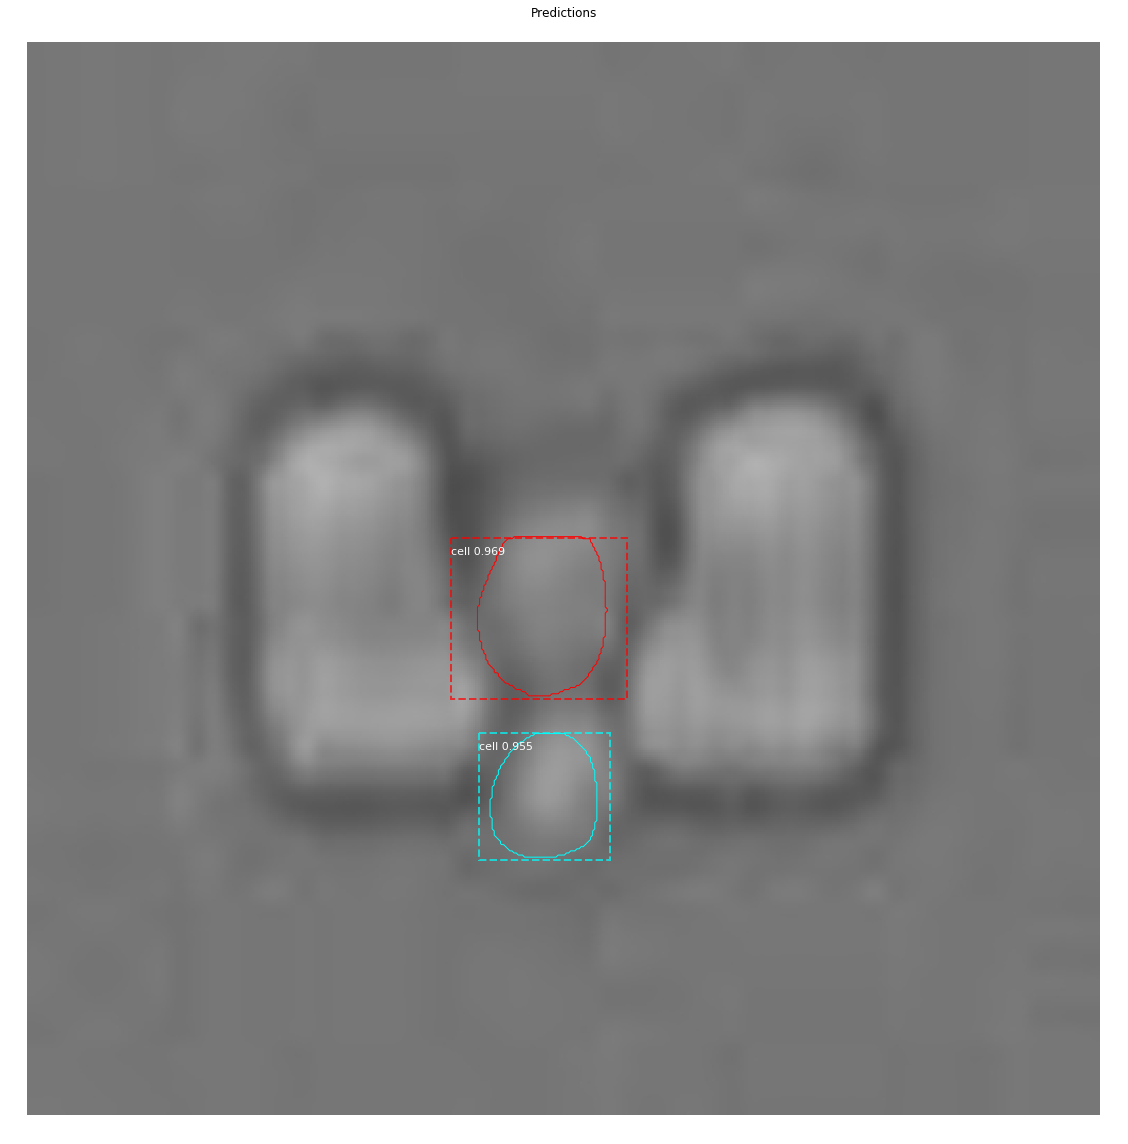

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  177.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   71.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


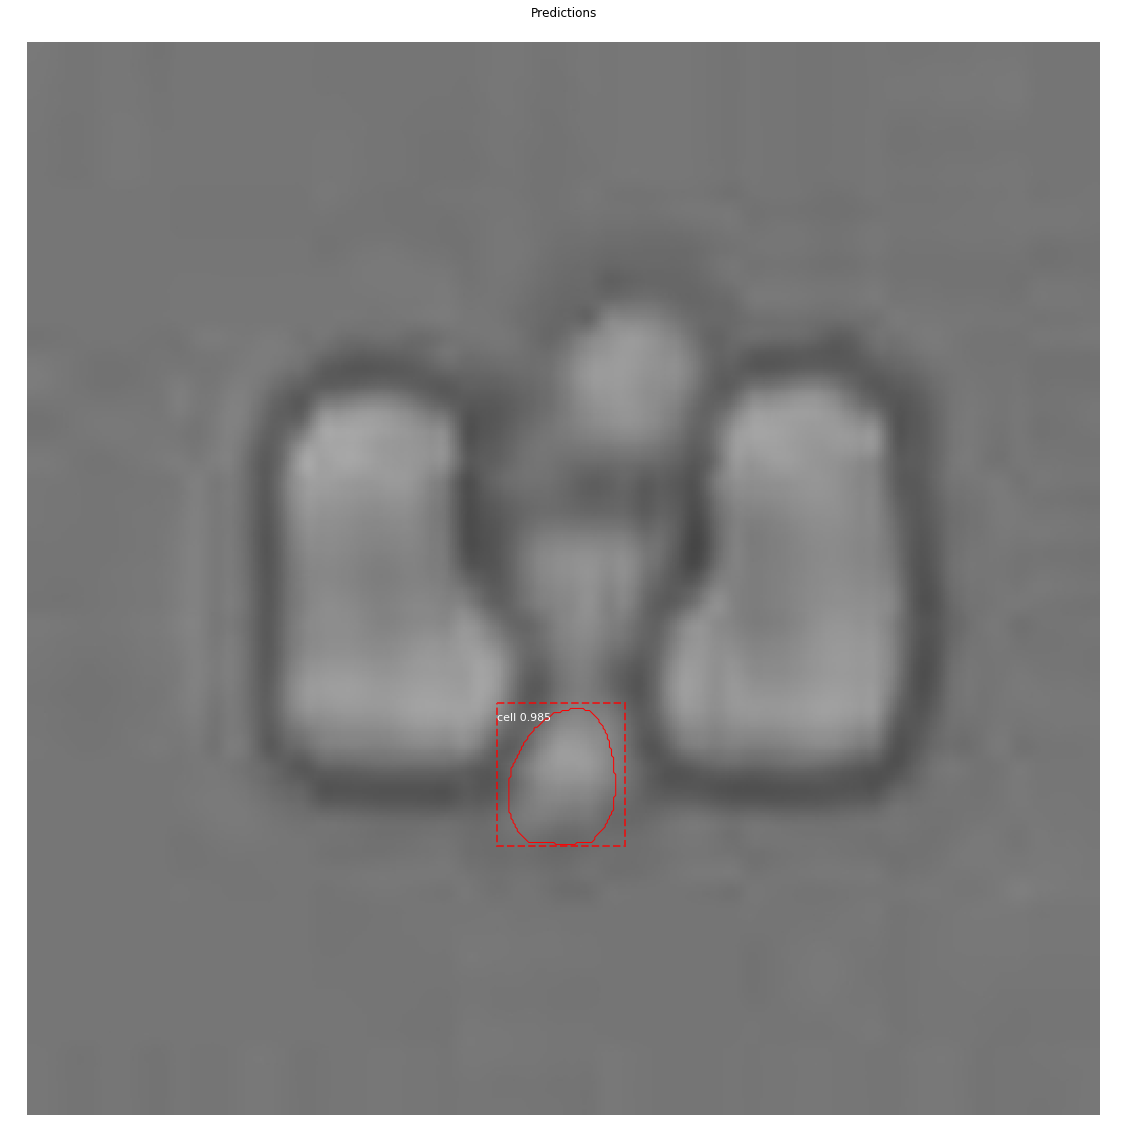

Processing 1 images
image                    shape: (512, 512, 3)         min:   69.00000  max:  168.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -54.70000  max:   62.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


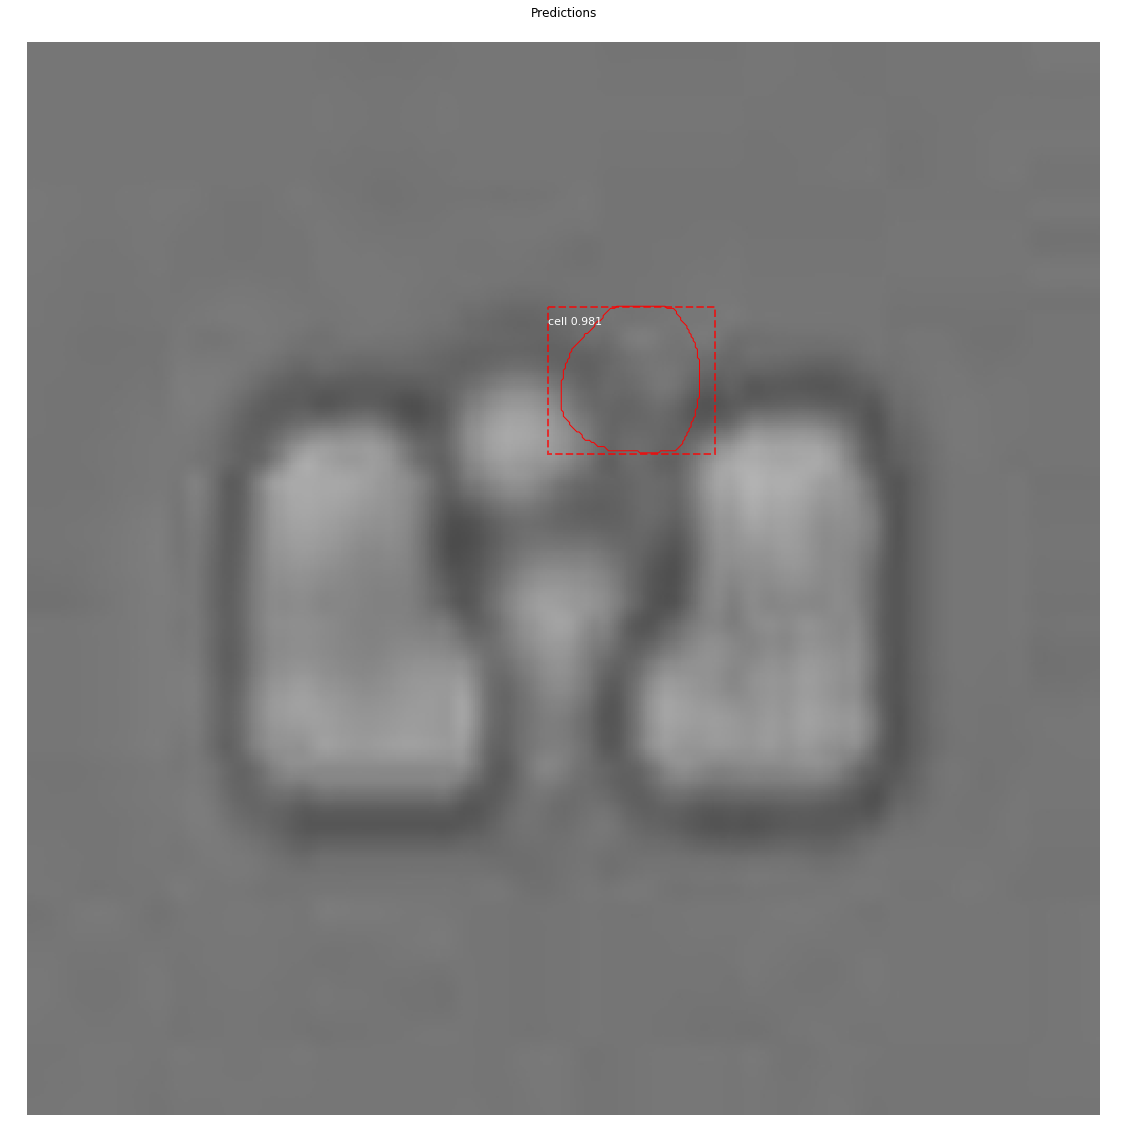

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  178.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   72.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


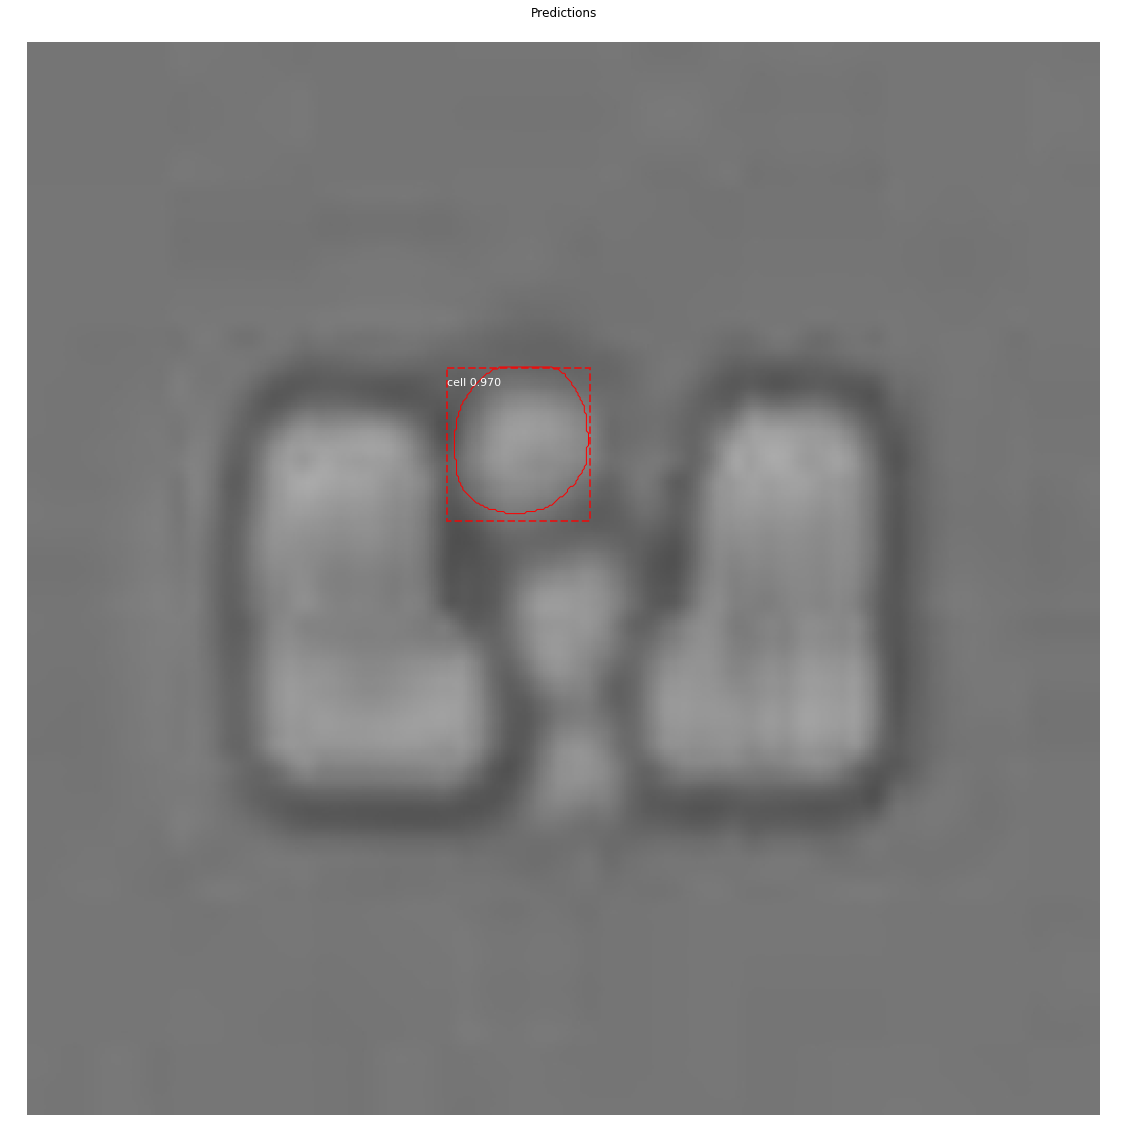

Processing 1 images
image                    shape: (512, 512, 3)         min:   79.00000  max:  171.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -44.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


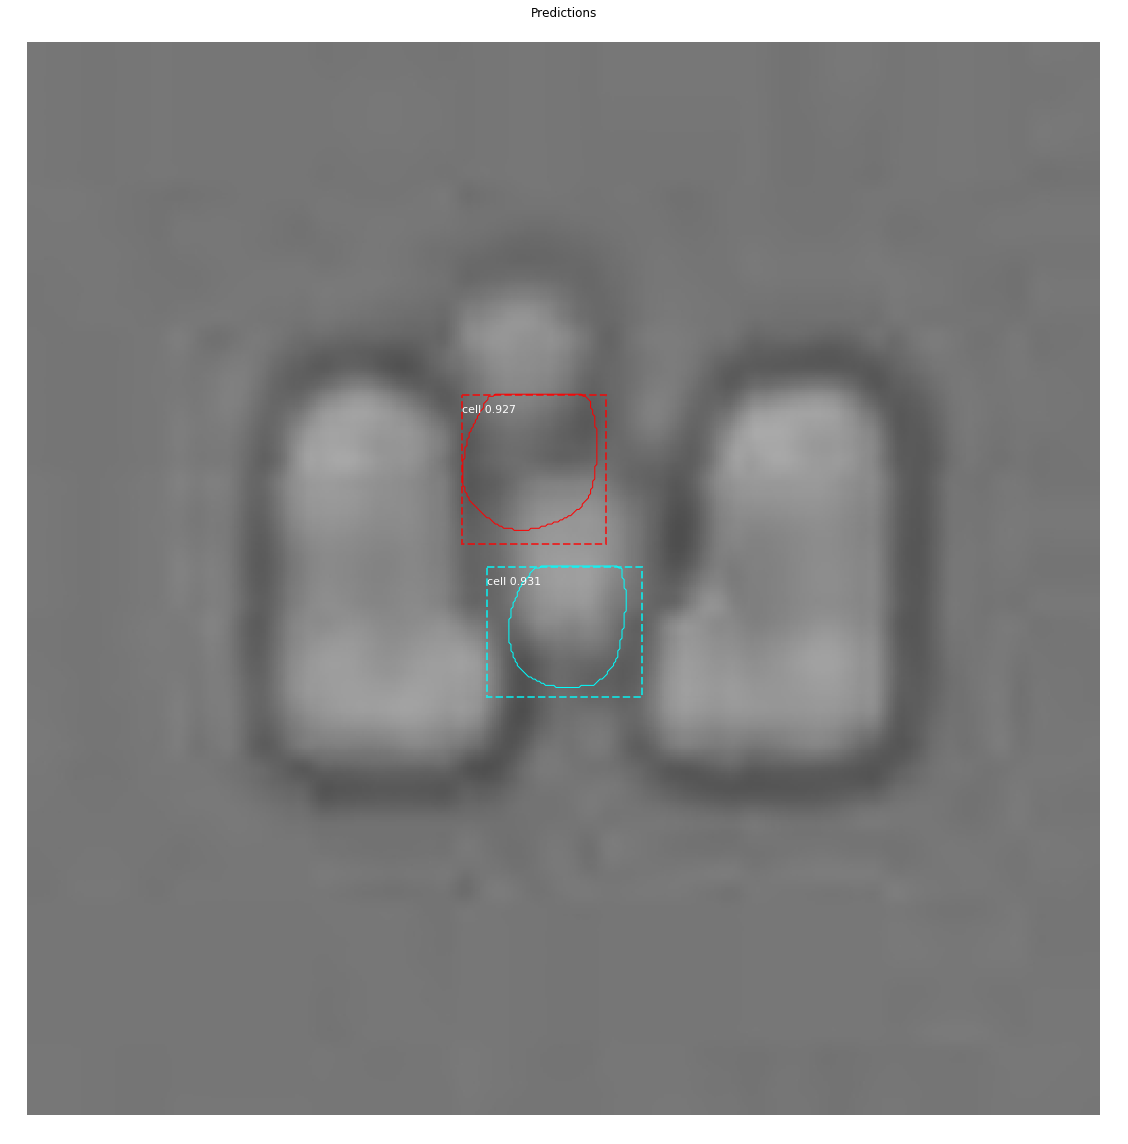

Processing 1 images
image                    shape: (512, 512, 3)         min:   78.00000  max:  169.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -45.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


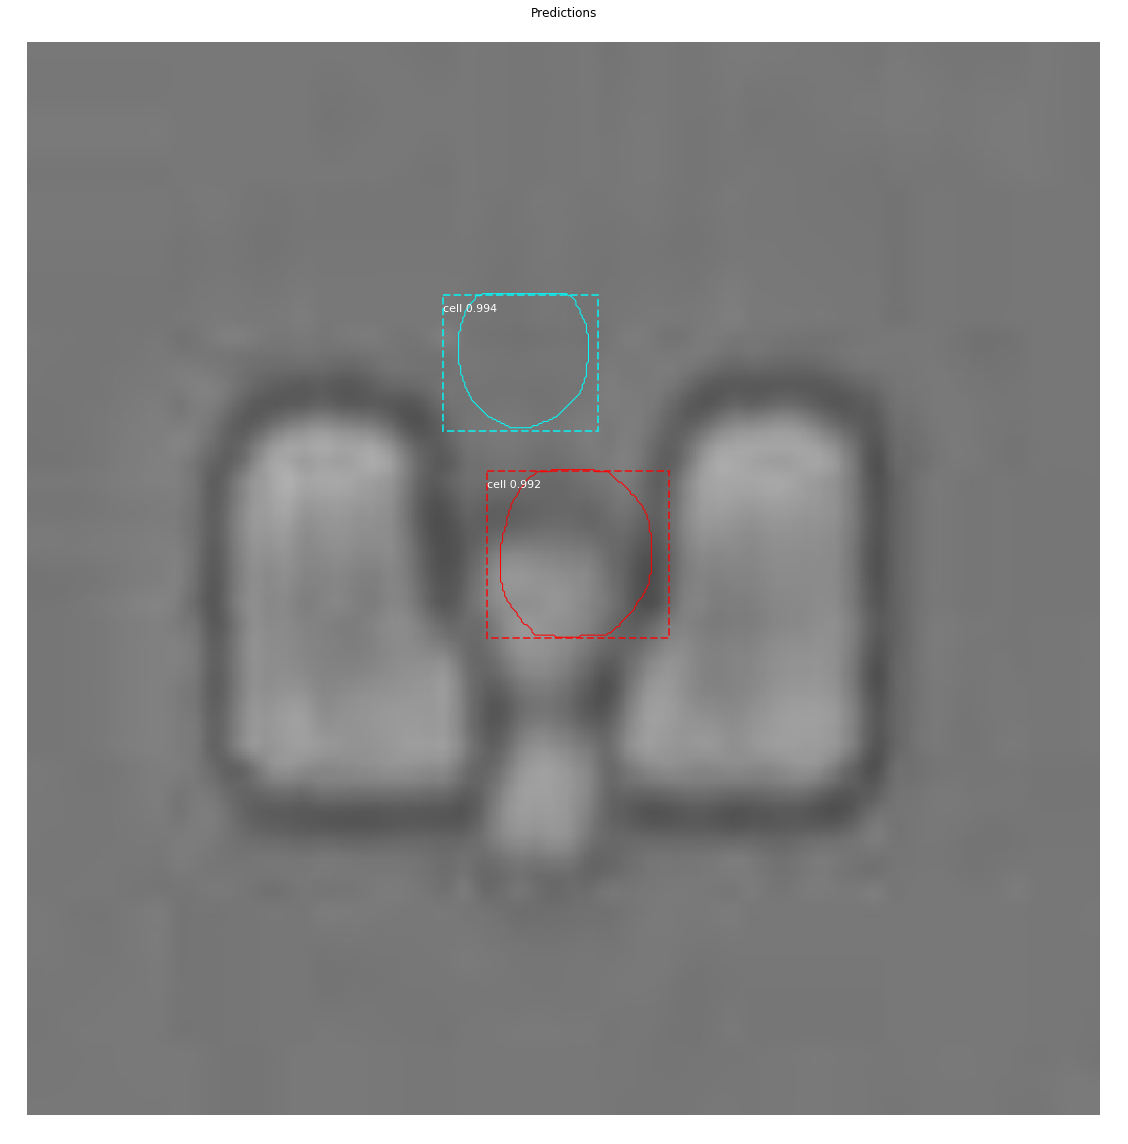

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   68.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


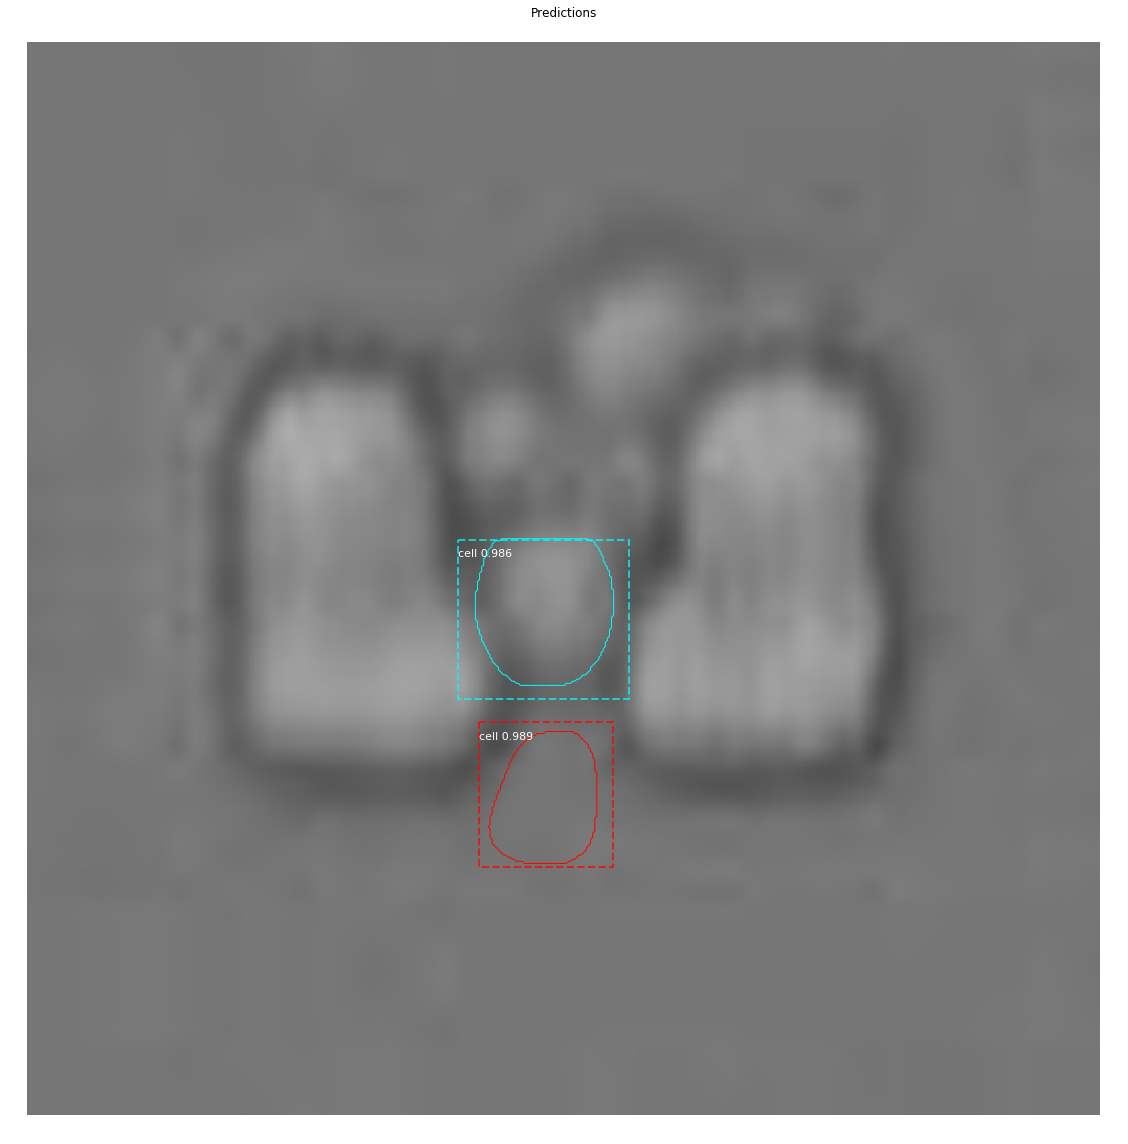

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  172.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   65.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


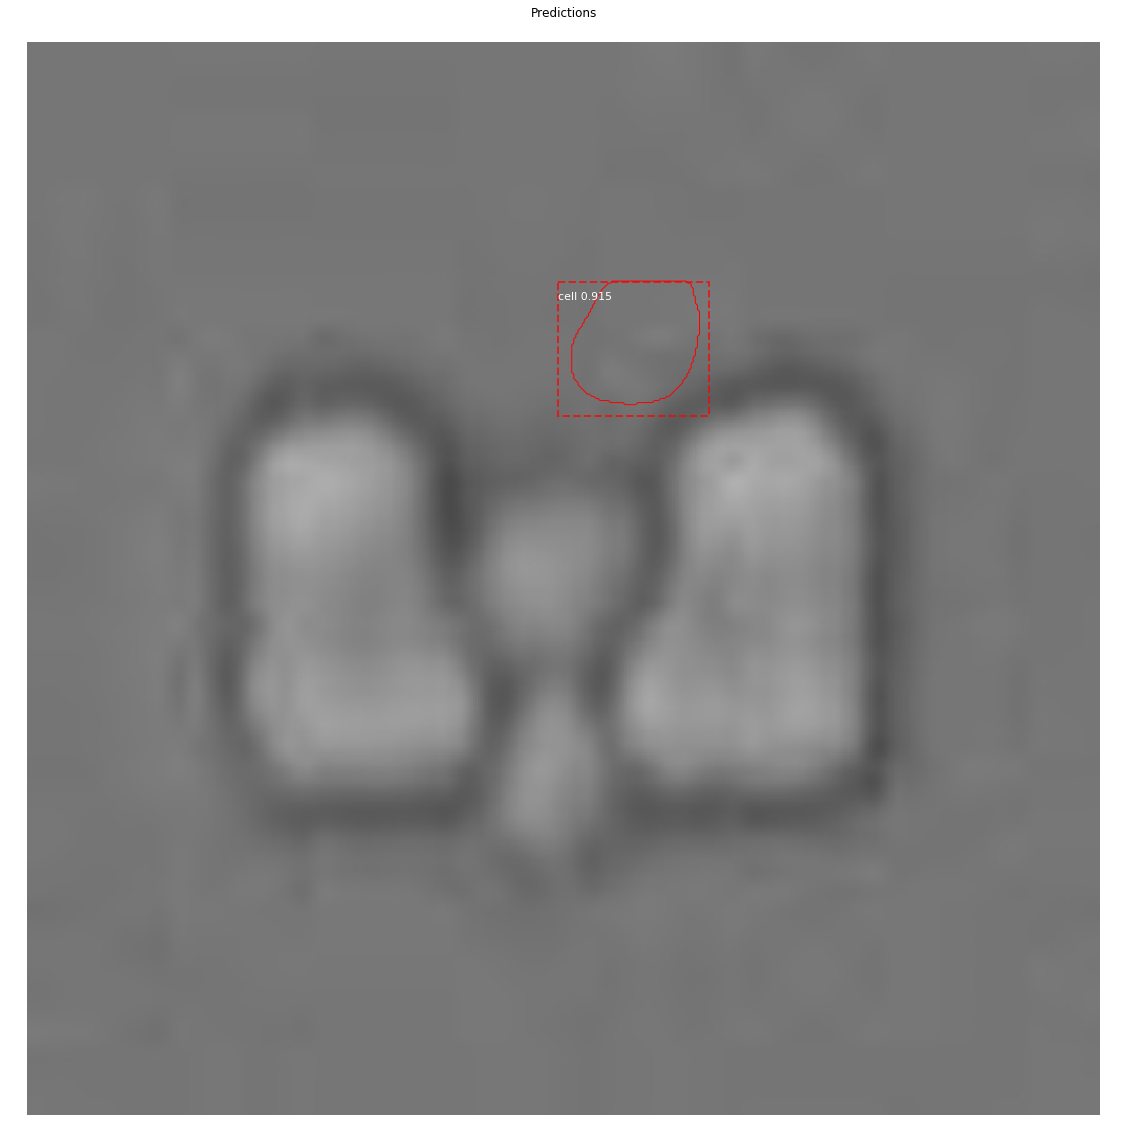

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  176.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   70.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


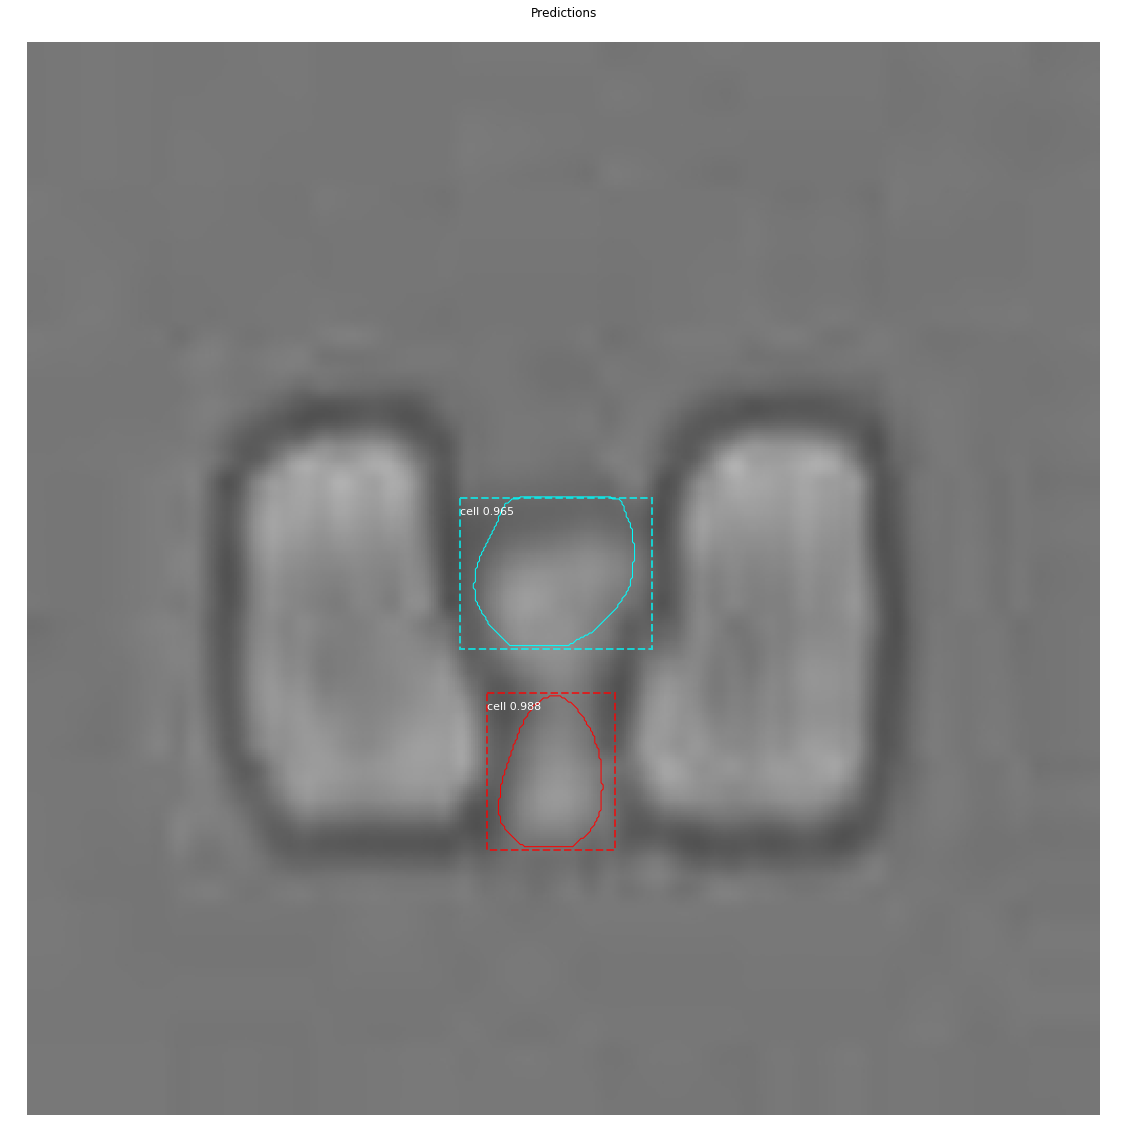

Processing 1 images
image                    shape: (512, 512, 3)         min:   78.00000  max:  177.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -45.70000  max:   70.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32

*** No instances to display *** 



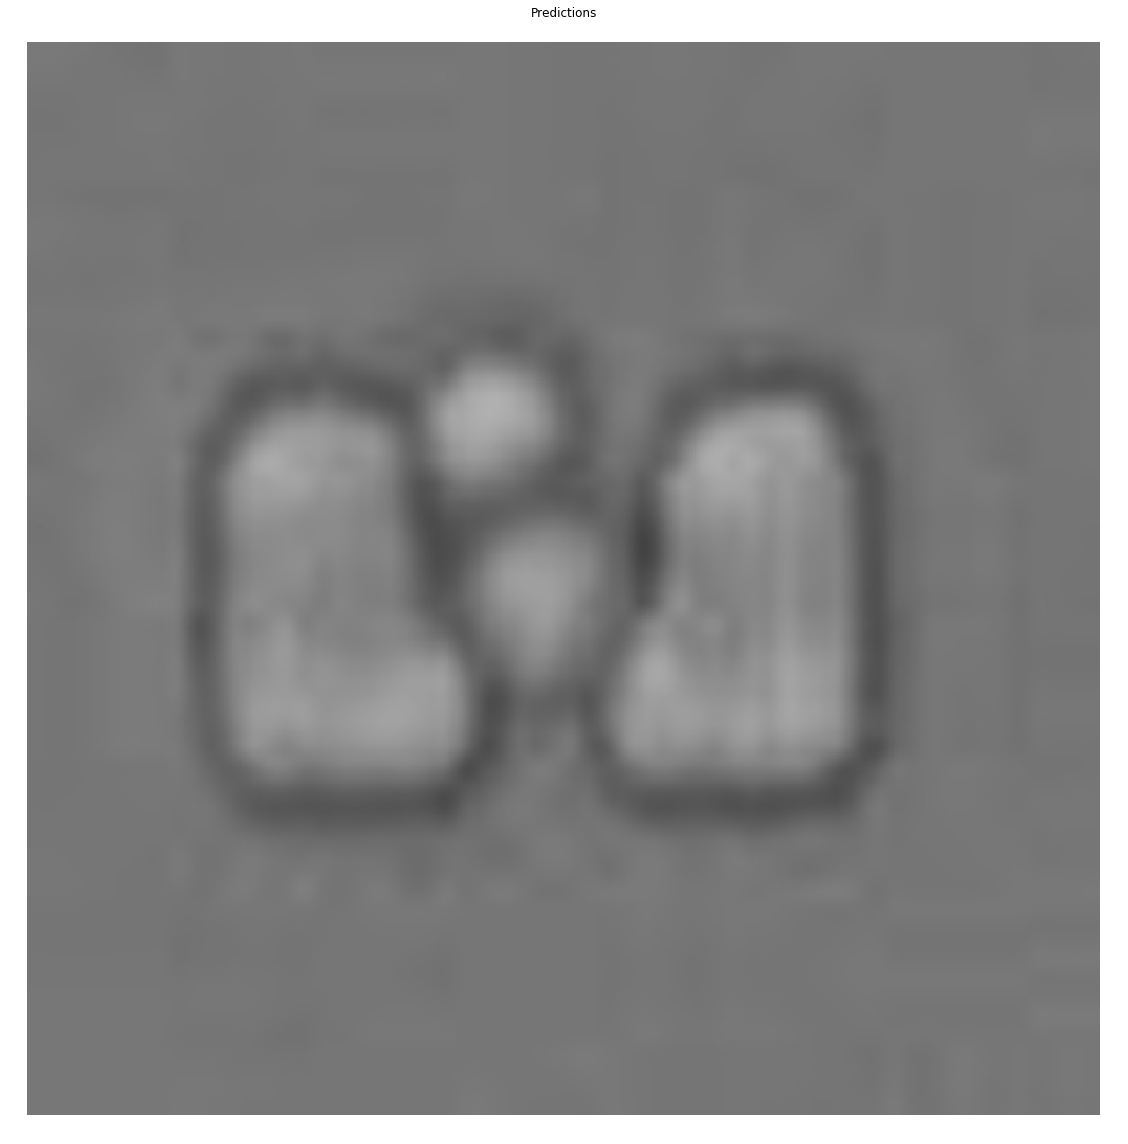

Processing 1 images
image                    shape: (512, 512, 3)         min:   67.00000  max:  177.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -56.70000  max:   71.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


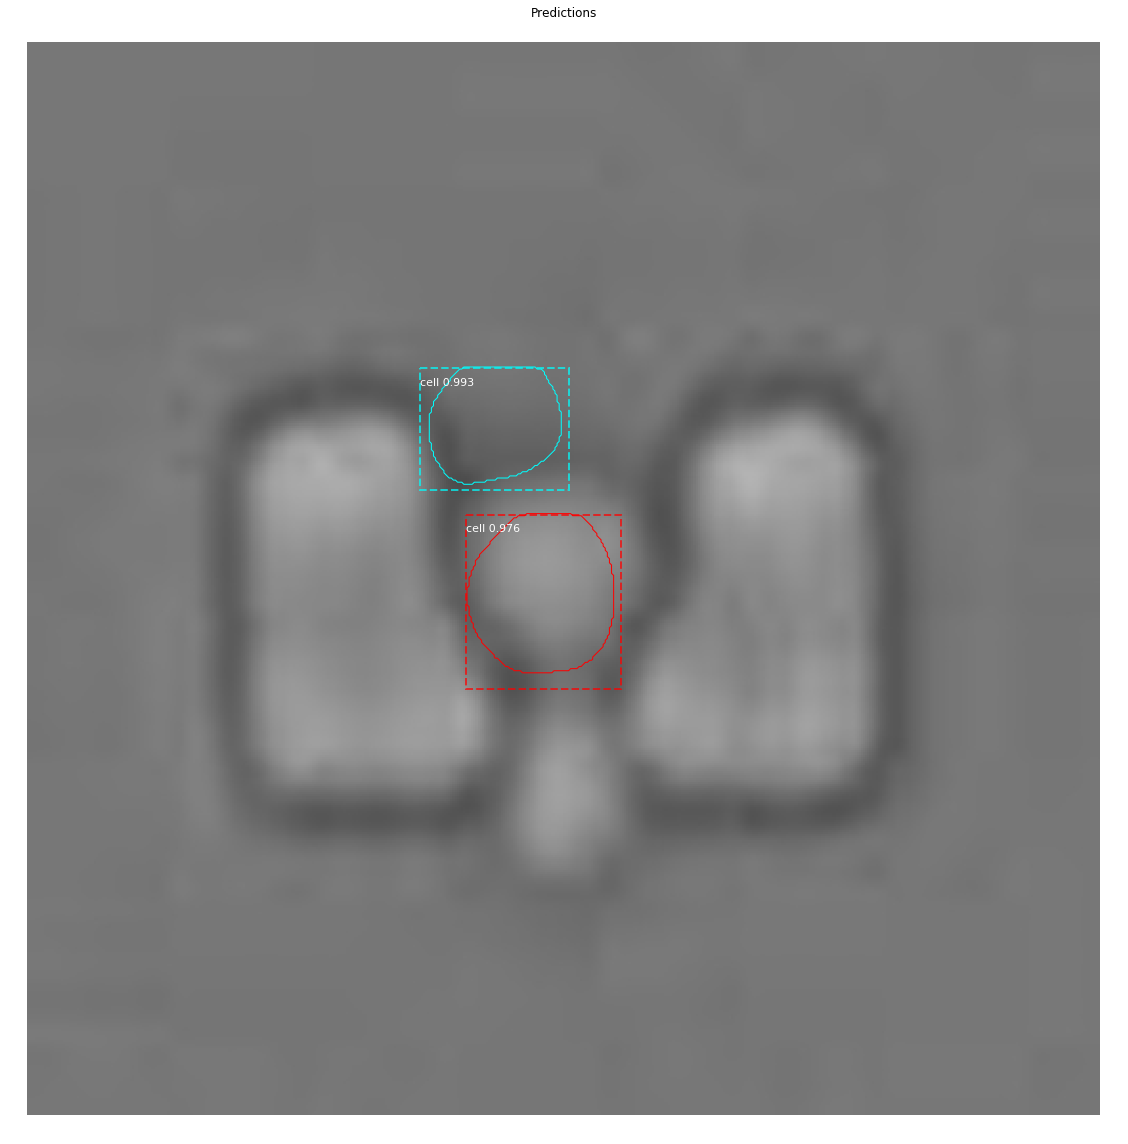

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  179.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   73.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


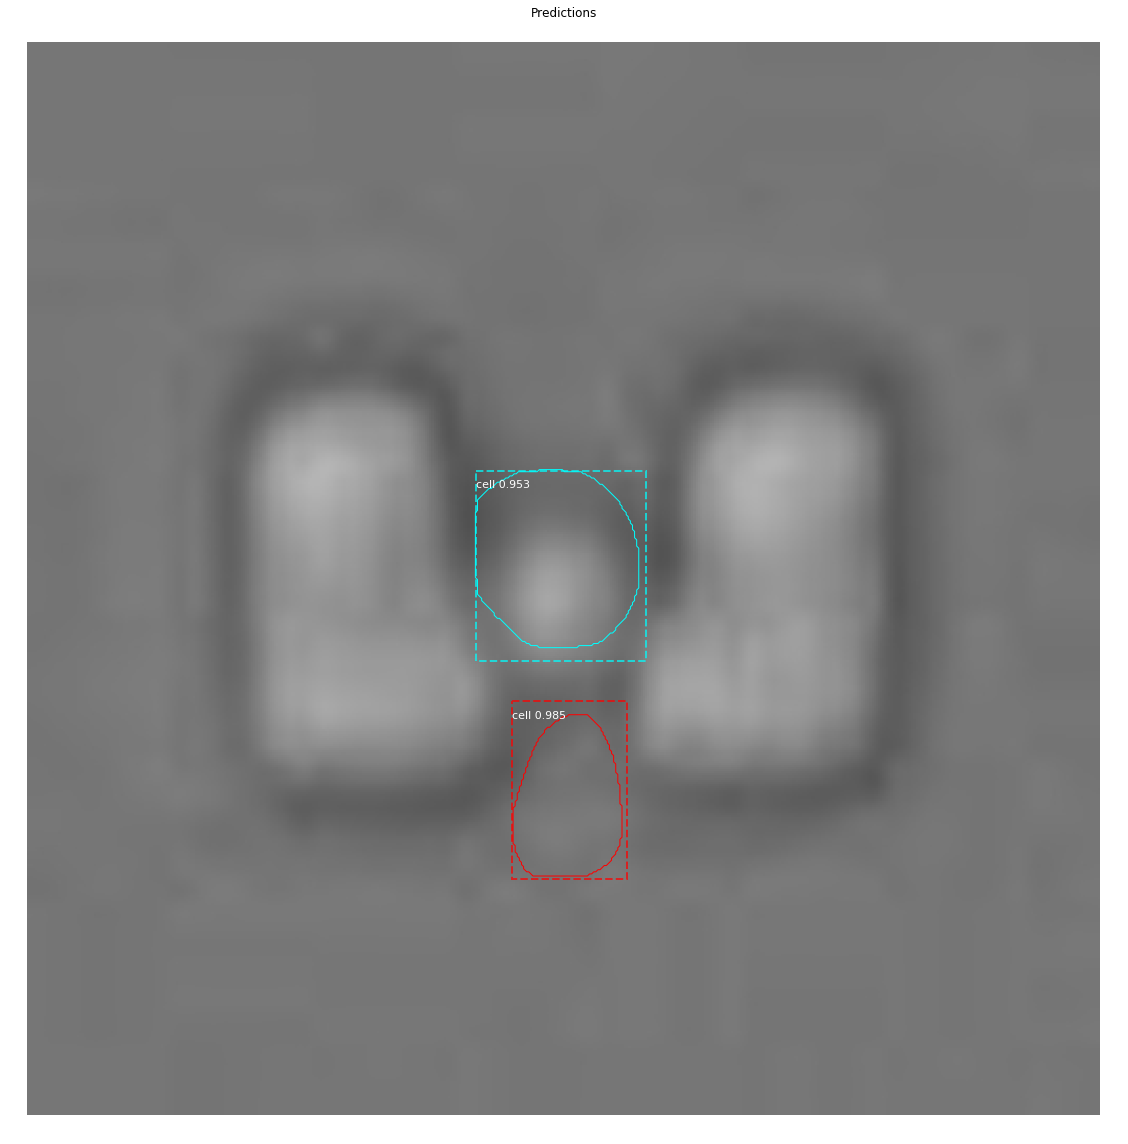

Processing 1 images
image                    shape: (512, 512, 3)         min:   81.00000  max:  181.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -42.70000  max:   75.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


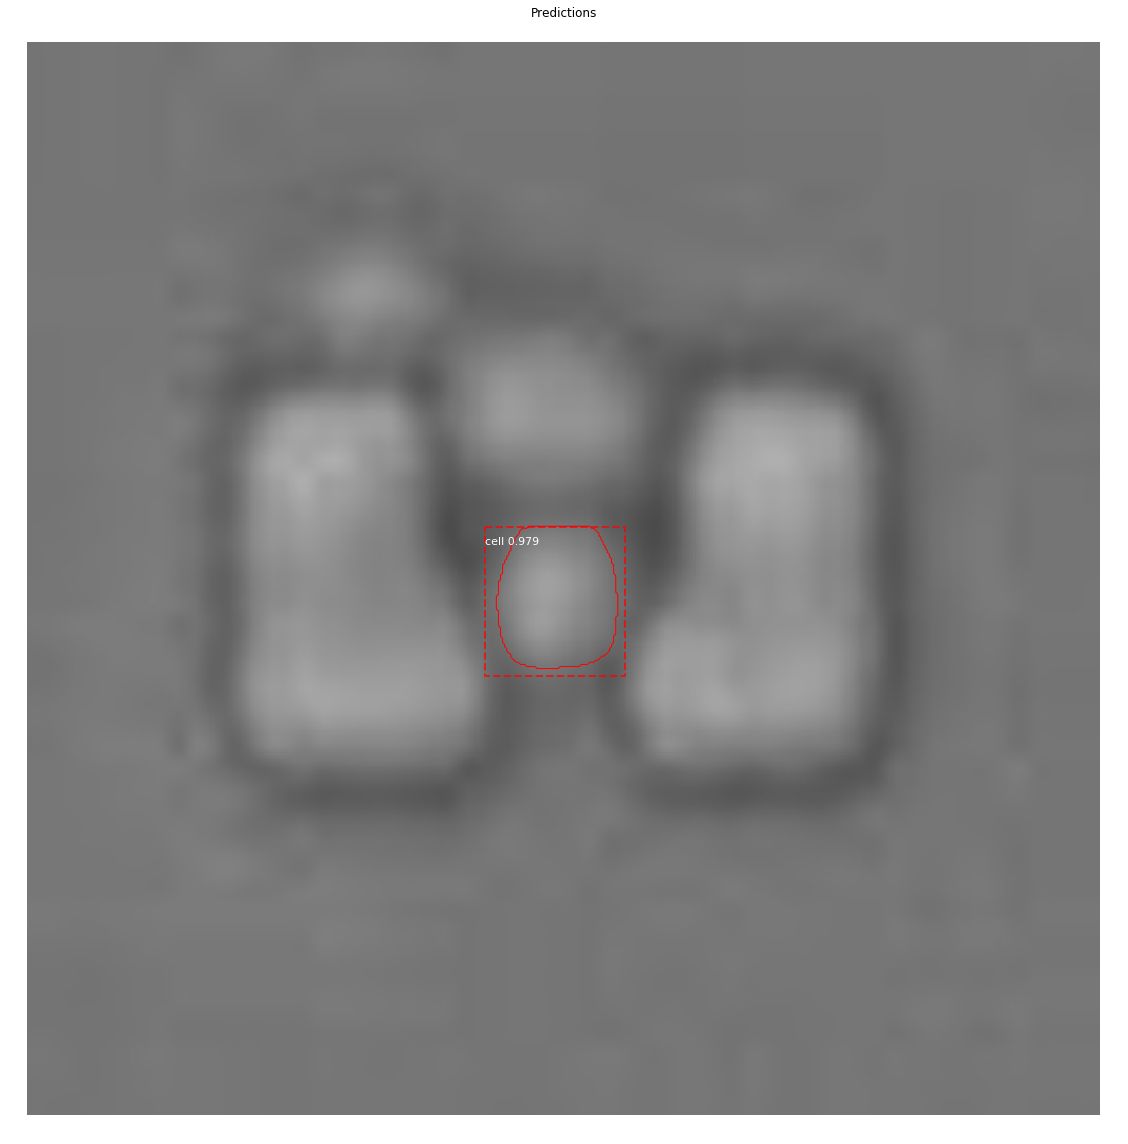

Processing 1 images
image                    shape: (512, 512, 3)         min:   75.00000  max:  176.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -48.70000  max:   70.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


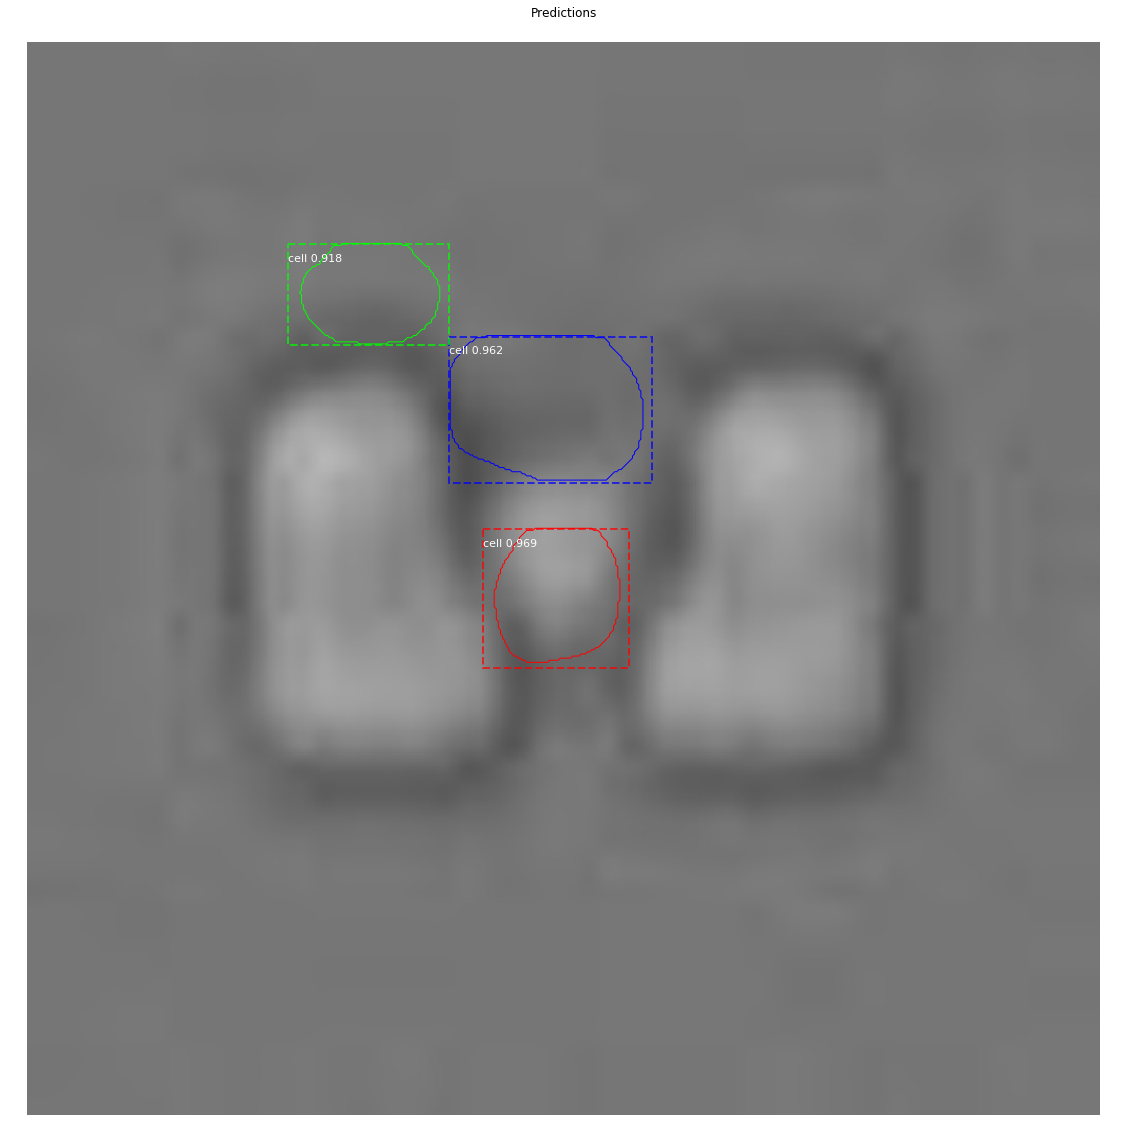

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  182.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   76.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


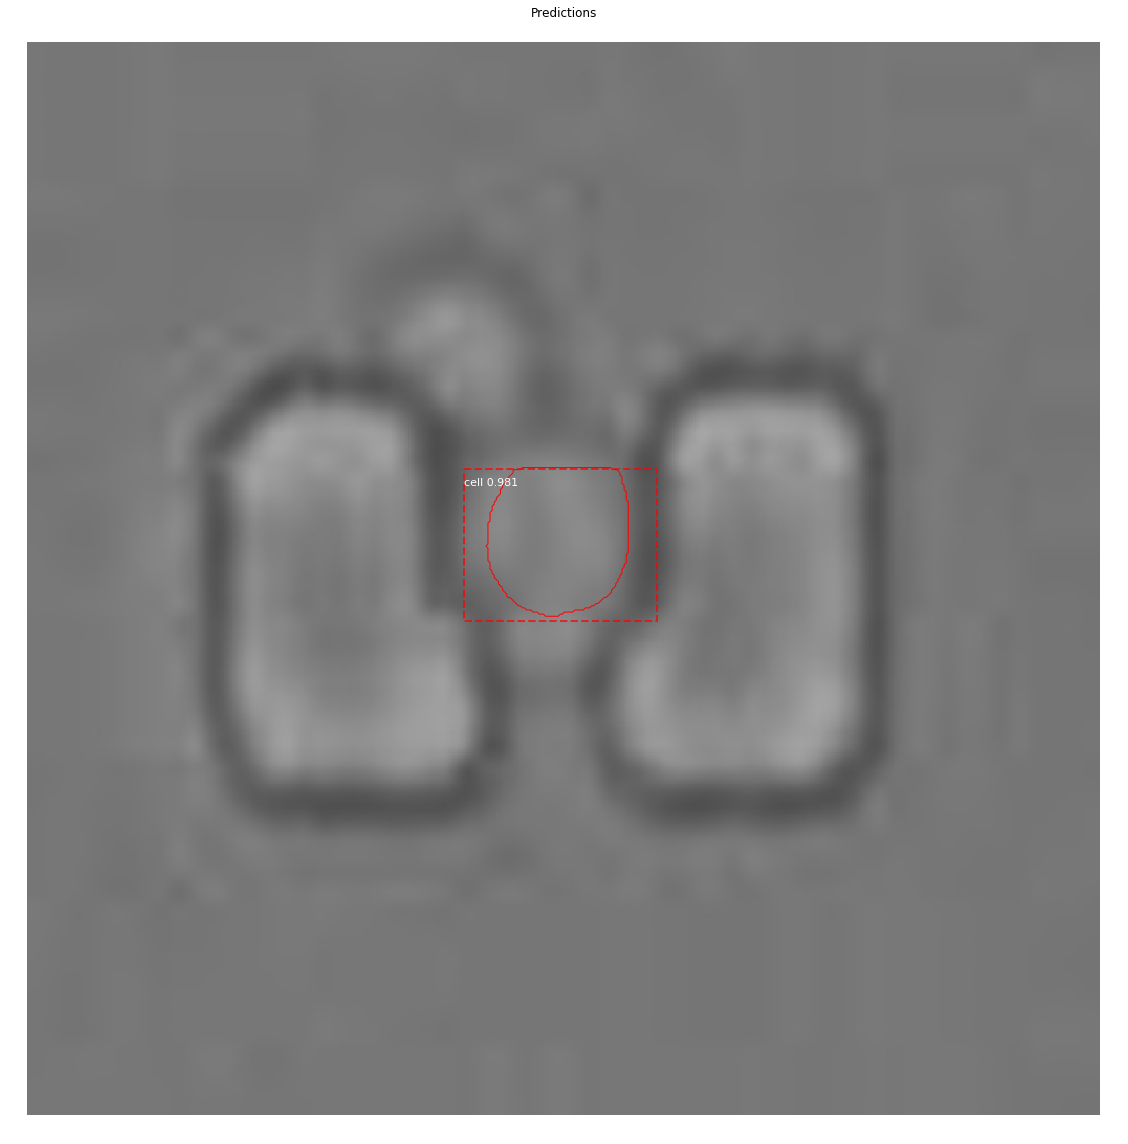

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  166.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   59.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


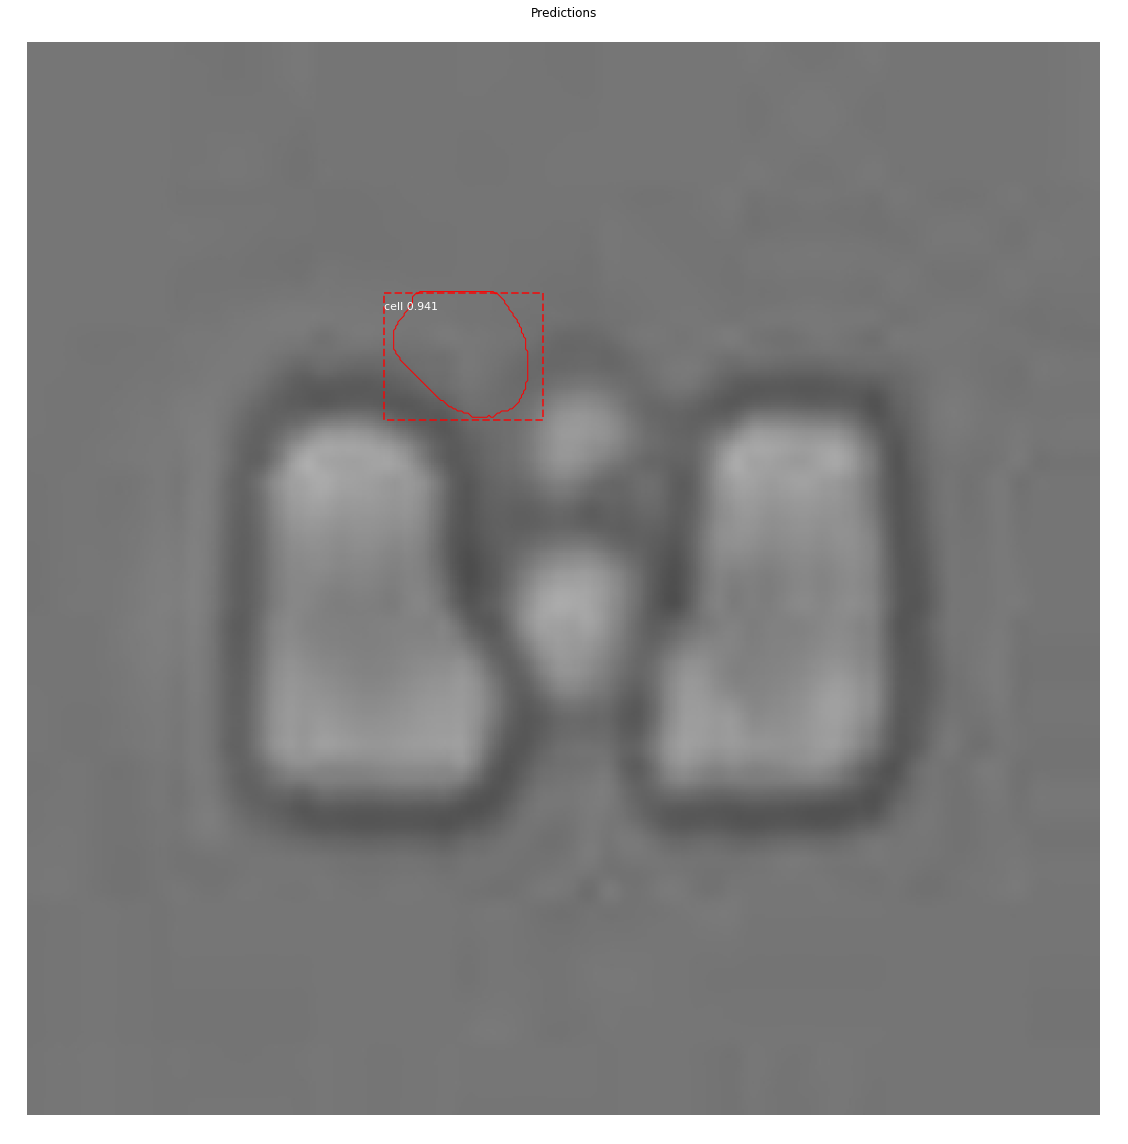

Processing 1 images
image                    shape: (512, 512, 3)         min:   77.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -46.70000  max:   67.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


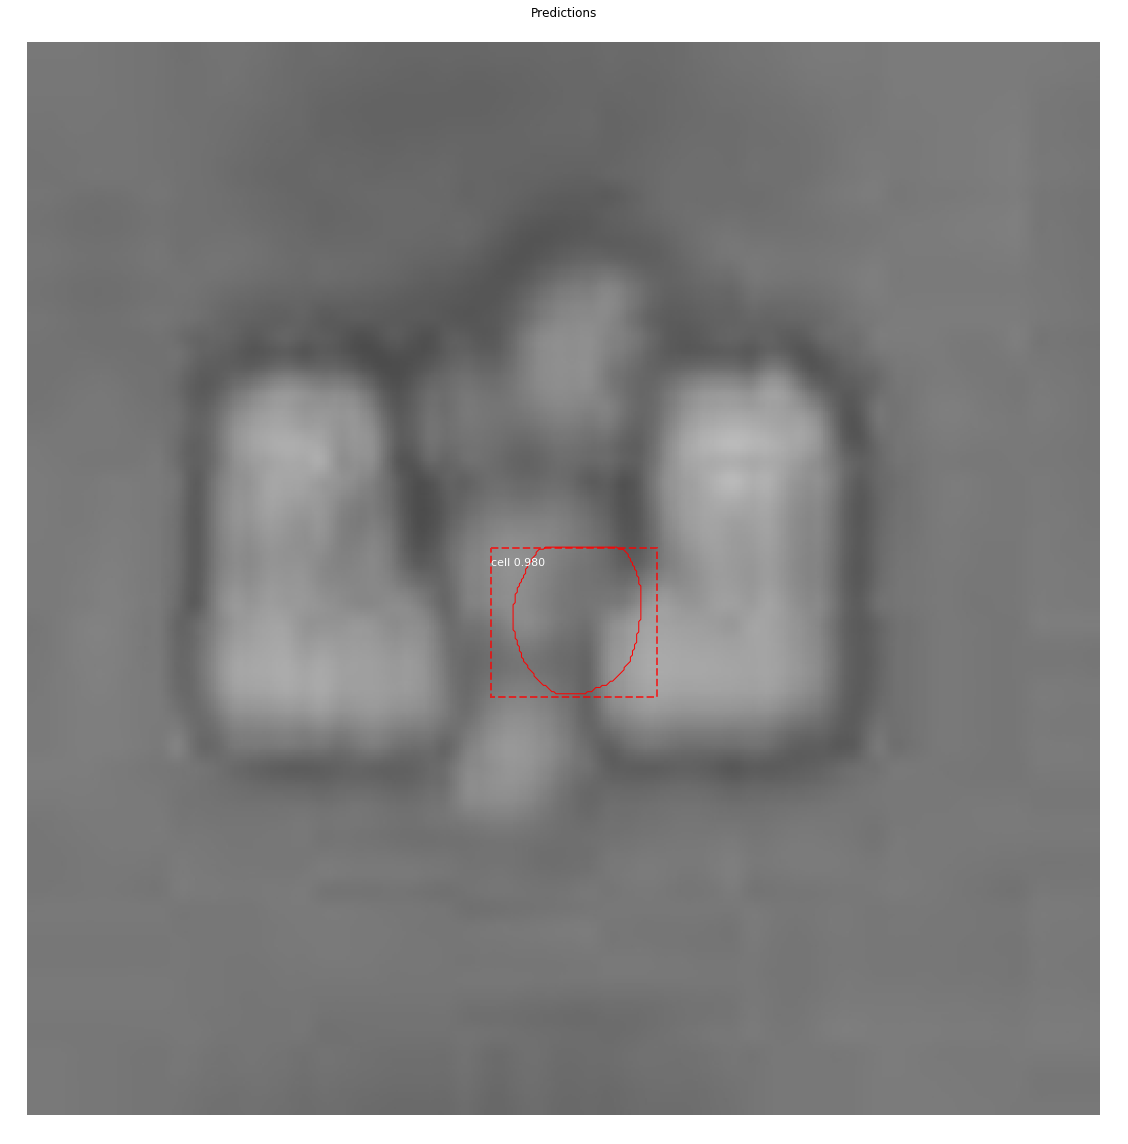

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  186.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   81.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


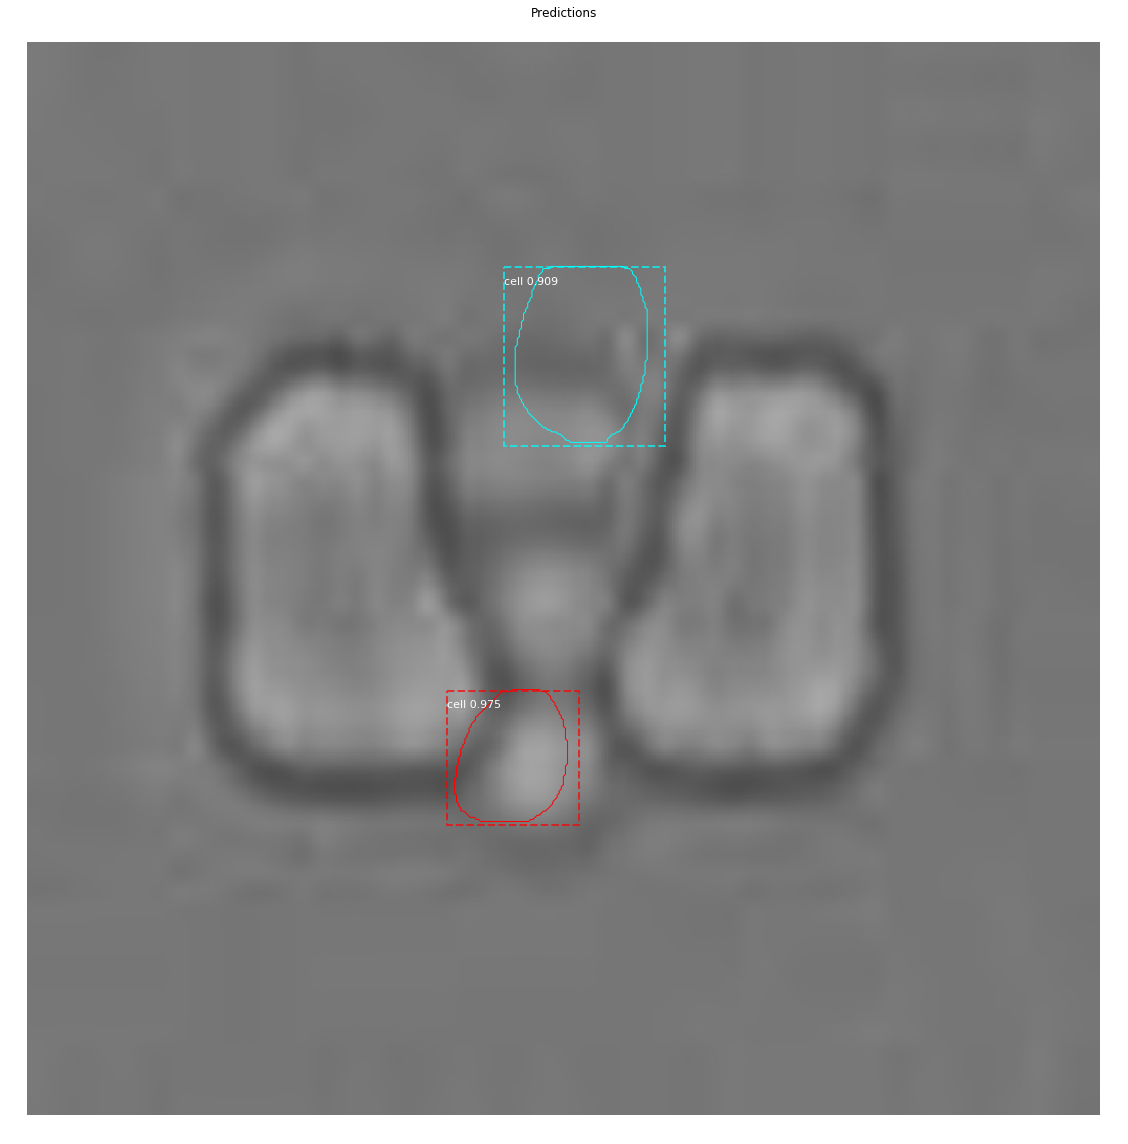

Processing 1 images
image                    shape: (512, 512, 3)         min:   76.00000  max:  168.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -47.70000  max:   62.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


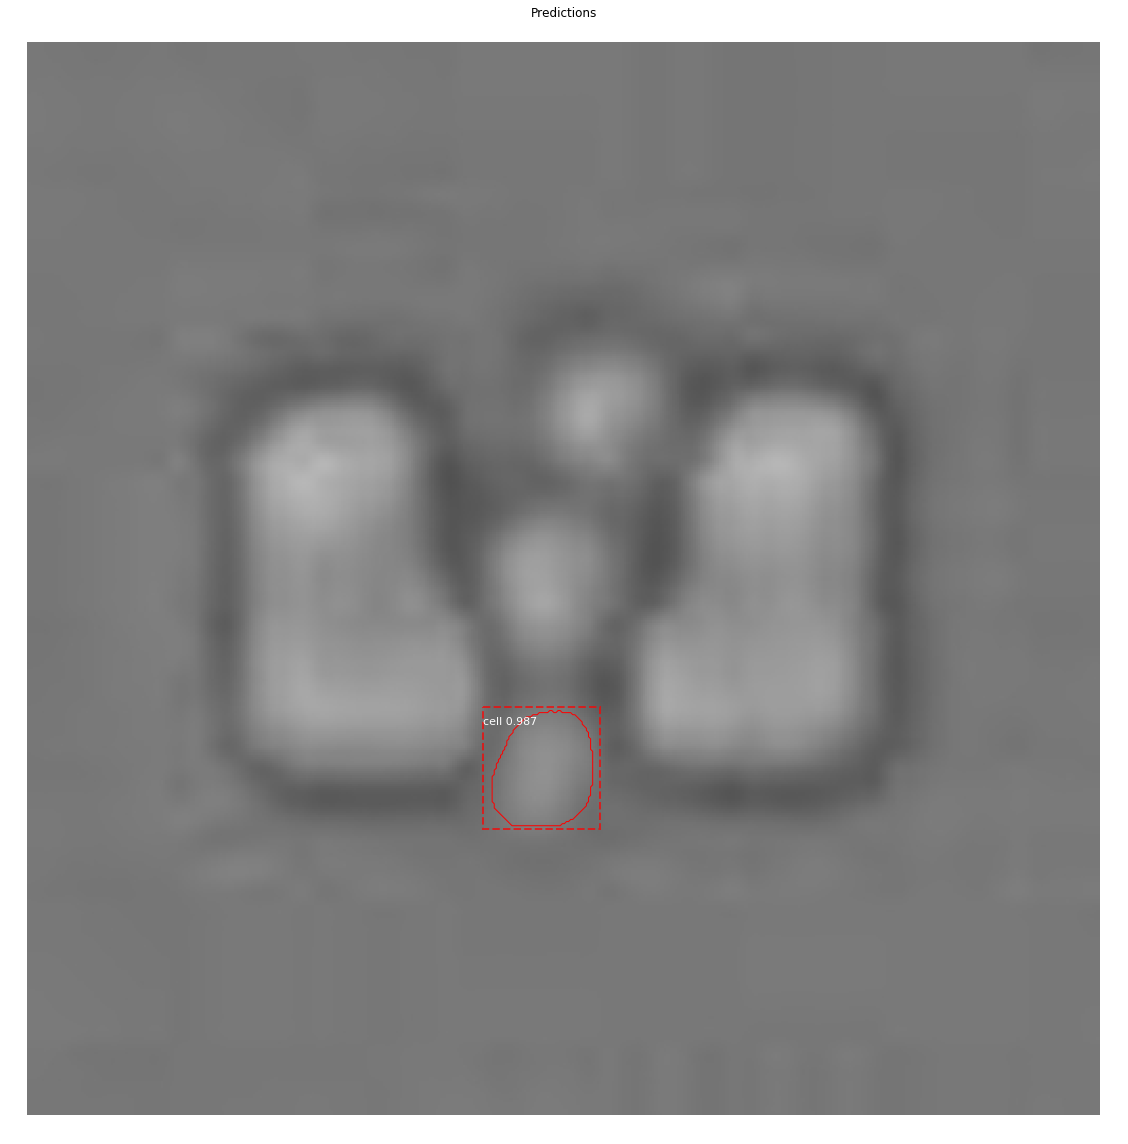

Processing 1 images
image                    shape: (512, 512, 3)         min:   81.00000  max:  183.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -42.70000  max:   77.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


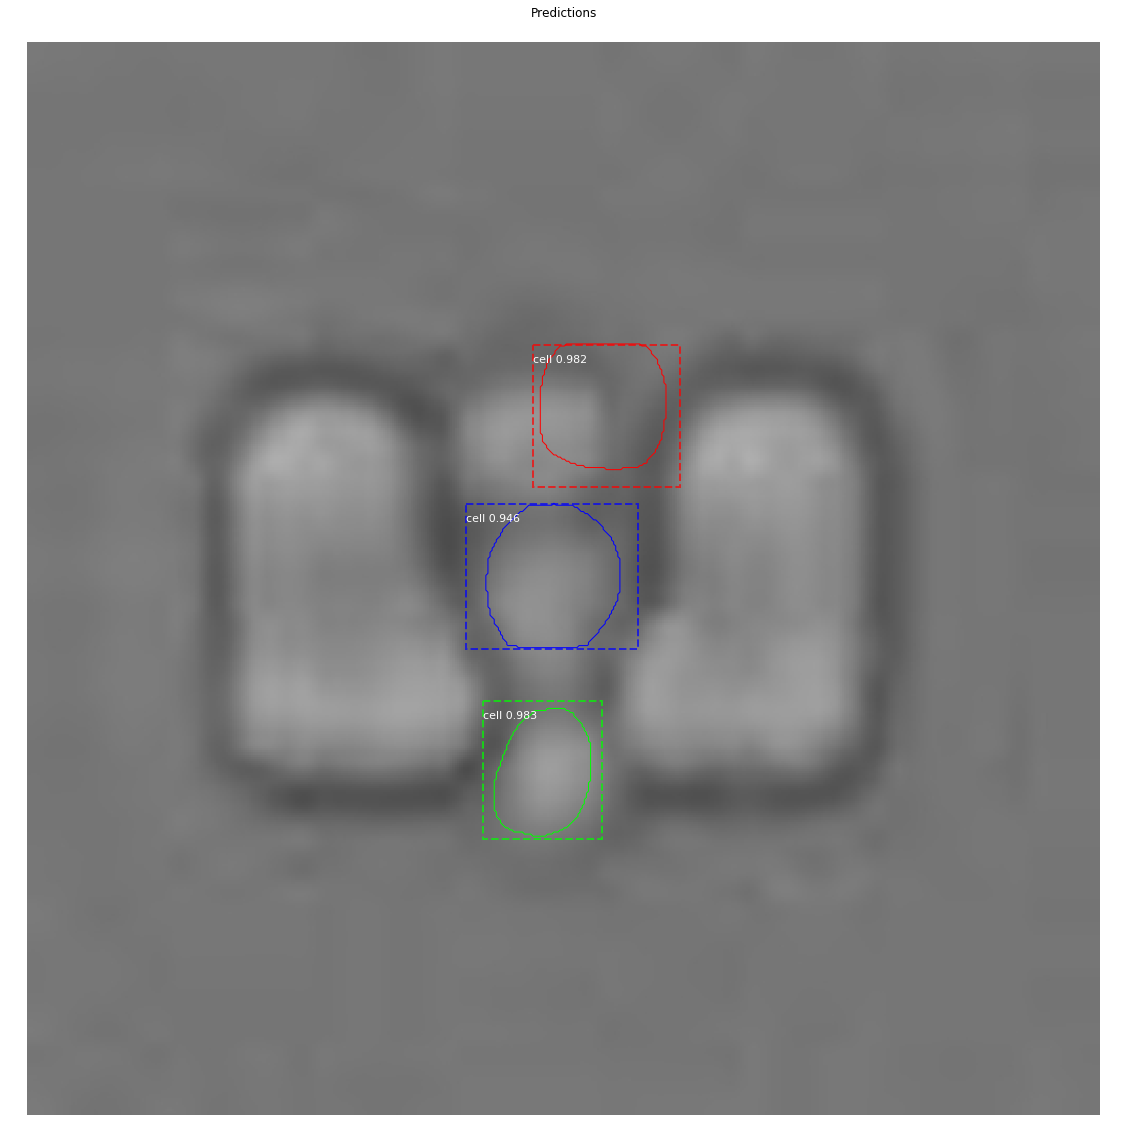

Processing 1 images
image                    shape: (512, 512, 3)         min:   75.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -48.70000  max:   68.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


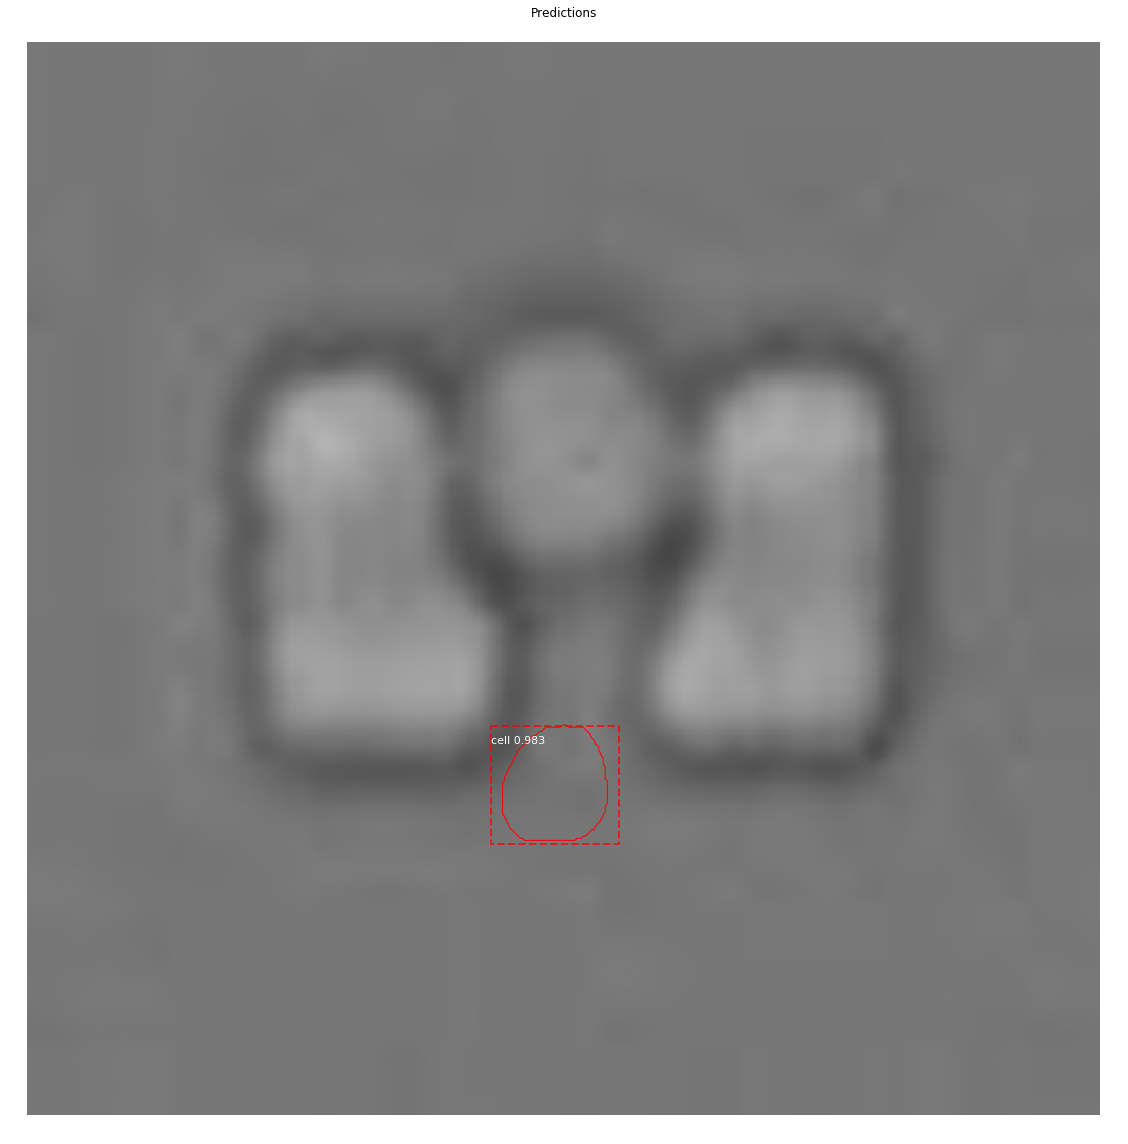

Processing 1 images
image                    shape: (512, 512, 3)         min:   70.00000  max:  179.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -53.70000  max:   73.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


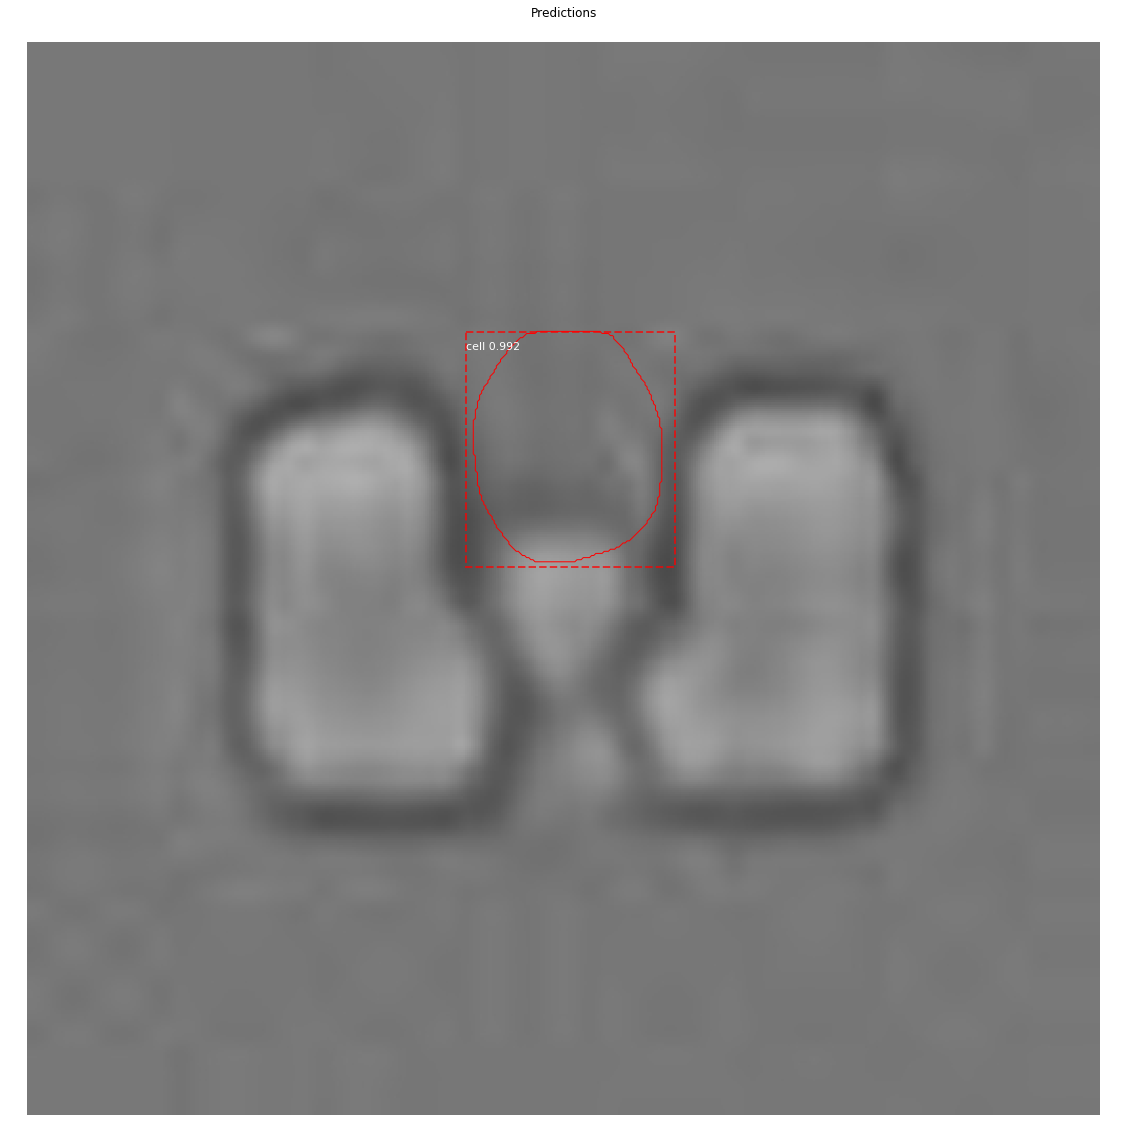

Processing 1 images
image                    shape: (512, 512, 3)         min:   74.00000  max:  174.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -49.70000  max:   69.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


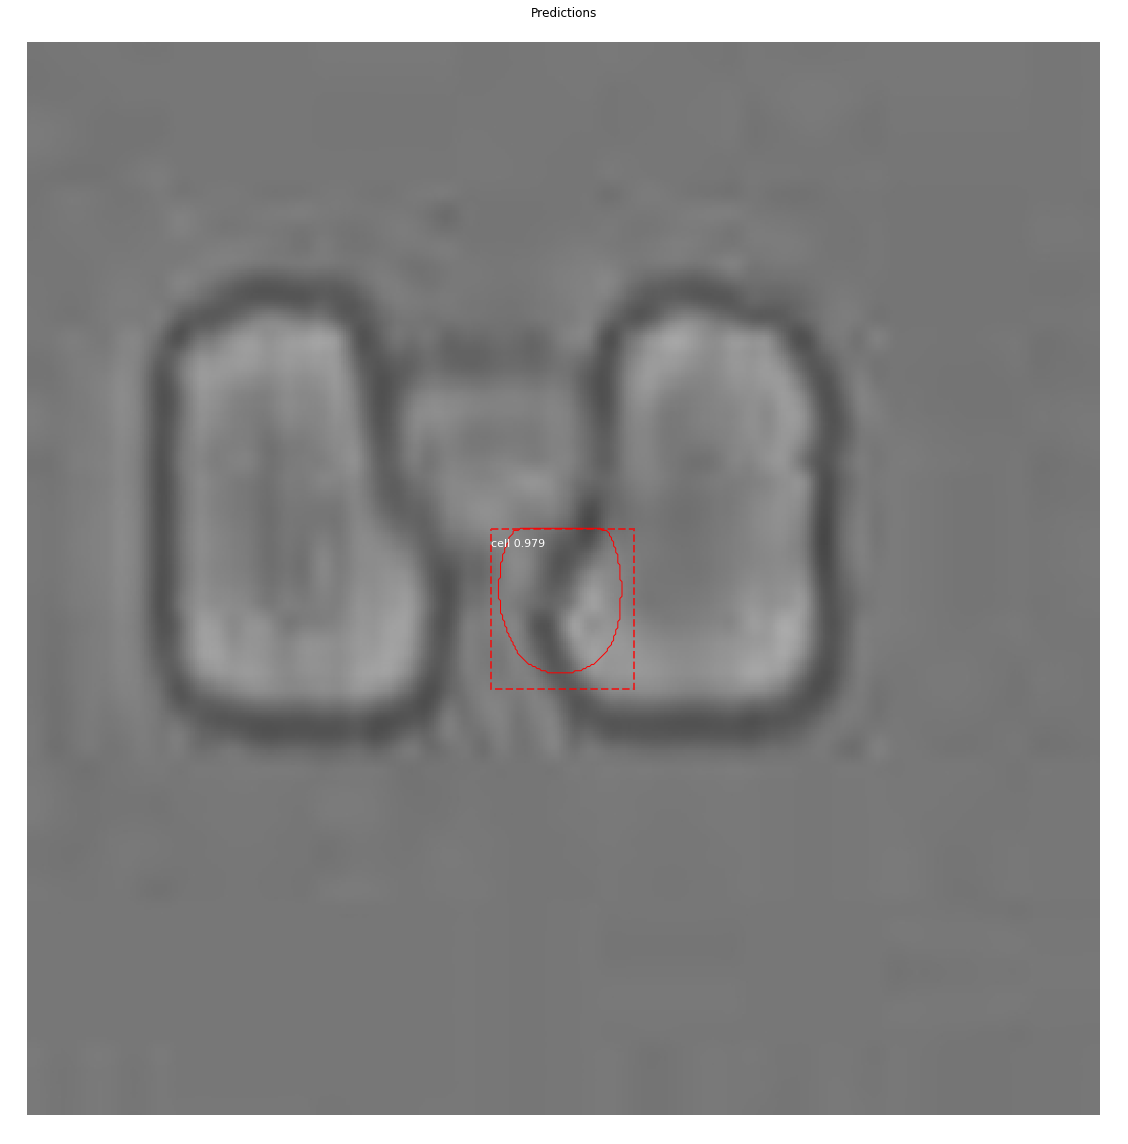

Processing 1 images
image                    shape: (512, 512, 3)         min:   71.00000  max:  170.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min:  -52.70000  max:   64.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 16368, 4)         min:   -0.35494  max:    1.10396  float32


KeyboardInterrupt: 

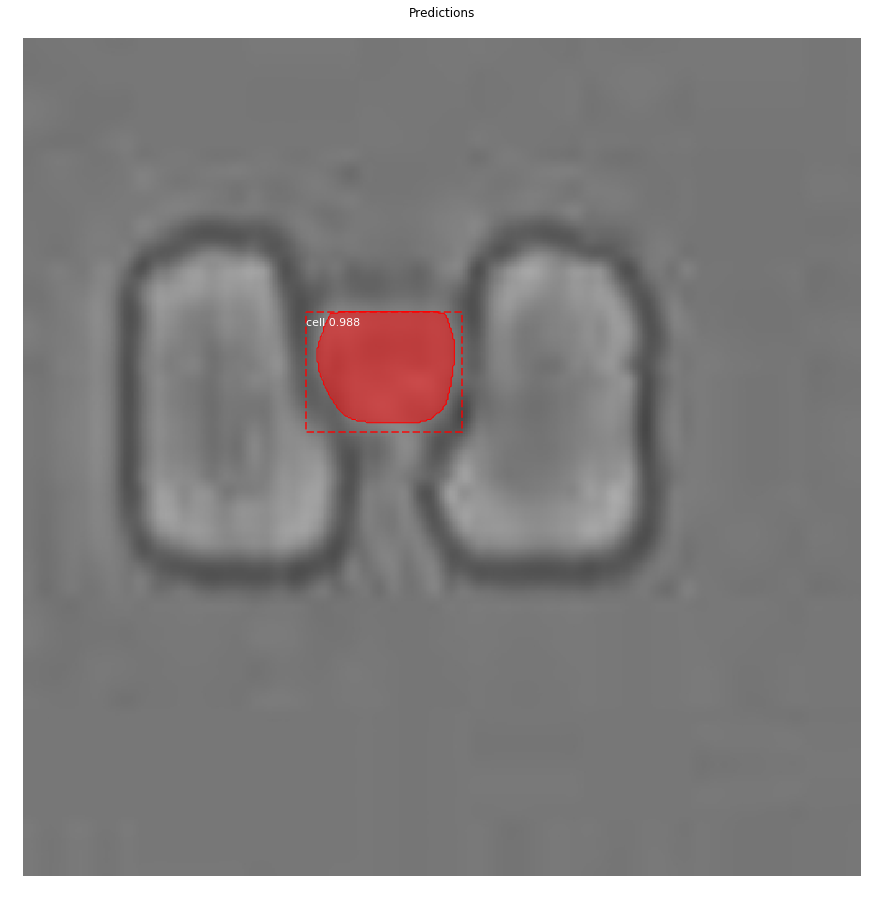

In [35]:
import os
for root, dirs, files in os.walk('/home/ubuntu/github/Peyton2020MaskRCNN/inputImages/'):
    for file in files:
        if file.endswith('.jpg'):
            img_path = os.path.join(root,file)
            image = load_image(img_path)
            skimage.io.imshow(image)
            plt.show()

            dataset = Cell.HSYAADataset()
            dataset.load_data("dataset/", "train")
            dataset.prepare()

            # Run object detection
            results = model.detect([image], verbose=1)

            # Display results
            ax = get_ax(1)
            r = results[0]
            a = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                        dataset.class_names, r['scores'], ax=ax,
                                        title="Predictions")
            file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
#             splash = Cell.color_splash(image, r['scores'])
#             skimage.io.imsave(file_name, splash)
            name = '/home/ubuntu/github/Peyton2020MaskRCNN/main/output/' + file

            plt.savefig(name,bbox_inches='tight', pad_inches=-0.5,orientation= 'landscape')